## Scikit Learn Cookbook from Trent Hauck and other ML book recipes 

In [54]:
!pip install --upgrade scikit-learn

In [55]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd

In [56]:
housing = fetch_california_housing()


In [57]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [58]:
# Accessing Bunch Data structure through .data and .target
X, y = housing.data, housing.target
print(X)
print('\n')
print(y)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [59]:
# To create your own dataset with necessary characteristics
"""
make_<the data set>
datasets.make_*?
datasets.make_blobs
datasets.make_classification
datasets.make_friedman1
datasets.make_friedman2
datasets.make_gaussian_quantiles
datasets.make_hastie_10_2
datasets.make_low_rank_matrix
datasets.make_moons
datasets.make_regression
datasets.make_s_curve
datasets.make_sparse_coded_signal
datasets.make_sparse_spd_matrix
datasets.make_spd_matrix
datasets.make_swiss_roll
datasets.make_truncated_normal
datasets.make_uncorrelated_samples
datasets.make_wave
datasets.make_circles
datasets.make_biclusters
datasets.make_checkerboard
"""

"""
>>>import sklearn.datasets as d
>>>import numpy as np

>>> reg_data = d.make_regression()
" By default this will generate a tuple of 100x100 matrix -
100 samples by 100 features. To make 1000 x 10 with 5 features responsbile
for the target creation, an underlying bias factor = 1.0 and 2 targets"
>>> complex_reg_data = d.make_regression(1000,10,5,2,1.0)
>>> complex_reg_data[0].shape
(1000, 10)
>>> complex_reg_data[1].shape
(1000,)

Classification
>>> class_data = d.make_classification(weights = [0.1])
>>> np.bincount(classification_set[1])
array(10,90])

Clusters
>>> blobs = d.make_blobs()
"""
"""
This is how Scikit learn produces the regression dataset

X = np.random.randn(n_samples, n_features)
ground_truth = np.zeros((np_samples, n_target))
ground_truth[:n_informative,:] = 100*np.random.rand(n_informative, n_targets)

y = np.dot(X, ground_truth) + bias
"""

'\nThis is how Scikit learn produces the regression dataset\n\nX = np.random.randn(n_samples, n_features)\nground_truth = np.zeros((np_samples, n_target))\nground_truth[:n_informative,:] = 100*np.random.rand(n_informative, n_targets)\n\ny = np.dot(X, ground_truth) + bias\n'

## Scaling data

In [60]:
# Transforming our features from their endowed distribution into Z-scores

from sklearn import preprocessing

# Calculate and PRINT the mean of the first 3 features
print("Mean of the first 3 features:", X[:, :3].mean(axis=0))
print('\n')
# Calculate and PRINT the standard deviation of the first 3 features
print("Standard deviation of the first 3 features:", X[:, :3].std(axis=0))


Mean of the first 3 features: [ 3.870671   28.63948643  5.42899974]


Standard deviation of the first 3 features: [ 1.89977569 12.58525273  2.4741132 ]


In [61]:
# It performs centering (removes the mean) and scaling to unit variance
#(divides by the standard deviation) on a dataset in a single step.
X_2 = preprocessing.scale(X[:,:3])

# Calculate and PRINT the mean of the first 3 features
print("Mean of the first 3 features:", X_2[:, :3].mean(axis=0))
print('\n')
# Calculate and PRINT the standard deviation of the first 3 features
print("Standard deviation of the first 3 features:", X_2[:, :3].std(axis=0))


Mean of the first 3 features: [6.60969987e-17 5.50808322e-18 6.60969987e-17]


Standard deviation of the first 3 features: [1. 1. 1.]


### Scaling to Standard Scaler

In [62]:
# It also performs centering and scaling to unit variance, but it does
#so using Scikit-learn's standard transformer API
my_scaler = preprocessing.StandardScaler()
my_scaler.fit(X[:,:3])
my_scaler.transform(X[:,:3]).mean(axis=0)

array([6.60969987e-17, 5.50808322e-18, 6.60969987e-17])

### Min-Max Scaler

In [63]:
my_minmax_scaler = preprocessing.MinMaxScaler()
my_minmax_scaler.fit(X[:,:3])
print(my_minmax_scaler.transform(X[:,:3]).min(axis=0))
print(my_minmax_scaler.transform(X[:,:3]).max(axis=0))
# To change the vlaues of min and max from 0 t0 1
# my_odd_scaler = preprocessing.MInMaxScaler(feature_range=(-3.14,3.14))

[0. 0. 0.]
[1. 1. 1.]


### Normalization

In [64]:
# This is where we scale each sample to have a length of 1.
#Its different from previous scalings, useful when using Eucledian Distance
normalized_X = preprocessing.normalize(X[:,:3])
normalized_X

array([[0.19627663, 0.96662445, 0.16465922],
       [0.35435076, 0.89639892, 0.26627902],
       [0.13653498, 0.97828684, 0.15592642],
       ...,
       [0.09518357, 0.95183566, 0.29146007],
       [0.09897667, 0.95414532, 0.28250721],
       [0.14042877, 0.94065996, 0.30893137]])

In [65]:
# Creating an idempotent scalar object (idempotent in math implies f(f(x) is same as f(x)))

#If you want the standard scalar to just do identity transformation

my_useless_scalar = preprocessing.StandardScaler(with_mean=False, with_std=False)

transformed_sd = my_useless_scalar.fit_transform(X[:,:3]).std(axis=0)

original_sd = X[:,:3].std(axis=0)

np.array_equal(transformed_sd, original_sd)

True

## Handling Sparse Imputations

In [66]:
# Its possible to scale a sparse matrix with_std only
import scipy
matrix = scipy.sparse.eye(1000)
preprocessing.scale(matrix, with_mean = False)

# The other option is to call todense() on the array. however
#this is dangerous as matrix is already sparse for a reason.
#It will potentially caus memory error.

<Compressed Sparse Column sparse matrix of dtype 'float64'
	with 1000 stored elements and shape (1000, 1000)>

## Categorical Variables

In [67]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target
d = np.column_stack((X,y))
d [:5,:]


array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

In [68]:
text_encoder = preprocessing.OneHotEncoder()
text_encoder.fit_transform(d[:,-1:]).toarray()[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [69]:
#since we have used text_encoder it can used again
text_encoder.transform(np.ones((3,1))).toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

## Data Imputations

In [70]:
iris_X= iris.data
masking_array = np.random.binomial(1,.25, iris_X.shape).astype(bool)
iris_X[masking_array] = np.nan

In [71]:
masking_array[:5]

array([[ True, False, False, False],
       [ True, False, False,  True],
       [False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False]])

In [72]:
iris_X[:5]
# True values are replaced by Nan

array([[nan, 3.5, 1.4, 0.2],
       [nan, 3. , 1.4, nan],
       [4.7, 3.2, nan, 0.2],
       [4.6, 3.1, nan, 0.2],
       [5. , 3.6, nan, 0.2]])

In [73]:
from sklearn.impute import SimpleImputer
# strategy can be mean, median or most_frequent (mode)
impute_median = SimpleImputer(strategy='median')
iris_X_imputed = impute_median.fit_transform(iris_X)
iris_X_imputed[:5]

array([[5.8, 3.5, 1.4, 0.2],
       [5.8, 3. , 1.4, 1.3],
       [4.7, 3.2, 4.2, 0.2],
       [4.6, 3.1, 4.2, 0.2],
       [5. , 3.6, 4.2, 0.2]])

In [74]:
iris_X[np.isnan(iris_X)] = -1
iris_X[:5]

array([[-1. ,  3.5,  1.4,  0.2],
       [-1. ,  3. ,  1.4, -1. ],
       [ 4.7,  3.2, -1. ,  0.2],
       [ 4.6,  3.1, -1. ,  0.2],
       [ 5. ,  3.6, -1. ,  0.2]])

In [75]:
impute_missing = SimpleImputer(missing_values=-1, strategy= 'mean')
iris_X_imputed = impute_missing.fit_transform(iris_X)
iris_X_imputed[:5]

array([[5.8079646 , 3.5       , 1.4       , 0.2       ],
       [5.8079646 , 3.        , 1.4       , 1.1127451 ],
       [4.7       , 3.2       , 3.73362069, 0.2       ],
       [4.6       , 3.1       , 3.73362069, 0.2       ],
       [5.        , 3.6       , 3.73362069, 0.2       ]])

In [76]:
# you can also use fillna to fill missing values
iris_fillingna = pd.DataFrame(iris_X, columns = iris.feature_names)
iris_fillingna = iris_fillingna.fillna(iris_fillingna.mean())
iris_fillingna[:5]
# we could also fill missing data by passing any sort of statistic
# iris_df.fillna(iris_df.mean())['sepal length (cm)'].head(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0               -1.0               3.5                1.4               0.2
1               -1.0               3.0                1.4              -1.0
2                4.7               3.2               -1.0               0.2
3                4.6               3.1               -1.0               0.2
4                5.0               3.6               -1.0               0.2

## Pipelines

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [78]:
iris = datasets.load_iris()
# We use iris.data (the features)
X_original = iris.data

# Create a copy to add NaNs without modifying the original iris.data
X_with_nan = X_original.copy()

# Create and apply the masking array to introduce NaNs
# masking_array = np.random.binomial(1,.25, X_with_nan.shape).astype(bool) # Using a fixed seed for reproducibility might be good here
# X_with_nan[masking_array] = np.nan
# --- End of simulating NaNs ---

# For demonstration, let's ensure we definitely have NaNs if you rerun this cell
# This simulates NaNs in the first 2 features for the first 5 rows
X_with_nan[0:5, 0:2] = np.nan


print("Original data shape:", X_original.shape)
print("Data with NaNs shape:", X_with_nan.shape)
print("First 5 rows of data with NaNs:\n", pd.DataFrame(X_with_nan).head()) # Use Pandas to display NaNs nicely
print("\nNumber of NaNs:", np.isnan(X_with_nan).sum())

Original data shape: (150, 4)
Data with NaNs shape: (150, 4)
First 5 rows of data with NaNs:
     0   1    2    3
0 NaN NaN  1.4  0.2
1 NaN NaN  1.4  0.2
2 NaN NaN  1.3  0.2
3 NaN NaN  1.5  0.2
4 NaN NaN  1.4  0.2

Number of NaNs: 10


In [79]:
# --- Define the Pipeline (Imputation + Scaling) ---
# Create instances of the steps
impute_step = SimpleImputer(strategy='median')
scaler_step = StandardScaler()

# Create the initial pipeline
preprocessing_pipe = Pipeline([
    ('impute', impute_step),
    ('scaler', scaler_step)
])


In [80]:
# --- Apply the Pipeline and See the Effect ---

# Use fit_transform on the pipeline.
# This calls fit_transform on the imputer, then fit_transform on the scaler
X_processed = preprocessing_pipe.fit_transform(X_with_nan)

print("\nShape after imputation and scaling:", X_processed.shape)
print("First 5 rows after imputation and scaling:\n", X_processed[:5])

# Check for NaNs (should be 0 after imputation)
print("\nNumber of NaNs after processing:", np.isnan(X_processed).sum())

# Check mean and std (should be close to 0 and 1 after scaling)
print("Mean after scaling:", X_processed.mean(axis=0))
print("Standard Deviation after scaling:", X_processed.std(axis=0))


Shape after imputation and scaling: (150, 4)
First 5 rows after imputation and scaling:
 [[-0.09283963 -0.11150856 -1.34022653 -1.3154443 ]
 [-0.09283963 -0.11150856 -1.34022653 -1.3154443 ]
 [-0.09283963 -0.11150856 -1.39706395 -1.3154443 ]
 [-0.09283963 -0.11150856 -1.2833891  -1.3154443 ]
 [-0.09283963 -0.11150856 -1.34022653 -1.3154443 ]]

Number of NaNs after processing: 0
Mean after scaling: [-2.73457183e-15 -1.12687637e-15 -1.69864123e-15 -1.40924309e-15]
Standard Deviation after scaling: [1. 1. 1. 1.]


## Reducing dimensionality with PCA

In [81]:
from sklearn import decomposition
iris_pca = iris.data
pca = decomposition.PCA() # you can specify n_components = 2 etc..
# if you want 98% of variance, n_components = 0.98
pca


PCA()

In [82]:
iris_pca_fit = pca.fit_transform(iris_pca)
iris_pca_fit[:5]

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
         2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
         9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
         1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
        -7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
        -6.12585926e-02]])

In [83]:
# Now the PCA has been fit, we cna see how well it has done at explaining variance
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

**0.92461872: This is the proportion of variance explained by the First Principal Component (PC1). **

It means that the first principal component alone captures about 92.5% of the total variance in your original Iris features.

**0.05306648: This is the proportion of variance explained by the Second Principal Component (PC2). **

It captures about 5.3% of the total variance.

**0.01710261: This is the proportion of variance explained by the Third Principal Component (PC3).**

It captures about 1.7% of the total variance.

**0.00521218: This is the proportion of variance explained by the Fourth Principal Component (PC4).**

It captures about 0.5% of the total variance.

When you fit PCA() without specifying n_components, it calculates all possible principal components. The number of components will be equal to the minimum of the number of samples and the number of features. In the Iris dataset, you have 150 samples and 4 features, so it calculated 4 principal components.

## Kernel PCA for nonlinear dimensionality reduction

“The cosine kernel works by comparing the angle between two samples represented in the feature space. It is useful when the magnitude of the vector perturbs the typical distance measure used to compare samples.”

Cos(theta) = (A.B) / (Norm(A). Norm(B))
“This means that the cosine between A and B is the dot product of the two vectors normalized by the product of the individual norms. The magnitude of vectors A and B have no influence on this calculation.”

<ipython-input-84-19114b28a3dd>:19: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  A1 = np.random.multivariate_normal(A1_mean, A1_cov, 50)
<ipython-input-84-19114b28a3dd>:32: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  A2 = np.random.multivariate_normal(A2_mean, A2_cov, 50)
<ipython-input-84-19114b28a3dd>:53: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  B = np.random.multivariate_normal(B_mean, B_cov, 100)


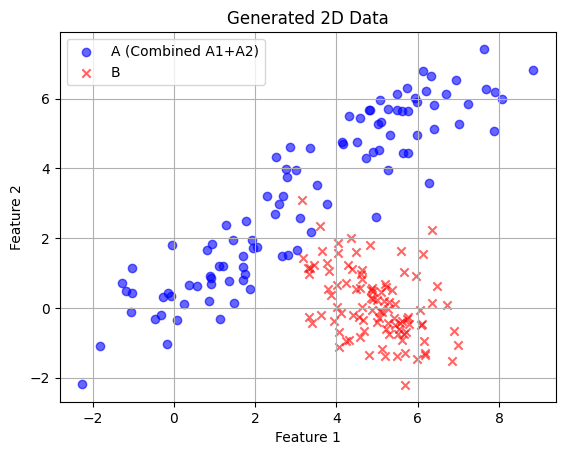

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# --- Generate Data Cluster A1 ---

# Define the mean (center) for the first data cluster
A1_mean = [1, 1]
# Define the covariance matrix for the first data cluster

# The covariance matrix describes the spread and correlation of the data in each dimension.
# [[variance_x, covariance_xy], [covariance_yx, variance_y]]
# Here, variance in x is 2, variance in y is 1, and covariance between x and y is ~1.
A1_cov = [[2, .99], [1, 1]] # Note: The covariance matrix should be symmetric. A1_cov[0][1] should equal A1_cov[1][0]. There might be a slight typo in the book's example if .99 != 1. Assuming intended symmetry.

# Generate 50 data points from a 2D normal distribution with the specified mean and covariance
A1 = np.random.multivariate_normal(A1_mean, A1_cov, 50)
# A1 is now a NumPy array of shape (50, 2)

# --- Generate Data Cluster A2 ---

# Define the mean (center) for the second data cluster
A2_mean = [5, 5]

# Define the covariance matrix for the second data cluster
# Same covariance as A1, meaning similar shape and orientation, just centered elsewhere.
A2_cov = [[2, .99], [1, 1]] # Again, assuming intended symmetry.

# Generate 50 data points from a 2D normal distribution with the specified mean and covariance
A2 = np.random.multivariate_normal(A2_mean, A2_cov, 50)
# A2 is now a NumPy array of shape (50, 2)

# --- Combine Clusters A1 and A2 ---

# Stack arrays A1 and A2 vertically (row-wise) to create a larger dataset 'A'.
# A will contain the 50 points from A1 followed by the 50 points from A2.
A = np.vstack((A1, A2))
# A is now a NumPy array of shape (100, 2)

# --- Generate Data Cluster B ---

# Define the mean (center) for the third data cluster
B_mean = [5, 0]

# Define the covariance matrix for the third data cluster
# Note: The covariance matrix should be symmetric. B_cov[0][1] should equal B_cov[1][0].
# There's a significant difference between -1 and -0.9 here.
B_cov = [[.5, -1], [-.9, .5]] # Assuming intended symmetry despite -1 and -.9 difference

# Generate 100 data points from a 2D normal distribution with the specified mean and covariance
B = np.random.multivariate_normal(B_mean, B_cov, 100)
# B is now a NumPy array of shape (100, 2)

# --- Plotting the Data ---

# Create a scatter plot for the data in A
# A[:, 0] gets all x-coordinates (first column)
# A[:, 1] gets all y-coordinates (second column)
# label='A' is for the legend
# color='blue' sets the color
plt.scatter(A[:, 0], A[:, 1], label='A (Combined A1+A2)', color='blue', alpha=0.6)

# Create a scatter plot for the data in B
# B[:, 0] gets all x-coordinates
# B[:, 1] gets all y-coordinates
# label='B' is for the legend
# color='red' sets a different color
# marker='x' uses 'x' symbols instead of circles (optional, just to differentiate)
plt.scatter(B[:, 0], B[:, 1], label='B', color='red', marker='x', alpha=0.6)


# Add labels and title for clarity
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated 2D Data')
plt.legend() # Display the legend to show which color/marker is which dataset
plt.grid(True) # Add a grid for easier reading

# Display the plot
plt.show()

In [85]:
# Combine data for Kernel PCA and Standard PCA
AB = np.vstack((A1, A2, B)) # Combine A1, A2, and B into one dataset (shape 200, 2)

# Create labels for plotting (needed to color points by original group)
# 100 points from A (A1+A2), 100 points from B
labels = np.hstack((np.zeros(100), np.ones(100))) # 0 for A, 1 for B
# --- End of Data Generation ---


In [86]:
# --- Apply Kernel PCA with Cosine Kernel ---
# Create Kernel PCA instance with cosine kernel, reducing to 1 component
kpca = KernelPCA(kernel='cosine', n_components=1)

# Fit and transform the combined data
AB_kpca_transformed = kpca.fit_transform(AB)
# AB_kpca_transformed now has shape (200, 1)

# --- Apply Standard PCA (Need Scaling First!) ---
# Standard PCA is sensitive to feature scaling. It's standard practice to scale data first.
# Let's use a pipeline to combine scaling and PCA.
# We'll do PCA with 1 component for direct comparison, and with 2 components for a 2D visualization.

# Pipeline for Standard PCA to 1 component
pca_pipe_1d = Pipeline([
    ('scaler', StandardScaler()), # Step 1: Scale the data
    ('pca', PCA(n_components=1))   # Step 2: Apply PCA to 1 component
])


In [87]:
# Fit and transform the combined data using the 1D PCA pipeline
AB_pca_1d_transformed = pca_pipe_1d.fit_transform(AB)
# AB_pca_1d_transformed now has shape (200, 1)

# Pipeline for Standard PCA to 2 components (for a traditional 2D PCA plot)
pca_pipe_2d = Pipeline([
    ('scaler', StandardScaler()), # Step 1: Scale the data
    ('pca', PCA(n_components=2))   # Step 2: Apply PCA to 2 components
])

In [88]:
# Fit and transform the combined data using the 2D PCA pipeline
AB_pca_2d_transformed = pca_pipe_2d.fit_transform(AB)
# AB_pca_2d_transformed now has shape (200, 2)

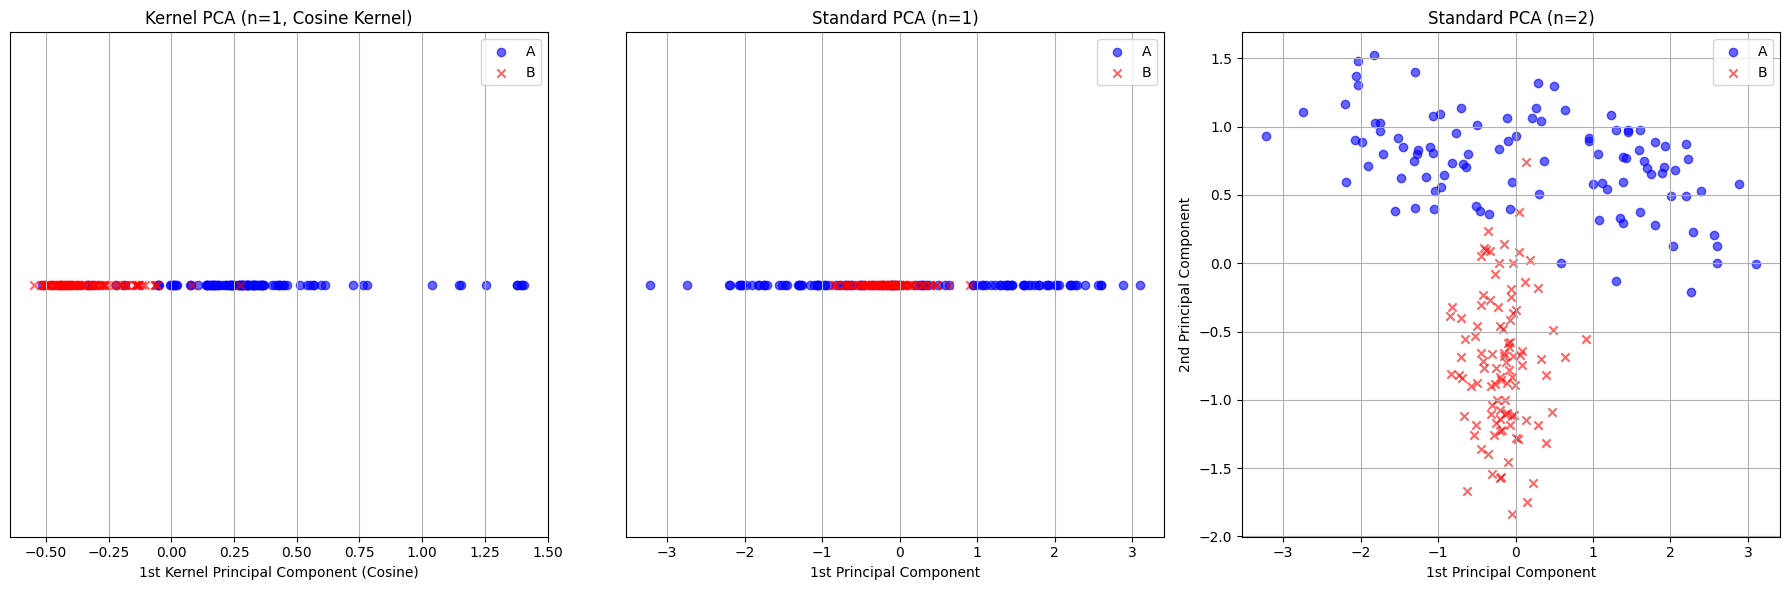

In [89]:
# --- Visualize the Results ---

# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) # 1 row, 3 columns of plots

# --- Plot 1: Kernel PCA (1 Component) ---
axes[0].scatter(AB_kpca_transformed[labels == 0, 0], np.zeros(100), label='A', color='blue', alpha=0.6)
axes[0].scatter(AB_kpca_transformed[labels == 1, 0], np.zeros(100), label='B', color='red', marker='x', alpha=0.6)
axes[0].set_xlabel('1st Kernel Principal Component (Cosine)')
axes[0].set_title('Kernel PCA (n=1, Cosine Kernel)')
axes[0].legend()
axes[0].grid(True, axis='x') # Only show grid lines on the x-axis
axes[0].set_yticks([]) # Hide y-axis ticks as it's just 1D data

# --- Plot 2: Standard PCA (1 Component) ---
axes[1].scatter(AB_pca_1d_transformed[labels == 0, 0], np.zeros(100), label='A', color='blue', alpha=0.6)
axes[1].scatter(AB_pca_1d_transformed[labels == 1, 0], np.zeros(100), label='B', color='red', marker='x', alpha=0.6)
axes[1].set_xlabel('1st Principal Component')
axes[1].set_title('Standard PCA (n=1)')
axes[1].legend()
axes[1].grid(True, axis='x') # Only show grid lines on the x-axis
axes[1].set_yticks([]) # Hide y-axis ticks

# --- Plot 3: Standard PCA (2 Components) ---
axes[2].scatter(AB_pca_2d_transformed[labels == 0, 0], AB_pca_2d_transformed[labels == 0, 1], label='A', color='blue', alpha=0.6)
axes[2].scatter(AB_pca_2d_transformed[labels == 1, 0], AB_pca_2d_transformed[labels == 1, 1], label='B', color='red', marker='x', alpha=0.6)
axes[2].set_xlabel('1st Principal Component')
axes[2].set_ylabel('2nd Principal Component')
axes[2].set_title('Standard PCA (n=2)')
axes[2].legend()
axes[2].grid(True)


plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show() # Display the plots

There are several different kernels poly, rbf(radial basis function), signmoid, cosine, precomputed.

## Truncated SVD to reduce dimensionality

Truncated Singular Value Decomposition (SVD) is a matrix factorization technique that factors a matrix M into the three matrices U, Σ, and V.

This is very similar to PCA, excepting that the factorization for SVD is done on the data matrix, whereas for PCA, the factorization is done on the covariance matrix. Typically, SVD is used under the hood to find the principle components of a matrix.

Truncated SVD is different from regular SVDs in that it produces a factorization where the number of columns is equal to the specified truncation. For example, given an n x n matrix, SVD will produce matrices with n columns, whereas truncated SVD will produce matrices with the specified number of columns. This is how the dimensionality is reduced.

In [90]:
from sklearn.datasets import load_iris
from sklearn.decomposition import TruncatedSVD
iris_svd = load_iris()
iris_data = iris_svd.data
iris_target = iris_svd.target

In [91]:
svd = TruncatedSVD(n_components=2)
#truncated svd can flip sign of output depending on the sate
# to avod this use fit first and then transform
svd.fit(iris_data)
print("SVD model has been fitted.")

SVD model has been fitted.


In [92]:
iris_transformed_svd = svd.transform(iris_data)

In [93]:
# Print the first 5 rows of the ORIGINAL data (Optional, for comparison)
print("\nOriginal data (first 5 rows):")
print(iris_data[:5])
print('\n')

# Print the first 5 rows of the TRANSFORMED data
print("Transformed data (first 5 rows after svd.transform()):")
print(iris_transformed_svd[:5])

# Check the shape of the transformed data - should be (150, 2)
print("\nShape of transformed data:", iris_transformed_svd.shape)


Original data (first 5 rows):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


Transformed data (first 5 rows after svd.transform()):
[[ 5.91274714 -2.30203322]
 [ 5.57248242 -1.97182599]
 [ 5.44697714 -2.09520636]
 [ 5.43645948 -1.87038151]
 [ 5.87564494 -2.32829018]]

Shape of transformed data: (150, 2)


## Decomposition to classify with Dictionary Learning

Dictionary Learning decomposes a matrix to find a sparse representation of the data using an overcomplete dictionary. Think of it like representing your data using a custom "alphabet" or "vocabulary" that is learned from the data itself.

**The Goal**: The main goal of Dictionary Learning is to represent a data matrix X as a product of two matrices, D and A:
X≈D×A

Where:

X is your original data matrix (say, n_features x n_samples). Each column is a data point.

D is the Dictionary matrix (n_features x n_atoms). Its columns are called atoms. These are the basic building blocks or patterns learned from the data.

A is the Coefficient matrix (n_atoms x n_samples). Each column of A represents how the corresponding data point in X can be reconstructed by linearly combining the atoms in D.


**Imagine you have many complex images (your data X). You want to find a set of basic "strokes" or "patterns" (your dictionary D) such that each image can be created by using only a small number of these strokes (sparse coefficients A). Dictionary learning finds that optimal set of strokes and figures out how to combine them sparsely to recreate your images.**

The goal is sparse representation. The resulting coefficients tell you which few atoms combine to make each data point

In [94]:
from sklearn.decomposition import DictionaryLearning

In [95]:
d1 = DictionaryLearning(n_components=3)

transformed = d1.fit_transform(iris_data)
transformed[:5]

array([[0.        , 5.3445505 , 0.        ],
       [0.        , 4.90874349, 0.        ],
       [0.        , 4.8357577 , 0.        ],
       [0.        , 4.7467188 , 0.        ],
       [0.        , 5.3196002 , 0.        ]])

## Gaussian Process for regression

Unlike traditional regression models that try to learn a single function f(x) that maps inputs x to outputs y, a Gaussian Process (GP) defines a distribution over possible functions

Imagine not one line fitting your data, but an infinite collection of possible squiggly lines, where some are considered more likely than others

**What is a Gaussian Process?**
A Gaussian Process is a collection of random variables, any finite number of which have a joint Gaussian distribution. In GP regression, these random variables are the possible output values of a function f(x) at different input points x

**Prior**: Before seeing any data, a GP starts with a "prior" belief about the kinds of functions that are plausible. This prior is defined by a mean function (often assumed to be zero, meaning you expect the function to hover around zero) and a crucial covariance function (also called a kernel)

**The Kernel**: The kernel k(x_i,x_j) defines the covariance between the output values f(x_i) and f(x_j) for any two input points x_i and x_j. In simpler terms, it tells you how "similar" the output values are expected to be, based on how similar the input values are.

**Posterior**: When you feed the GP your training data (X,y), it updates its belief. It constrains the infinite set of functions in the prior to only consider those that pass through (or close to, accounting for noise) your observed data points. This results in a posterior distribution over functions- a refined set of plausible functions given the evidence.

Prediction: To make a prediction at a new input point x^*, the GP looks at all the functions in the posterior distribution and combines their predictions for f(x^*). Because the process is "Gaussian," this combined prediction for f(x^*) will be a Gaussian distribution.

In [96]:
# Ensure necessary imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes # Use load_diabetes instead of load_boston
from sklearn.model_selection import train_test_split # A standard way to split data
from sklearn.gaussian_process import GaussianProcessRegressor # Use the new class
from sklearn.gaussian_process.kernels import RBF, ConstantKernel # Import common kernels
from sklearn.preprocessing import StandardScaler # Good practice to scale data for GPs and Ridge
from sklearn.linear_model import Ridge # Use Ridge for comparison instead of old linear GP option
from sklearn.metrics import mean_squared_error # To calculate MSE


In [97]:
# --- 1. Load and Prepare Data ---
# Load the diabetes dataset (regression dataset)
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split data into training and testing sets
# train_test_split is more standard than random.choice for splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # Using a fixed random_state for reproducibility

print("Data loaded and split.")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Data loaded and split.
Training data shape: (331, 10)
Testing data shape: (111, 10)


In [98]:
# Scale the features (X) - Important for many ML models, including GPs and Ridge
# Fit the scaler ONLY on the training data to avoid data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Transform both training and testing data using the scaler fitted on training data
X_test_scaled = scaler.transform(X_test)


In [99]:
# --- 2. Apply Gaussian Process Regression (with RBF Kernel) ---
# The default kernel for GaussianProcessRegressor is RBF, which is similar
# to the old GaussianProcess's 'squared_exponential' correlation model.

# Define the kernel for the GPR. A common choice is RBF.
# You might need to tune kernel parameters in practice, but we'll use defaults here.
# We add a WhiteKernel for the noise term, as recommended in GPR documentation.
kernel = ConstantKernel(1.0) * RBF(1.0) + ConstantKernel(1.0)

# Create a Gaussian Process Regressor instance
# We use a fixed random_state for reproducibility
gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, random_state=42)
# alpha is the noise level (adds to the diagonal of the kernel matrix)

print("\nFitting Gaussian Process Regressor...")
# Fit the GPR model to the SCALED training data
gp.fit(X_train_scaled, y_train)
print("Gaussian Process Regressor fitted.")

# Make predictions on the SCALED test data
# By default, predict returns the mean prediction
y_pred_gp = gp.predict(X_test_scaled)



Fitting Gaussian Process Regressor...
Gaussian Process Regressor fitted.


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


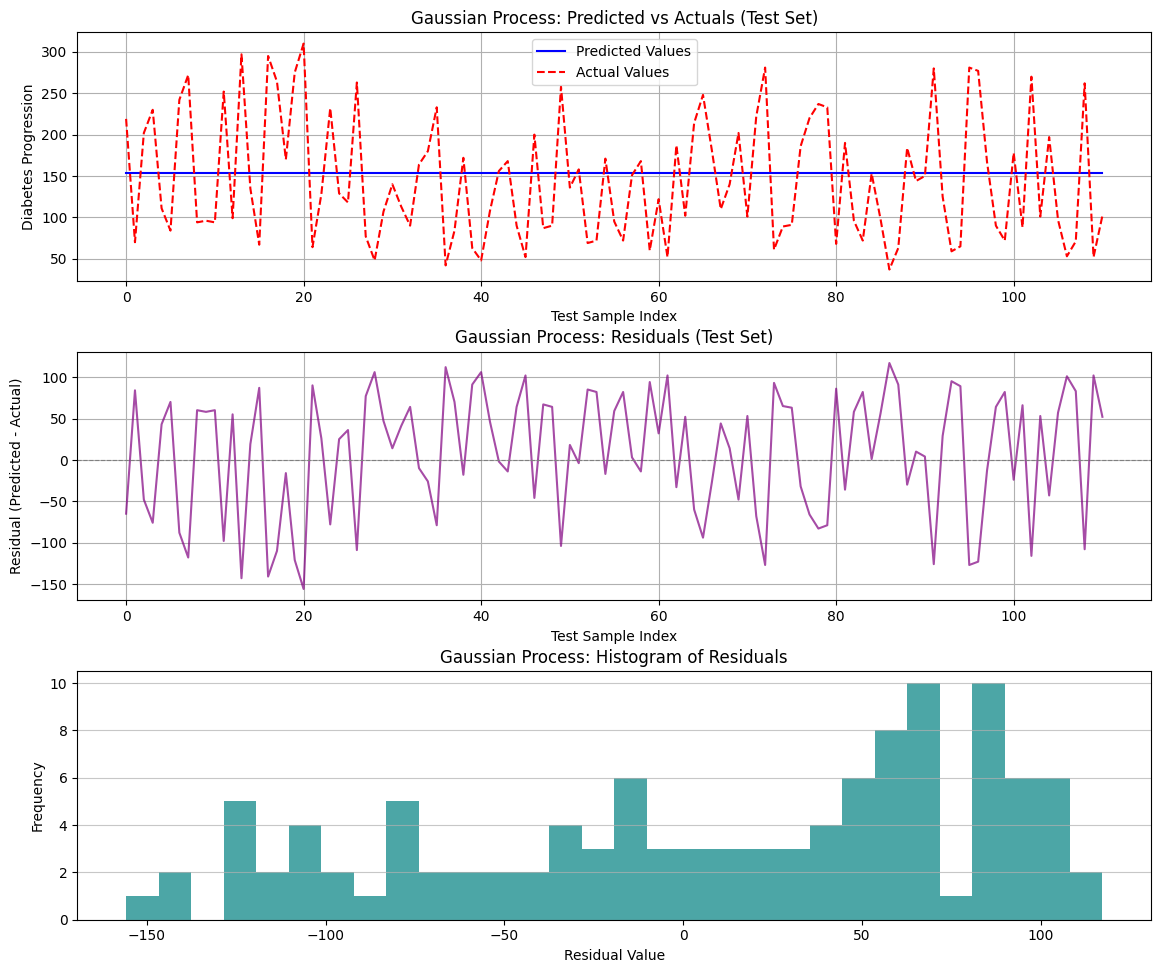

In [100]:
# --- 3. Plot Results for Gaussian Process ---
# Plot 1: Predicted vs Actual Values
fig, axes = plt.subplots(figsize=(12, 10), nrows=3) # Create figure with 3 subplots
fig.tight_layout(pad=3.0) # Adjust layout

# Use indices for plotting on x-axis, similar to the book's example
test_indices = np.arange(len(y_test))

axes[0].plot(test_indices, y_pred_gp, label='Predicted Values', color='blue')
axes[0].plot(test_indices, y_test, label='Actual Values', color='red', linestyle='--')
axes[0].set_title("Gaussian Process: Predicted vs Actuals (Test Set)")
axes[0].set_xlabel("Test Sample Index")
axes[0].set_ylabel("Diabetes Progression")
axes[0].legend(loc='best')
axes[0].grid(True)

# Plot 2: Residuals
residuals_gp = y_pred_gp - y_test
axes[1].plot(test_indices, residuals_gp, color='purple', alpha=0.7)
axes[1].set_title("Gaussian Process: Residuals (Test Set)")
axes[1].set_xlabel("Test Sample Index")
axes[1].set_ylabel("Residual (Predicted - Actual)")
axes[1].axhline(0, color='gray', linestyle='--', linewidth=0.8) # Add a line at y=0
axes[1].grid(True)

# Plot 3: Histogram of Residuals
axes[2].hist(residuals_gp, bins=30, color='teal', alpha=0.7)
axes[2].set_title("Gaussian Process: Histogram of Residuals")
axes[2].set_xlabel("Residual Value")
axes[2].set_ylabel("Frequency")
axes[2].grid(axis='y', alpha=0.7)

plt.show() # Display the first set of plots



Fitting Ridge Regressor...
Ridge Regressor fitted.


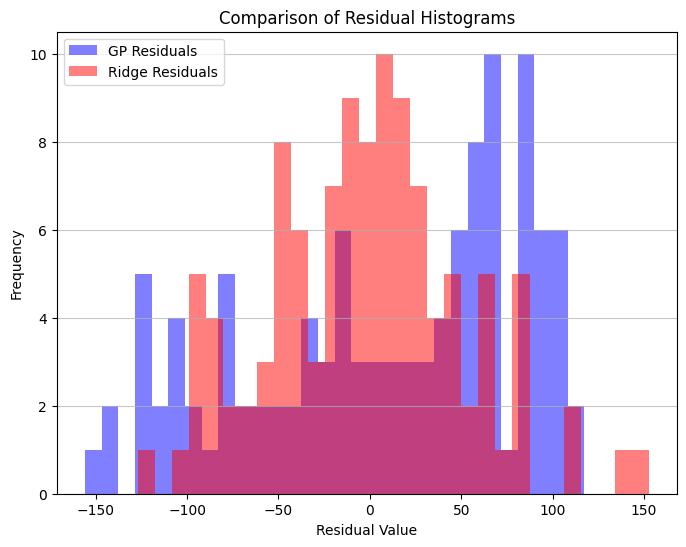

In [101]:
# --- 4. Apply Ridge Regression (for Comparison) ---
# We use Ridge as a standard linear model for comparison.
# It's also related to Bayesian Linear Regression.

# Create a Ridge Regressor instance
ridge = Ridge(alpha=1.0) # alpha is the regularization strength, can be tuned

print("\nFitting Ridge Regressor...")
# Fit the Ridge model to the SCALED training data
ridge.fit(X_train_scaled, y_train)
print("Ridge Regressor fitted.")

# Make predictions on the SCALED test data
y_pred_ridge = ridge.predict(X_test_scaled)


# --- 5. Compare Residual Histograms ---
# Plot the histogram of residuals for both models on the same plot

fig, ax = plt.subplots(figsize=(8, 6)) # Create a single subplot

ax.hist(residuals_gp, bins=30, label='GP Residuals', color='b', alpha=0.5)
ax.hist(y_pred_ridge - y_test, bins=30, label='Ridge Residuals', color='r', alpha=0.5) # Calculate Ridge residuals here
ax.set_title("Comparison of Residual Histograms")
ax.set_xlabel("Residual Value")
ax.set_ylabel("Frequency")
ax.legend(loc='best')
ax.grid(axis='y', alpha=0.7)

plt.show() # Display the second set of plots


In [102]:
# --- 6. Calculate and Compare MSE ---
# Calculate Mean Squared Error for both models on the test set

mse_gp = mean_squared_error(y_test, y_pred_gp)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"\nMean Squared Error (GP): {mse_gp:.4f}")
print(f"Mean Squared Error (Ridge): {mse_ridge:.4f}")

# Note: MSE values will vary slightly each time you run if random_state in train_test_split is not fixed.
# They also depend on the dataset and model parameters.



Mean Squared Error (GP): 5605.1222
Mean Squared Error (Ridge): 2842.8346



Standard deviations for the first 5 test predictions:
[77.98234642 77.98234642 77.98234642 77.98234642 77.98234642]


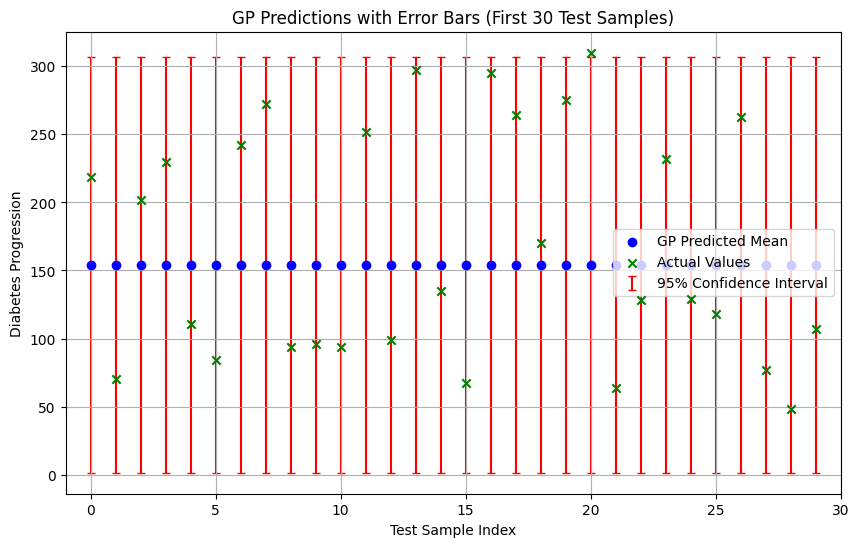

In [103]:
# --- 7. Make Predictions with Uncertainty (GP) and Plot Error Bars ---
# GaussianProcessRegressor's predict method can return standard deviation or covariance

# Make predictions on the SCALED test data and request standard deviation
y_pred_gp_mean, y_pred_gp_std = gp.predict(X_test_scaled, return_std=True)
# y_pred_gp_mean is the same as y_pred_gp calculated earlier
# y_pred_gp_std contains the standard deviation of the prediction for each test sample

print("\nStandard deviations for the first 5 test predictions:")
print(y_pred_gp_std[:5])


# Plot predictions with error bars for a subset of the test data
n_plot = 30 # Number of test samples to plot
plot_indices = np.arange(n_plot)

fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot of predicted values
ax.scatter(plot_indices, y_pred_gp_mean[:n_plot], label='GP Predicted Mean', color='blue', zorder=5)

# Plot error bars (representing uncertainty)
# 1.96 * std_dev gives approximate 95% confidence interval boundaries
ax.errorbar(plot_indices, y_pred_gp_mean[:n_plot], yerr=1.96 * y_pred_gp_std[:n_plot],
            fmt='none', capsize=3, ecolor='red', label='95% Confidence Interval', zorder=1)

# Optionally, plot actual values to see how they fall within the error bars
ax.scatter(plot_indices, y_test[:n_plot], label='Actual Values', color='green', marker='x', zorder=10)


ax.set_title(f"GP Predictions with Error Bars (First {n_plot} Test Samples)")
ax.set_xlabel("Test Sample Index")
ax.set_ylabel("Diabetes Progression")
ax.set_xlim((-1, n_plot)) # Set x-axis limits nicely
ax.legend(loc='best')
ax.grid(True)

plt.show() # Display the error bar plot

## **EDA on AMES Housing Data**

In [109]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True, parser='auto')
# 'house_prices' is the name for Ames Housing on OpenML
# Note: as_frame=True loads it into a Pandas DataFrame, which is often helpful for this dataset
df_full = housing.frame
df_full

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [113]:
# This seperates the numeric and categorical variables in to two seperate data frames
numeric_data = df_full.select_dtypes(include=[np.number])
categorical_data = df_full.select_dtypes(exclude=[np.number])

print(numeric_data.describe)

<bound method NDFrame.describe of         Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0  

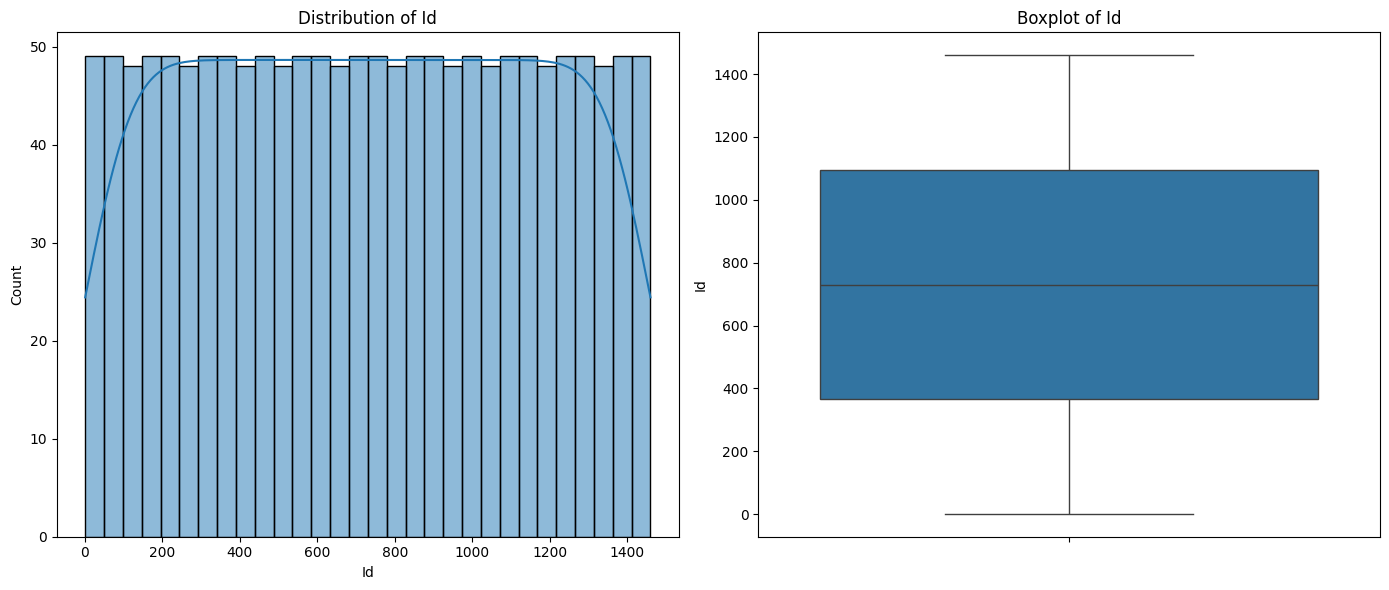

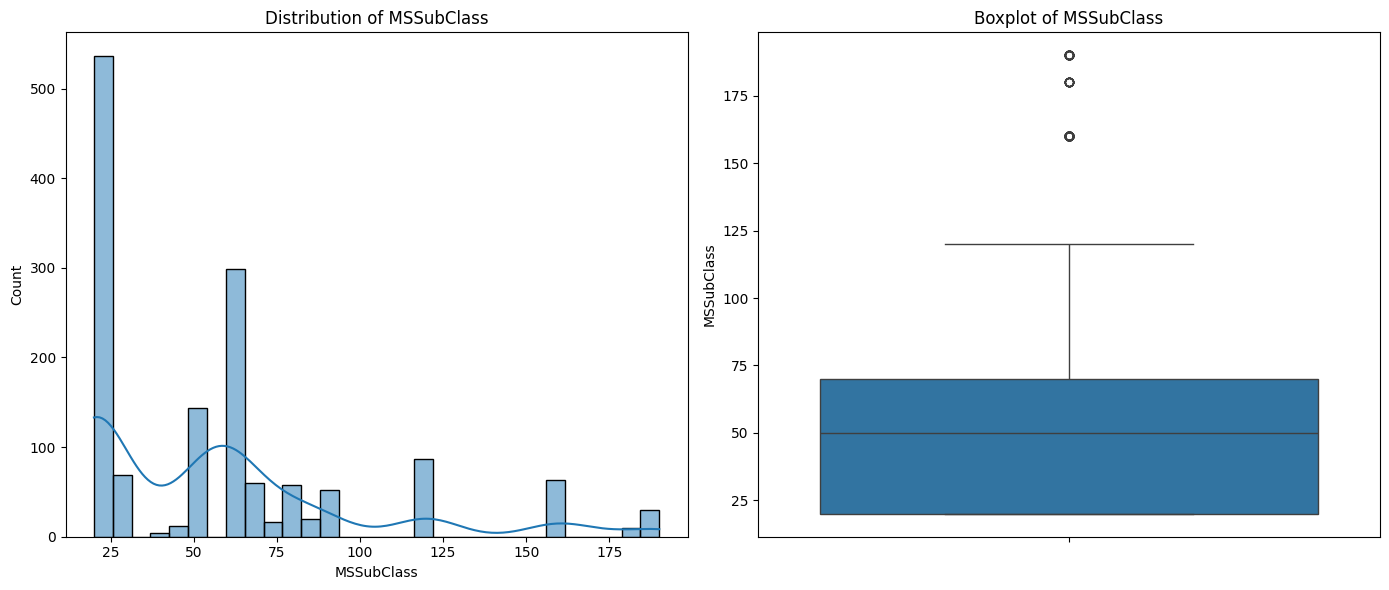

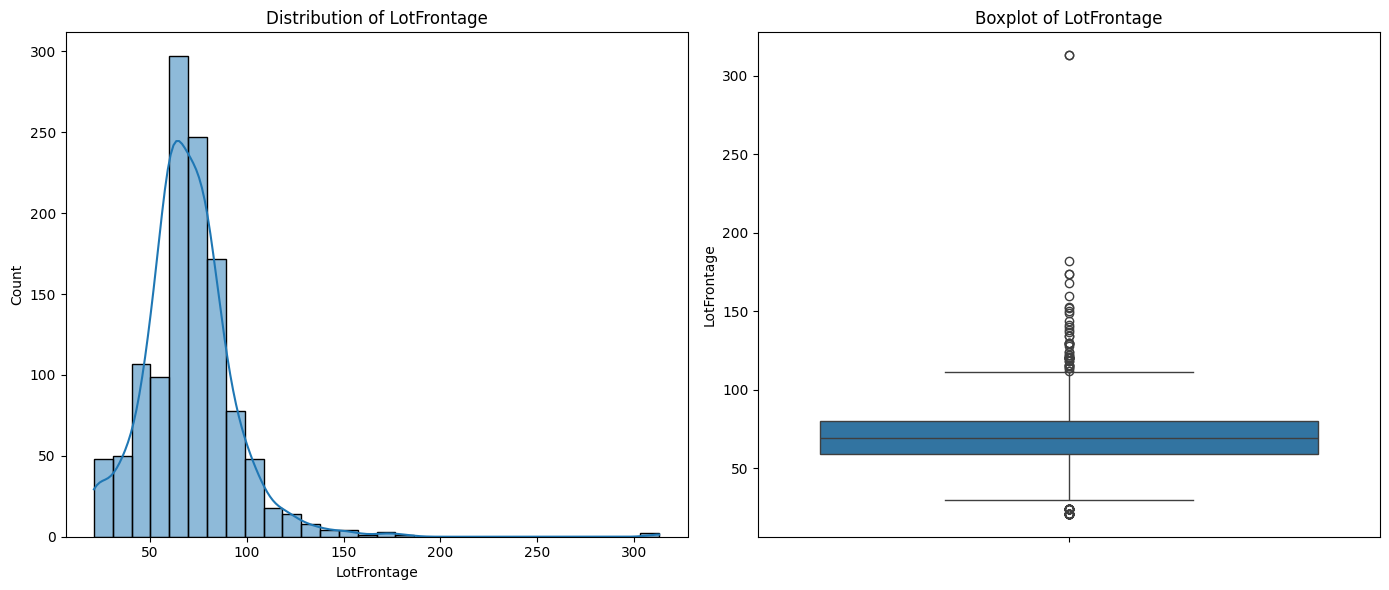

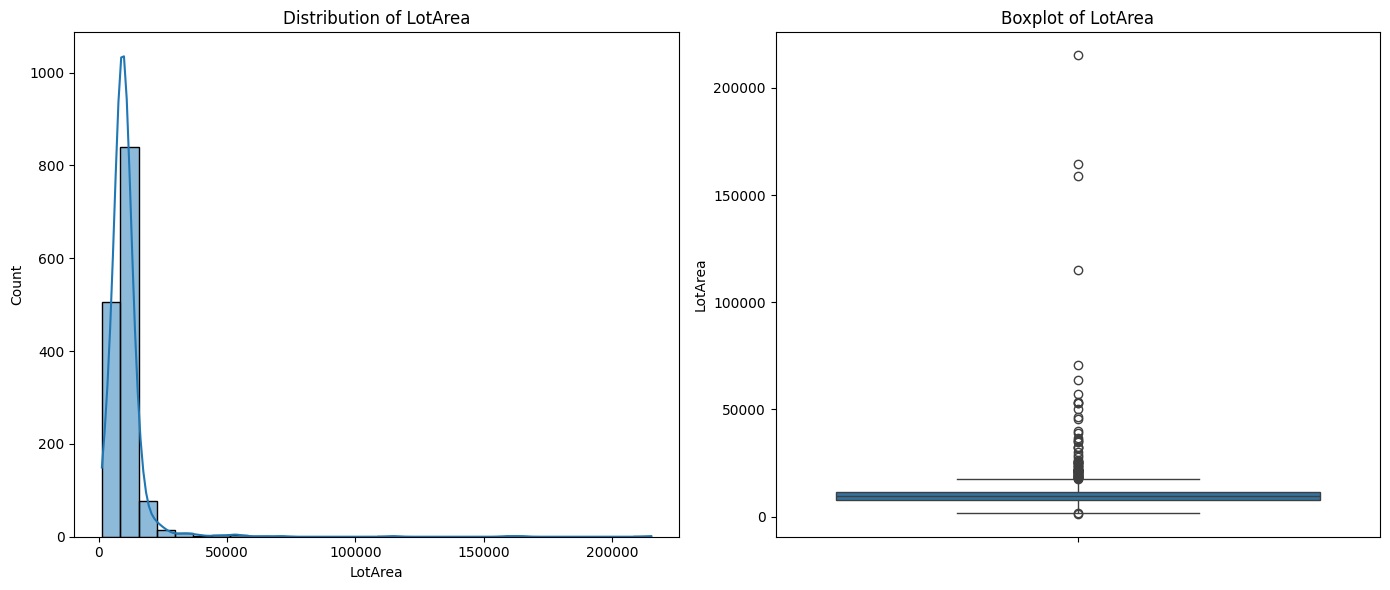

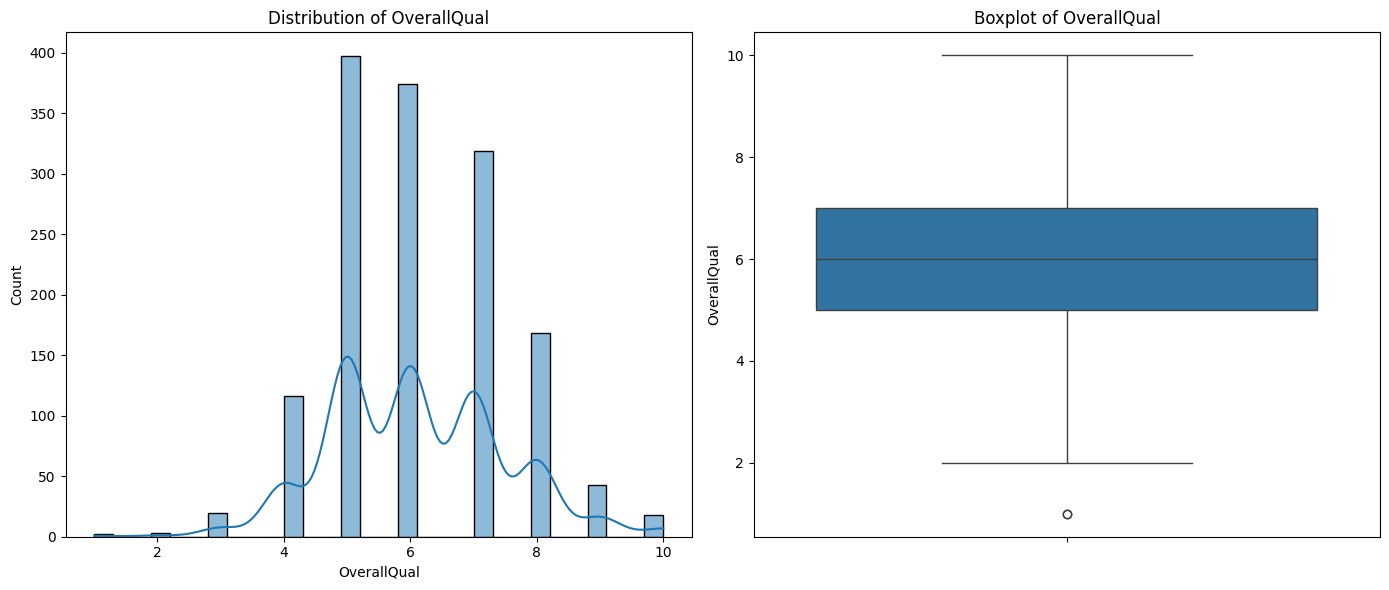

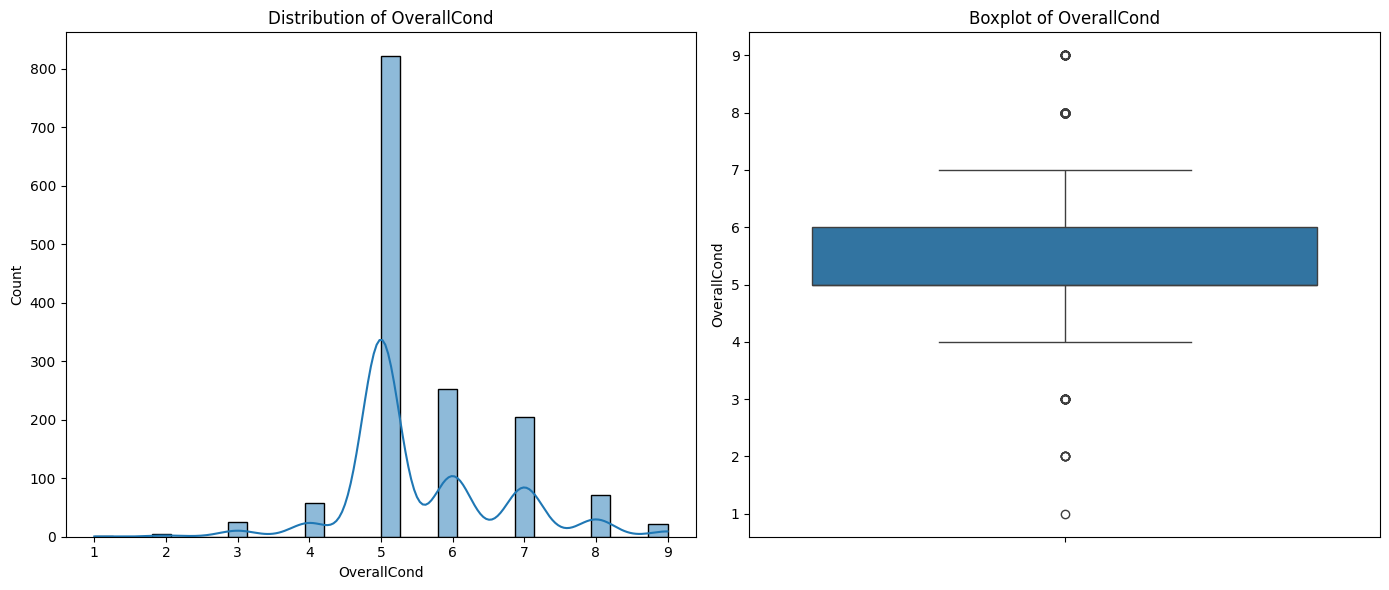

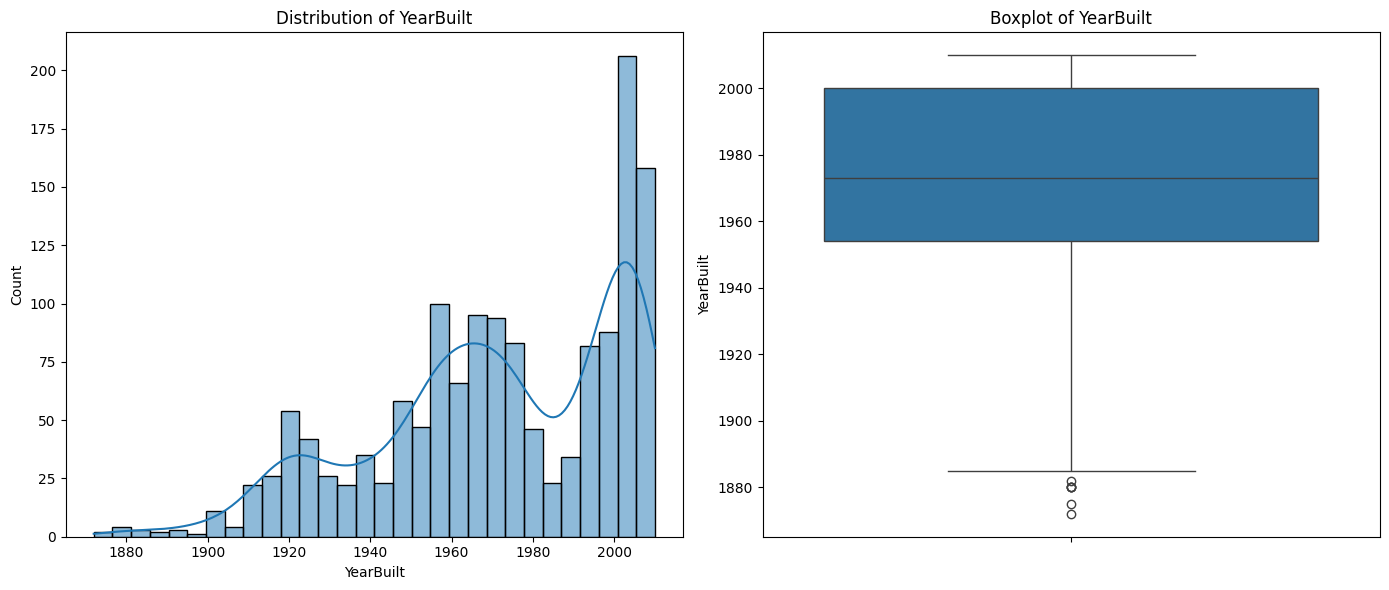

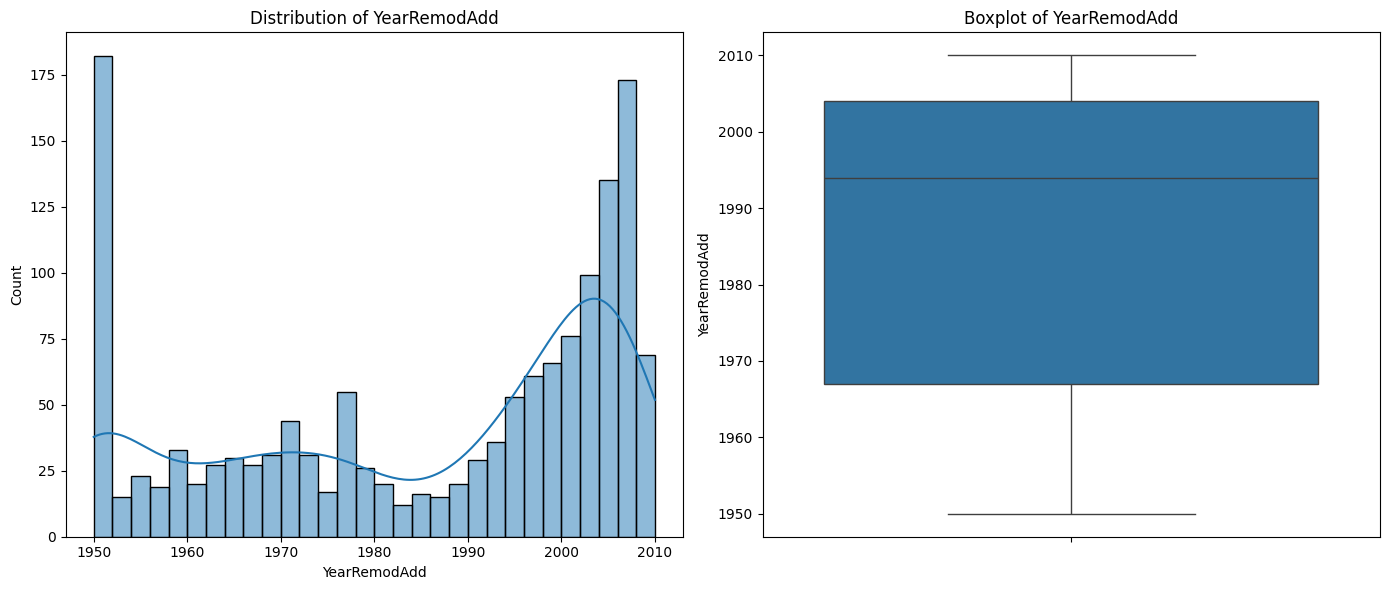

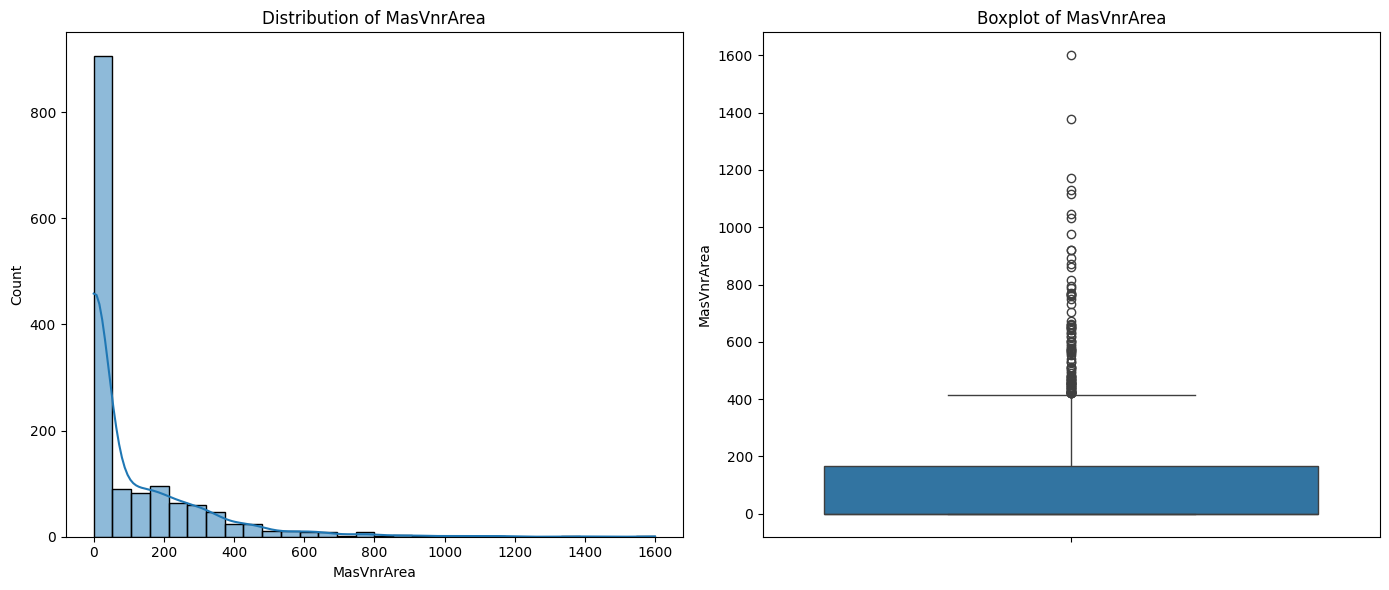

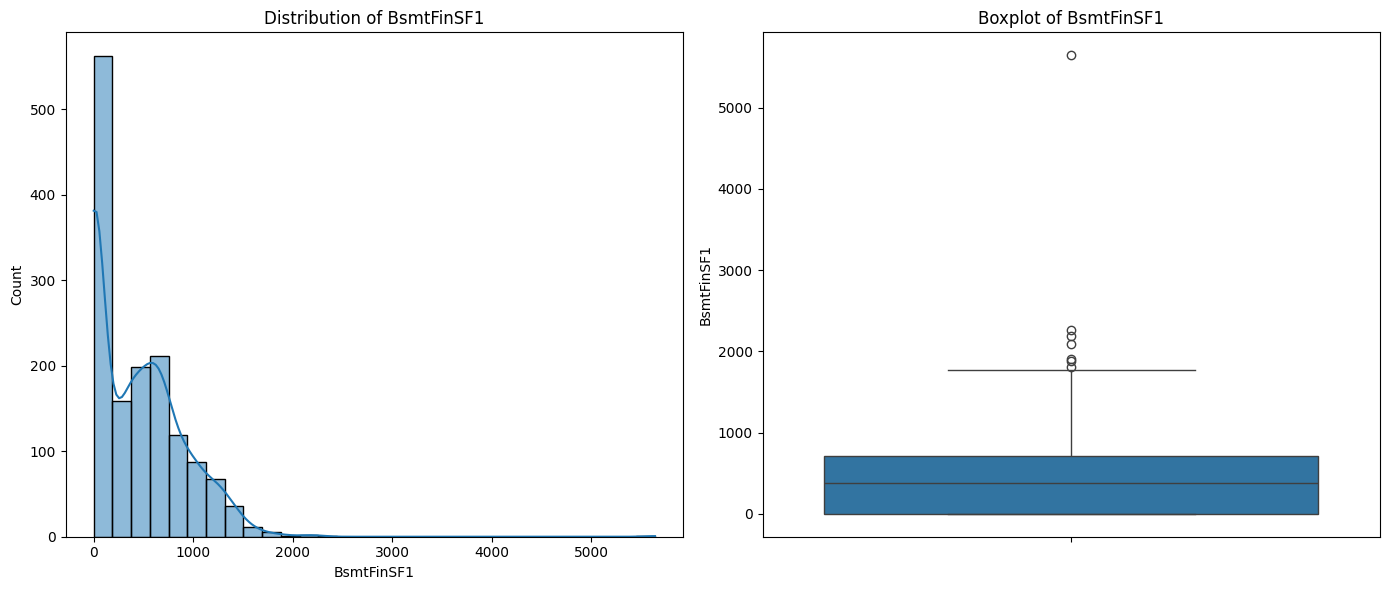

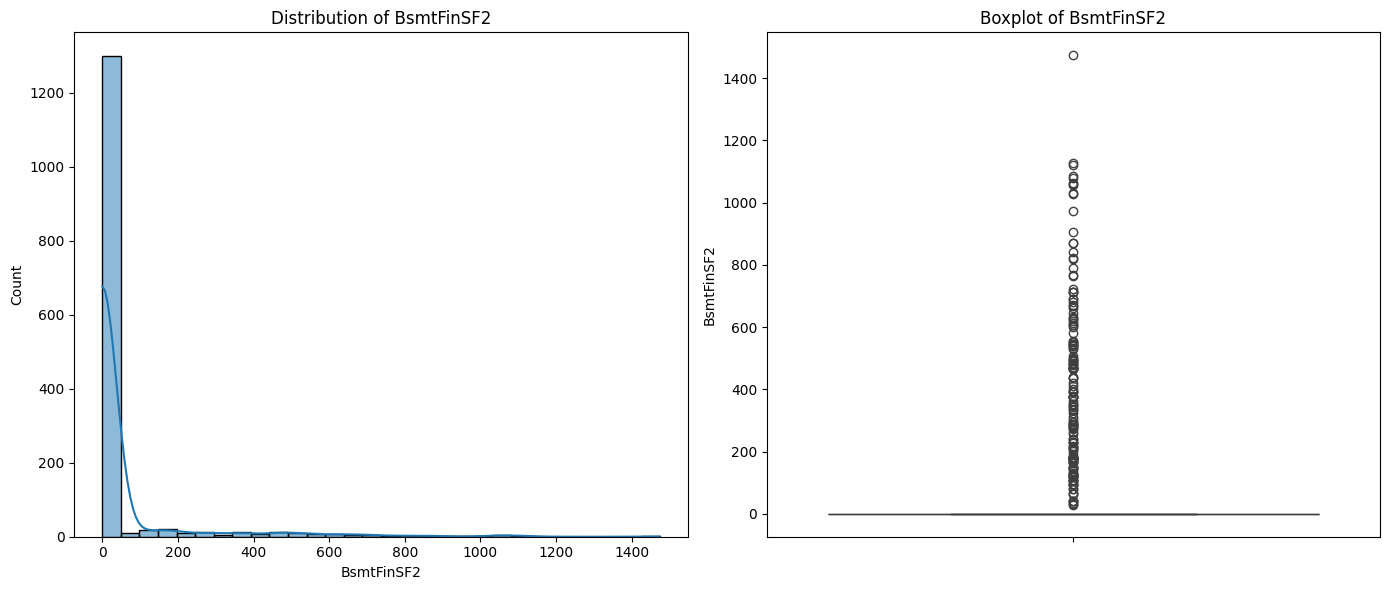

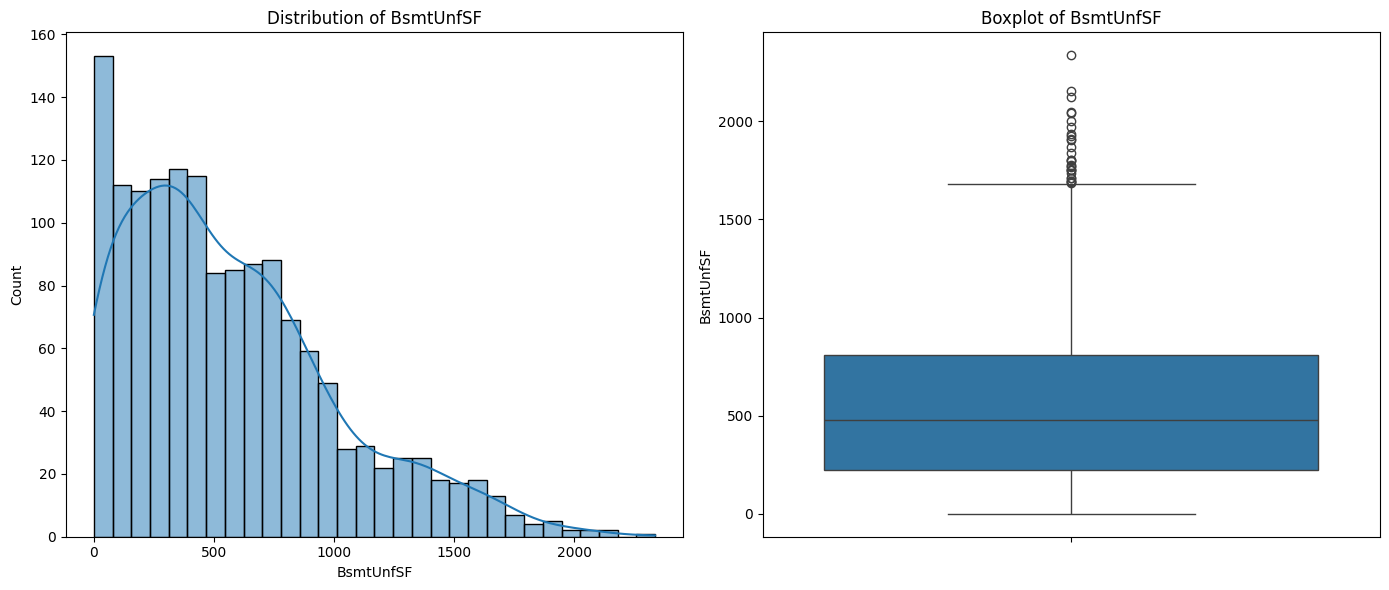

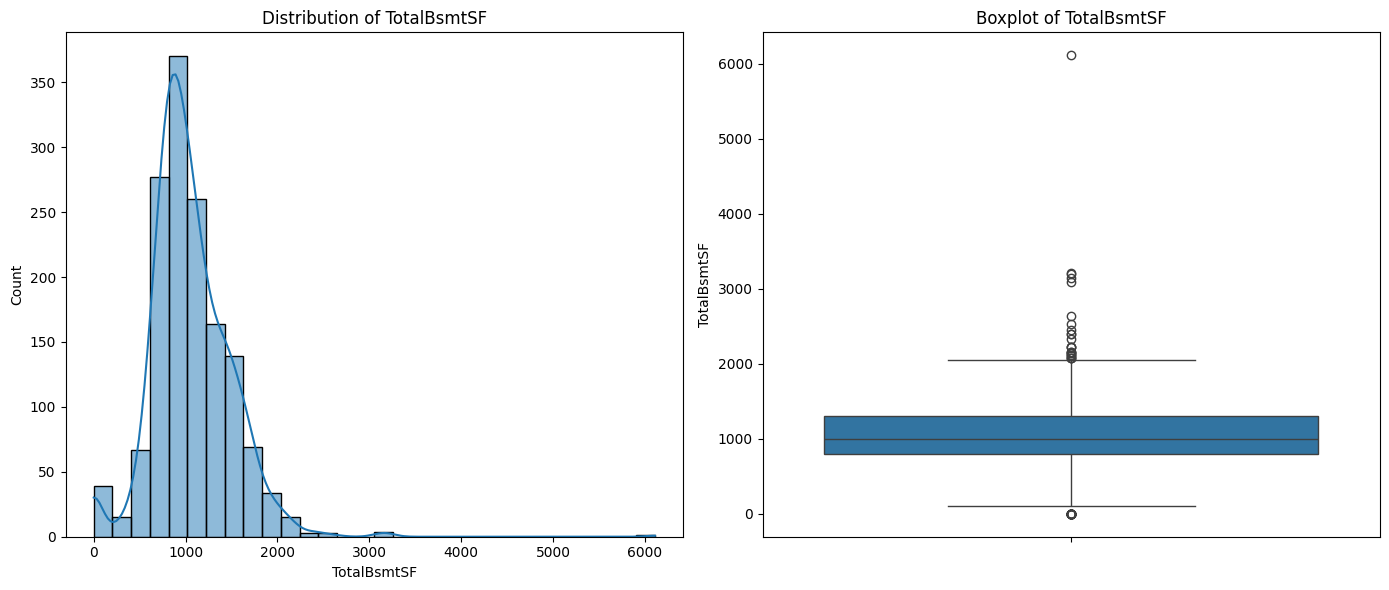

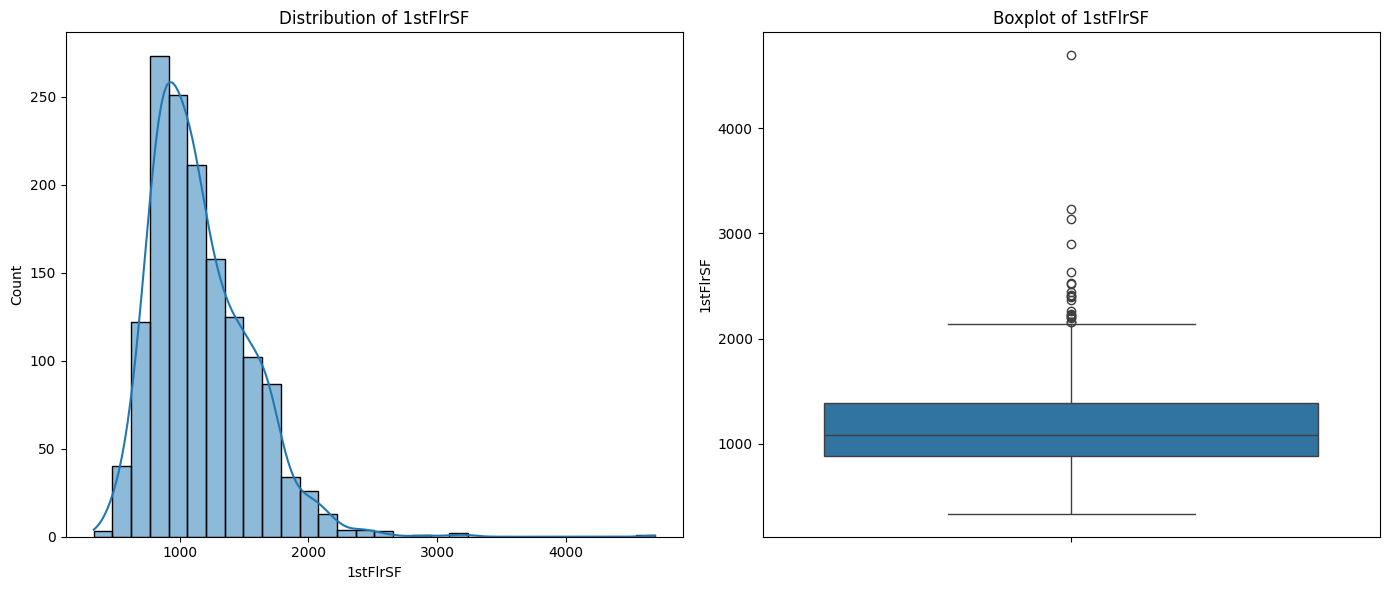

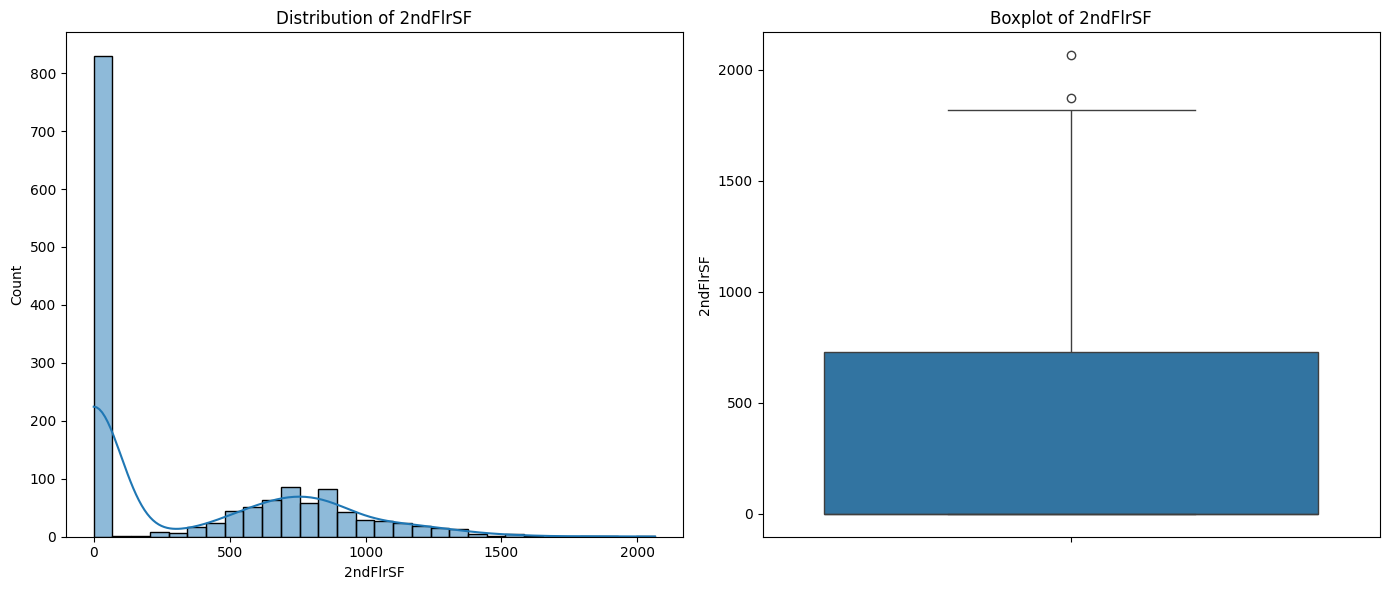

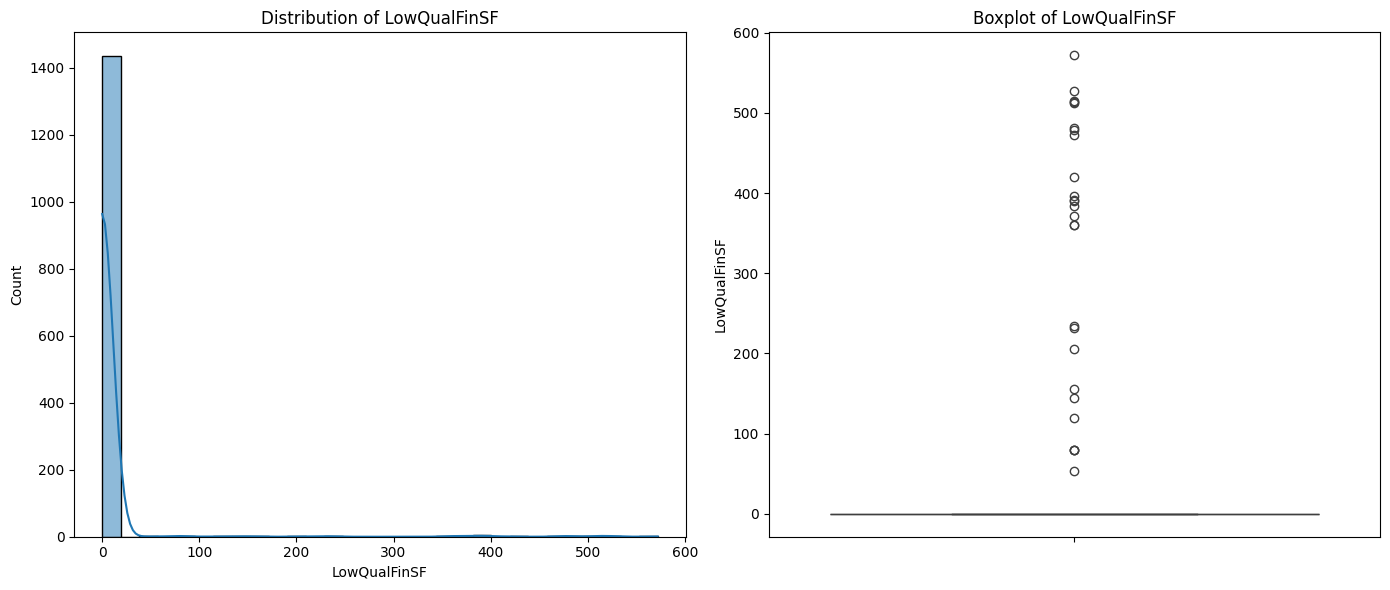

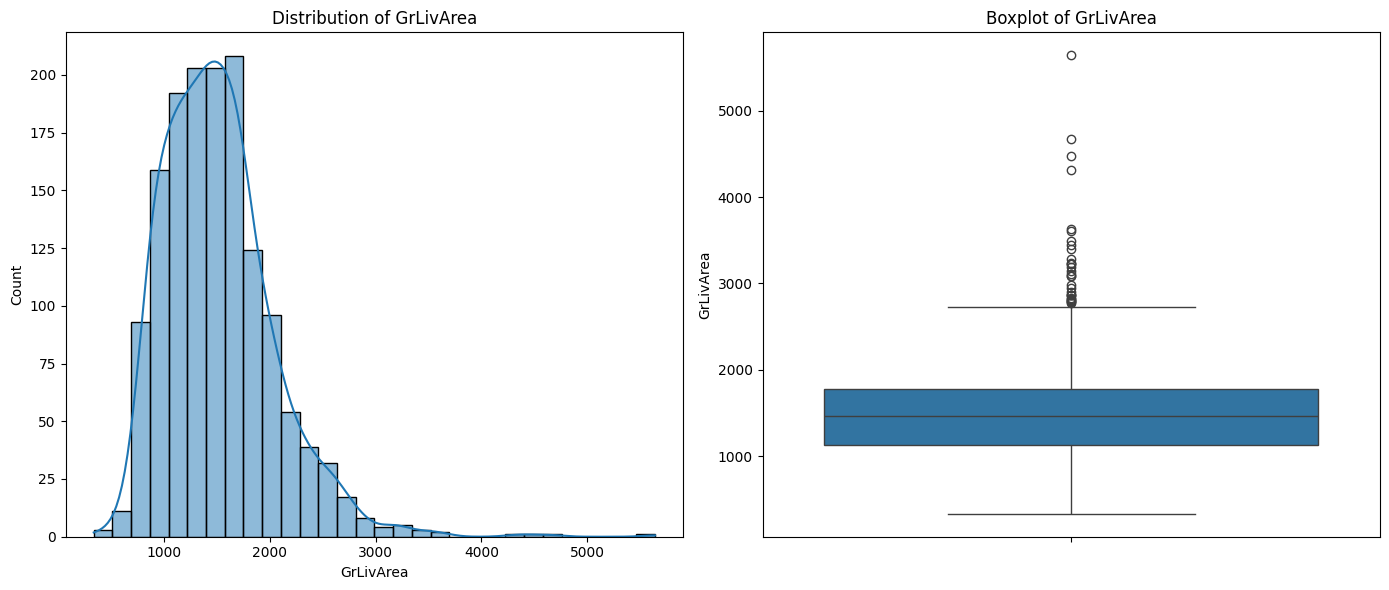

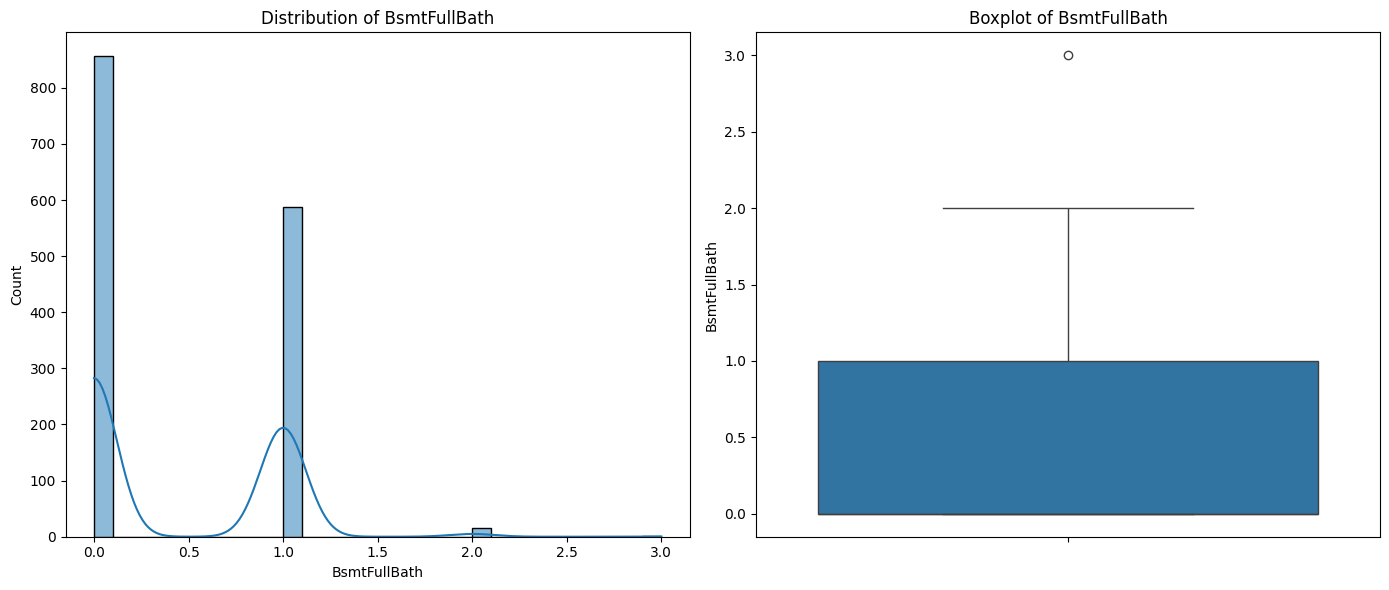

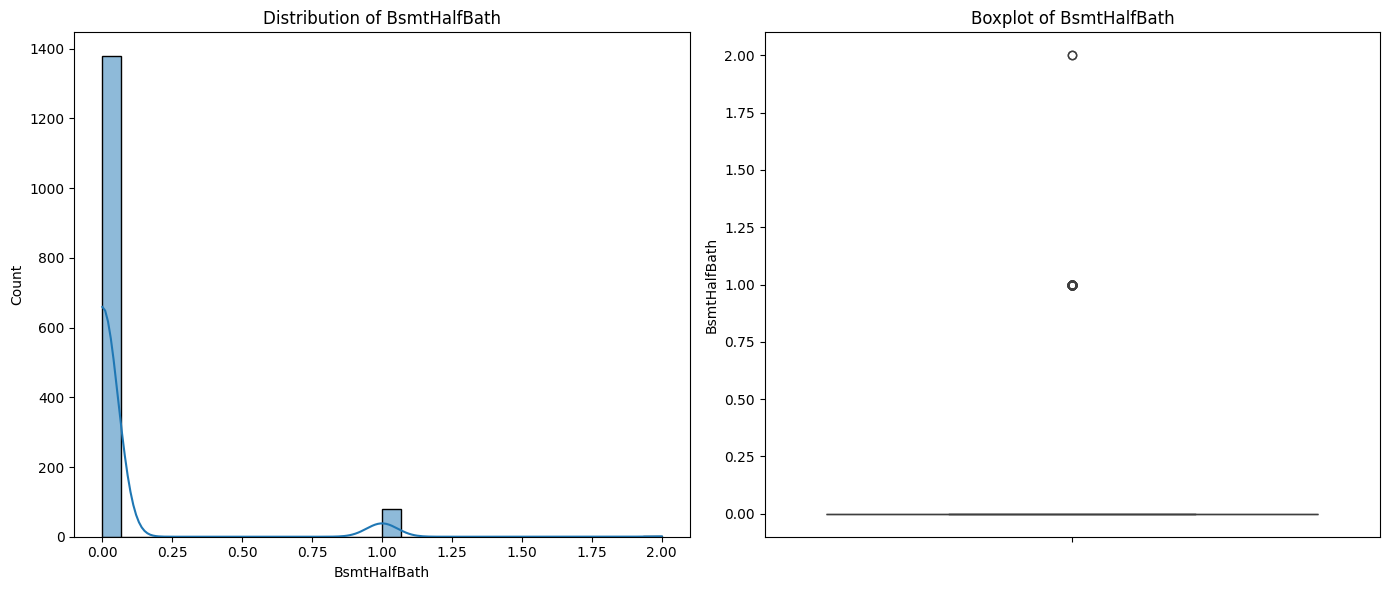

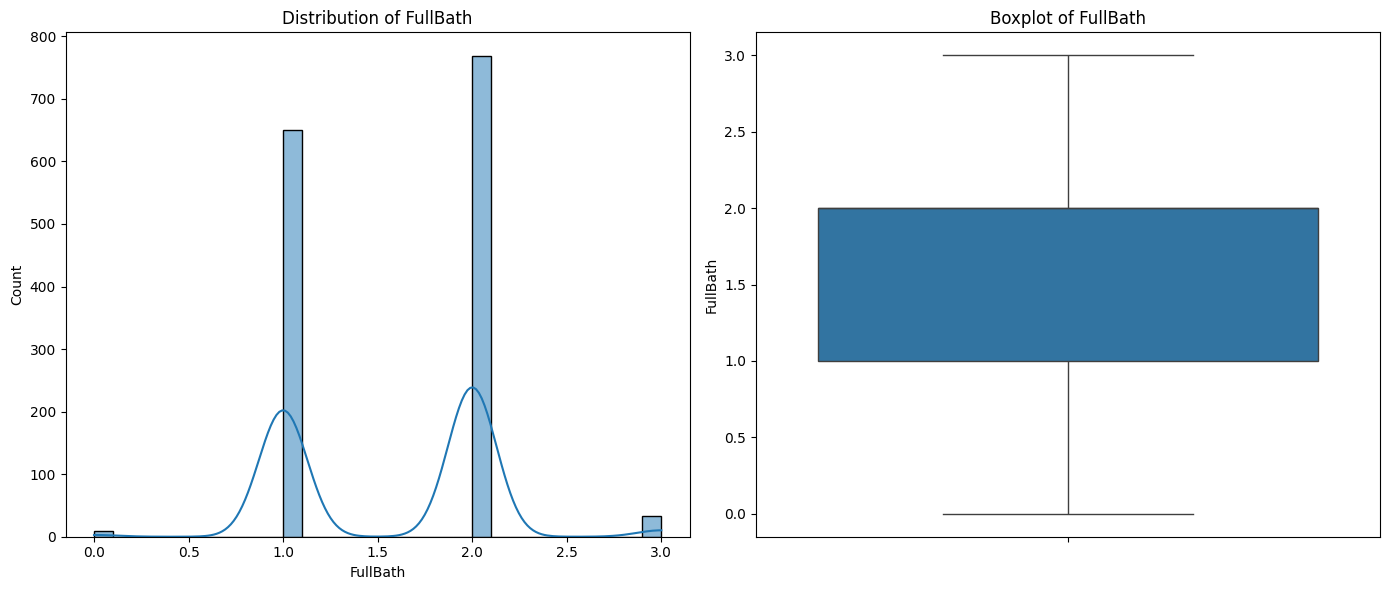

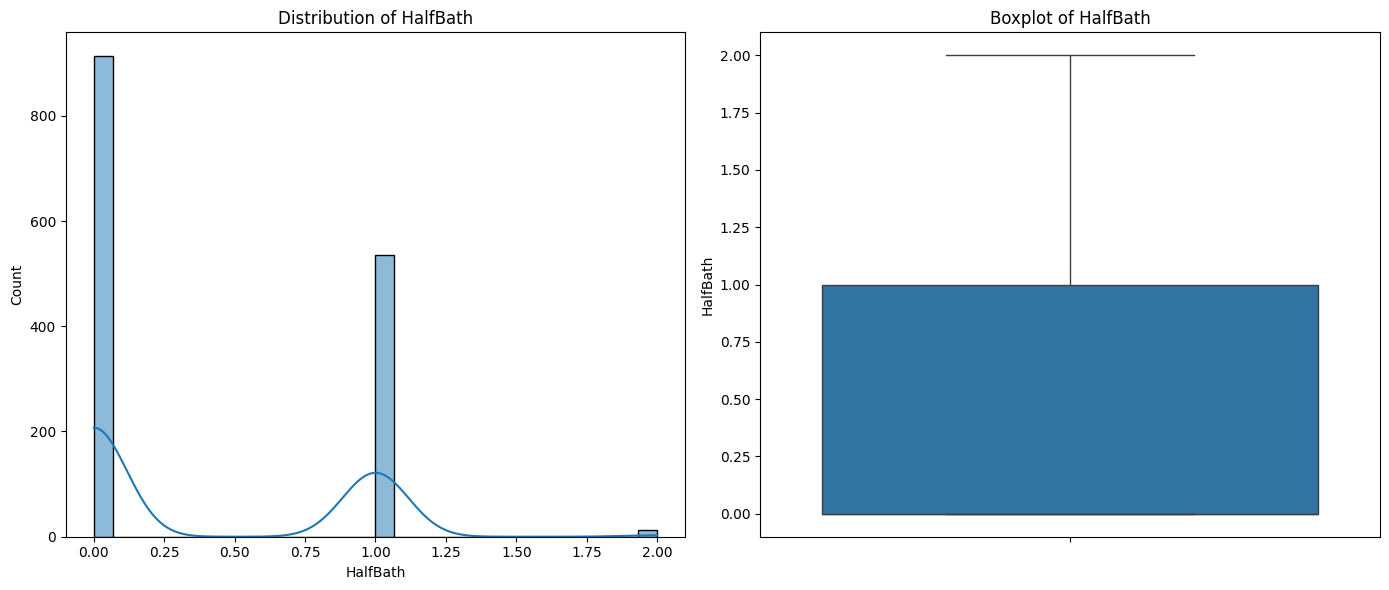

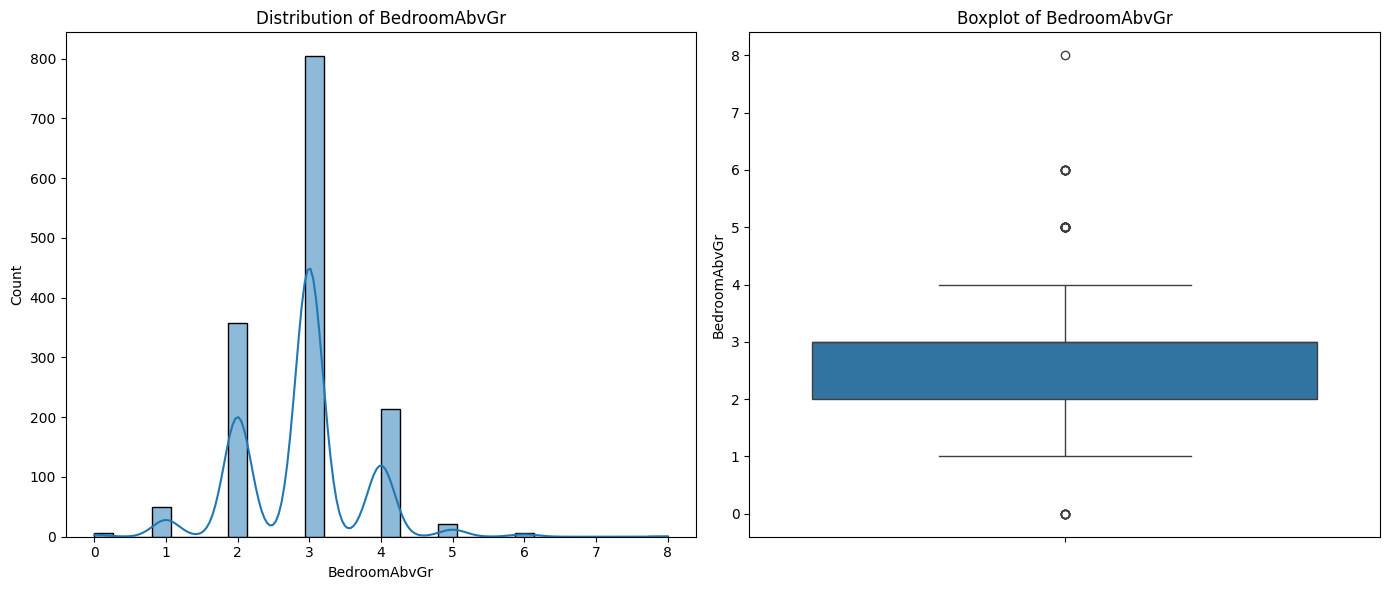

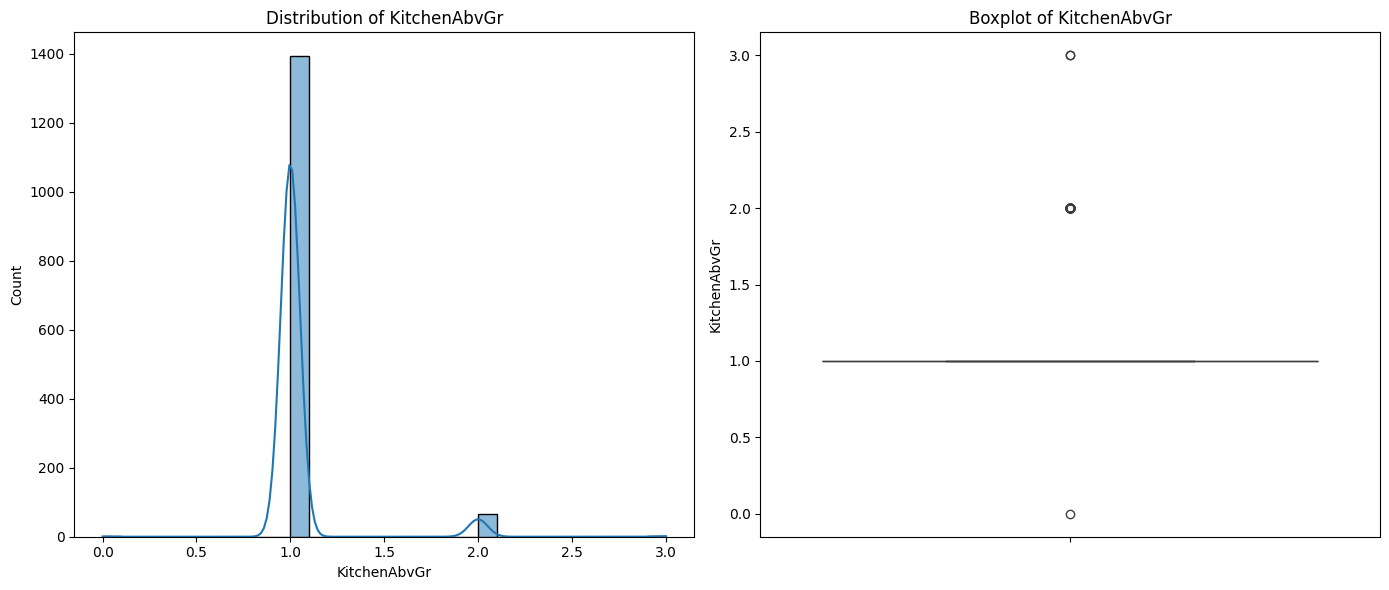

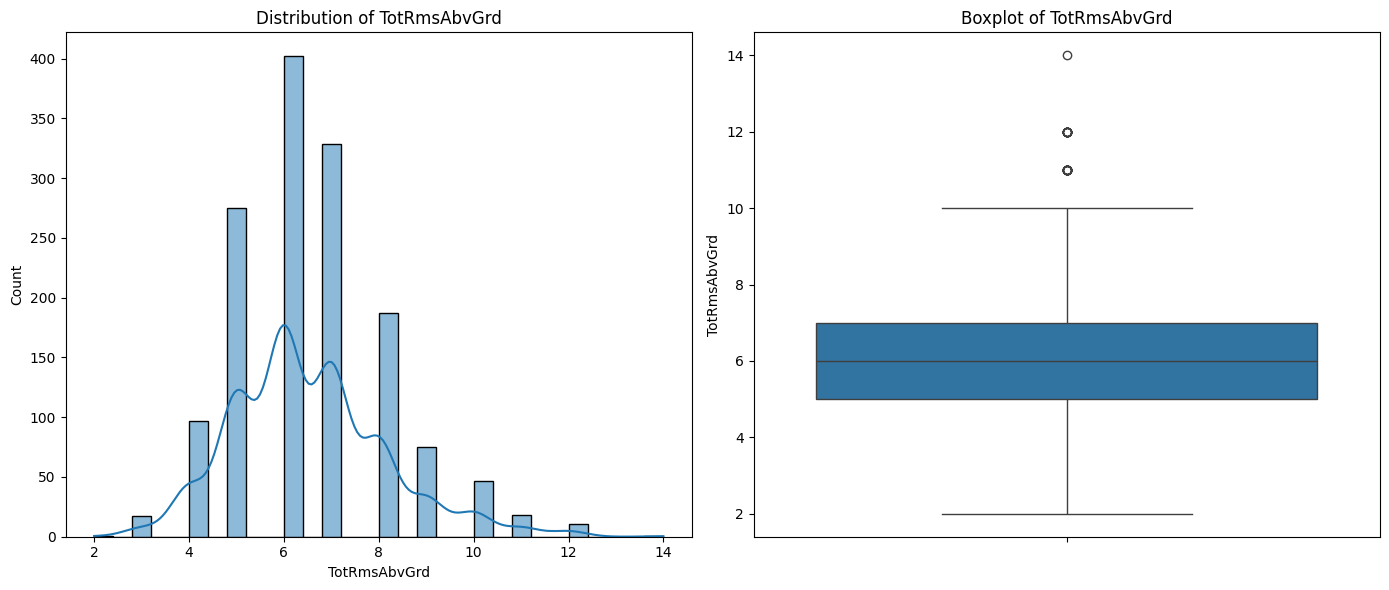

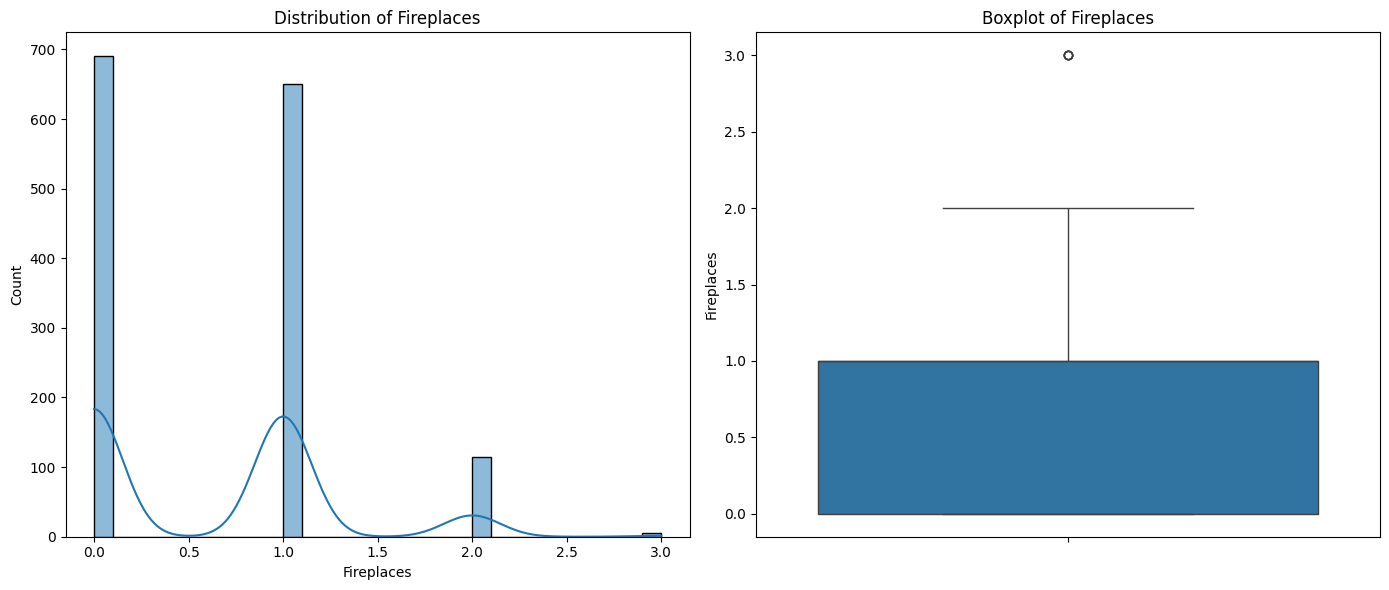

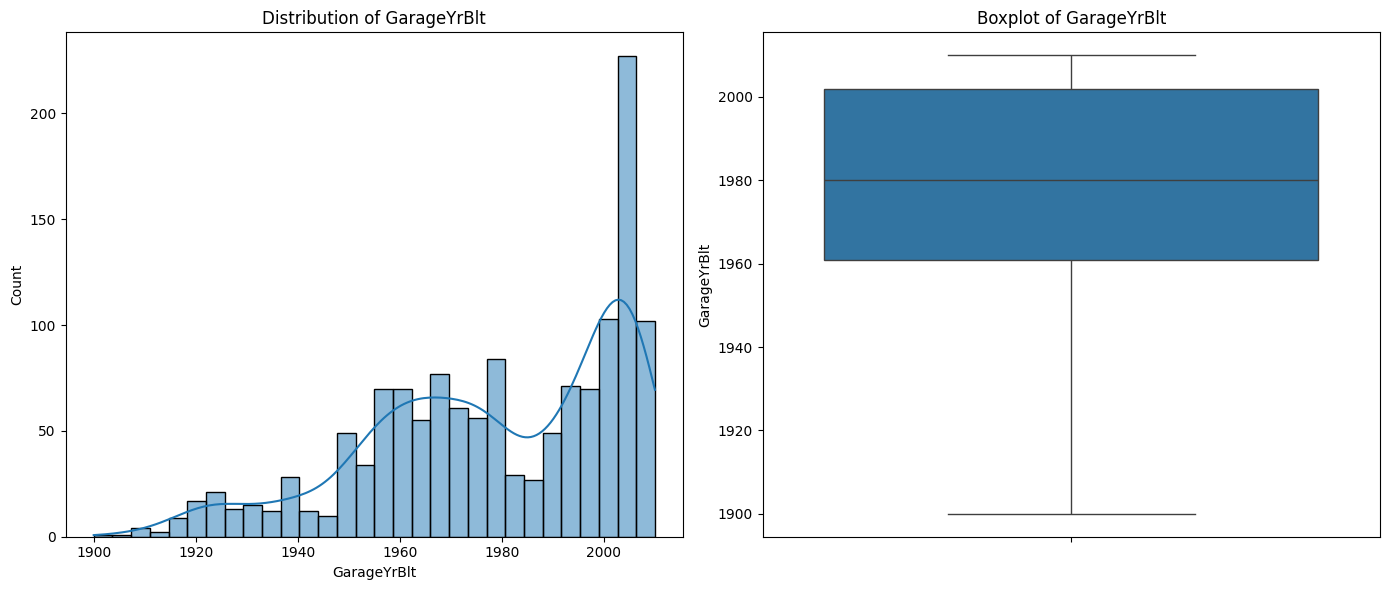

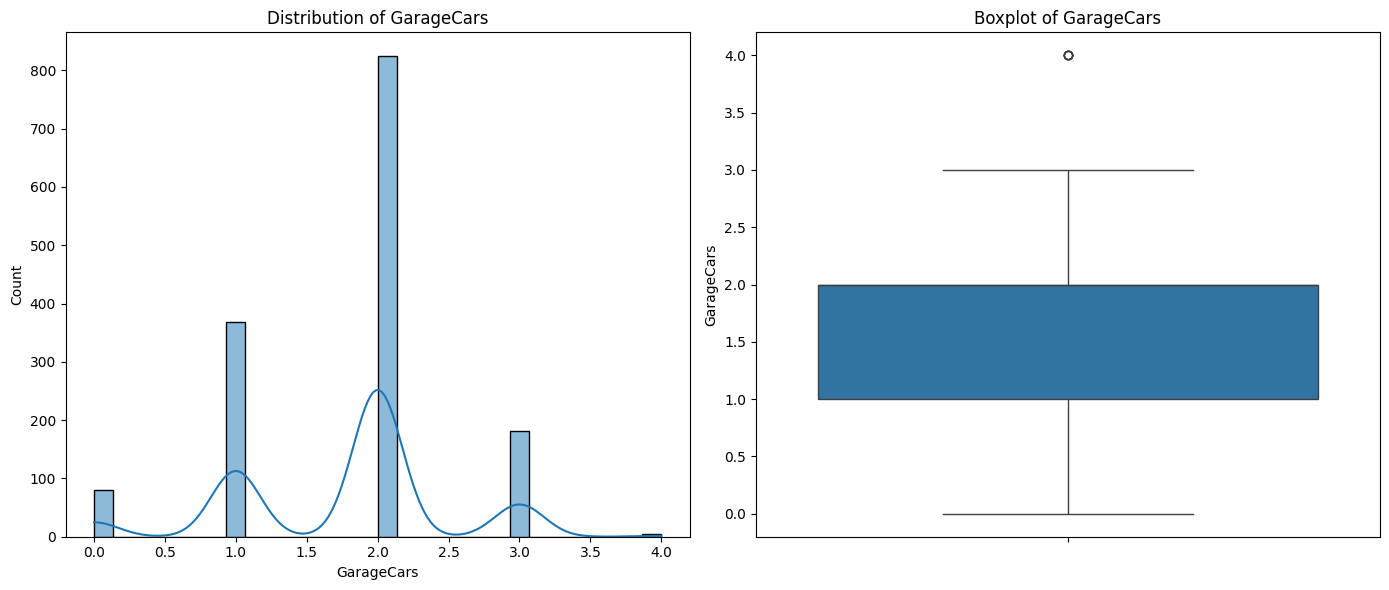

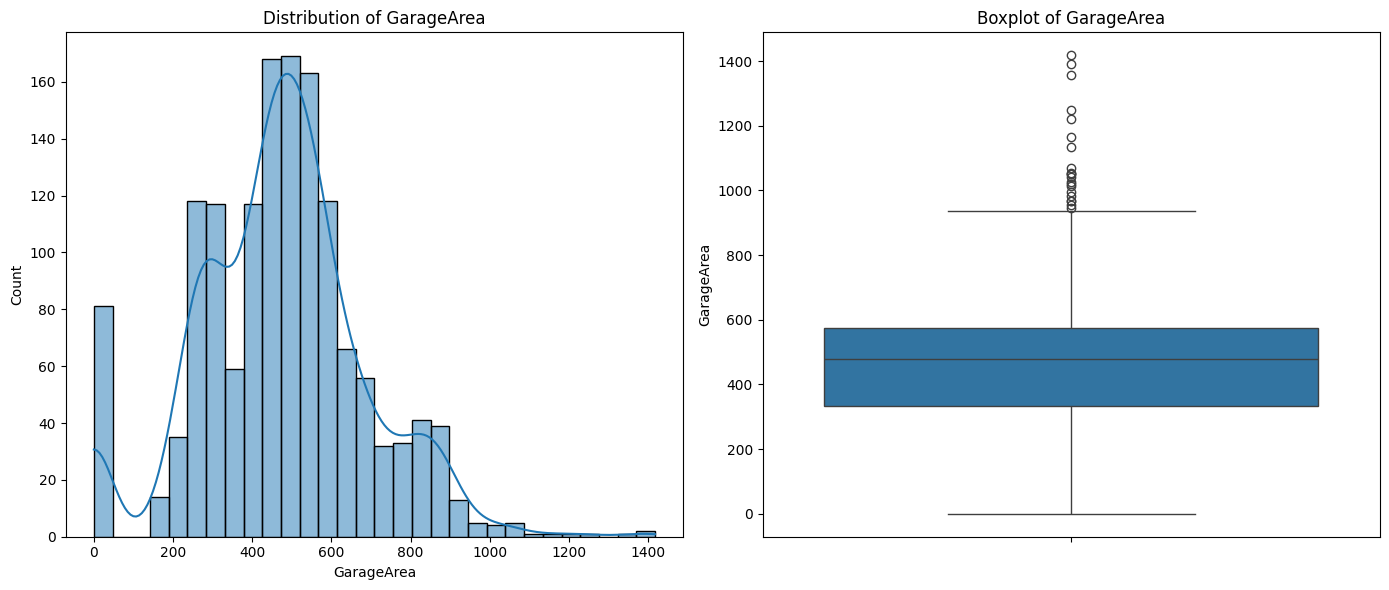

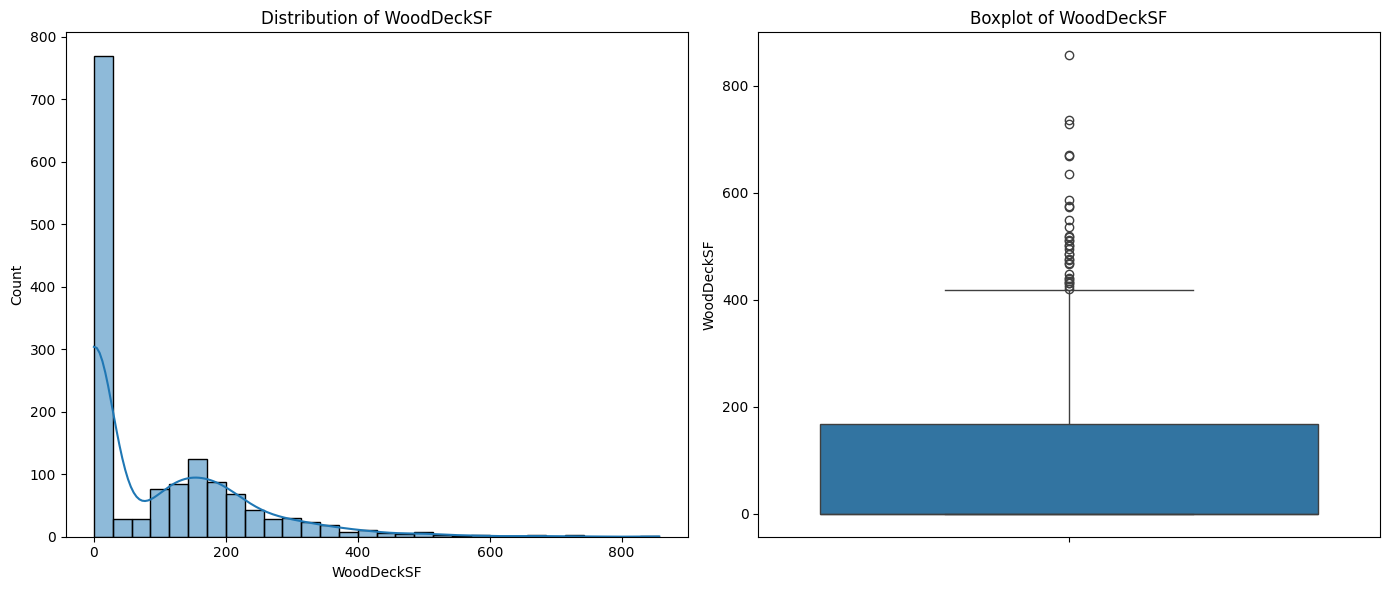

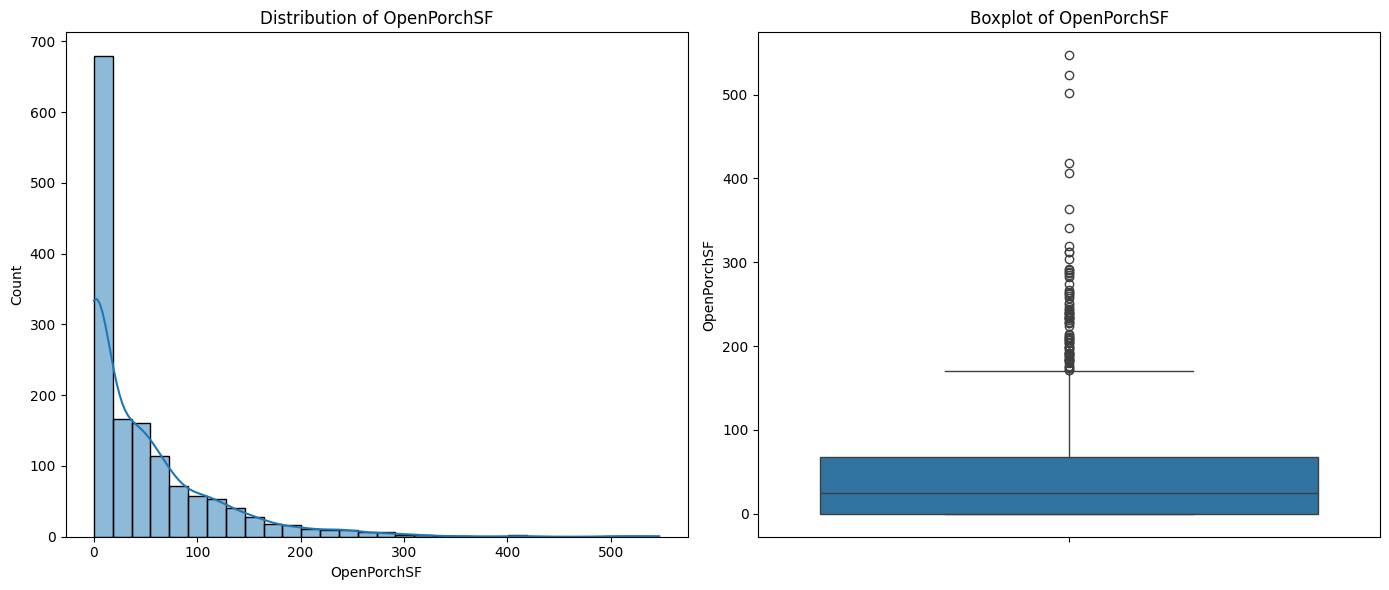

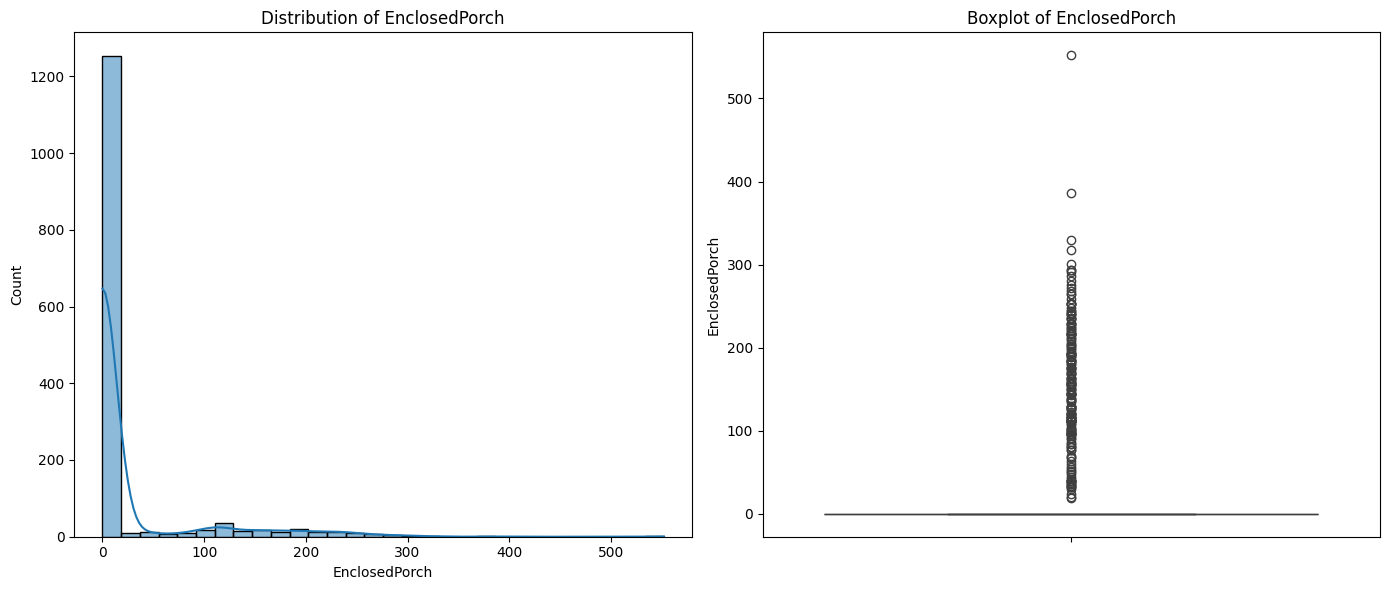

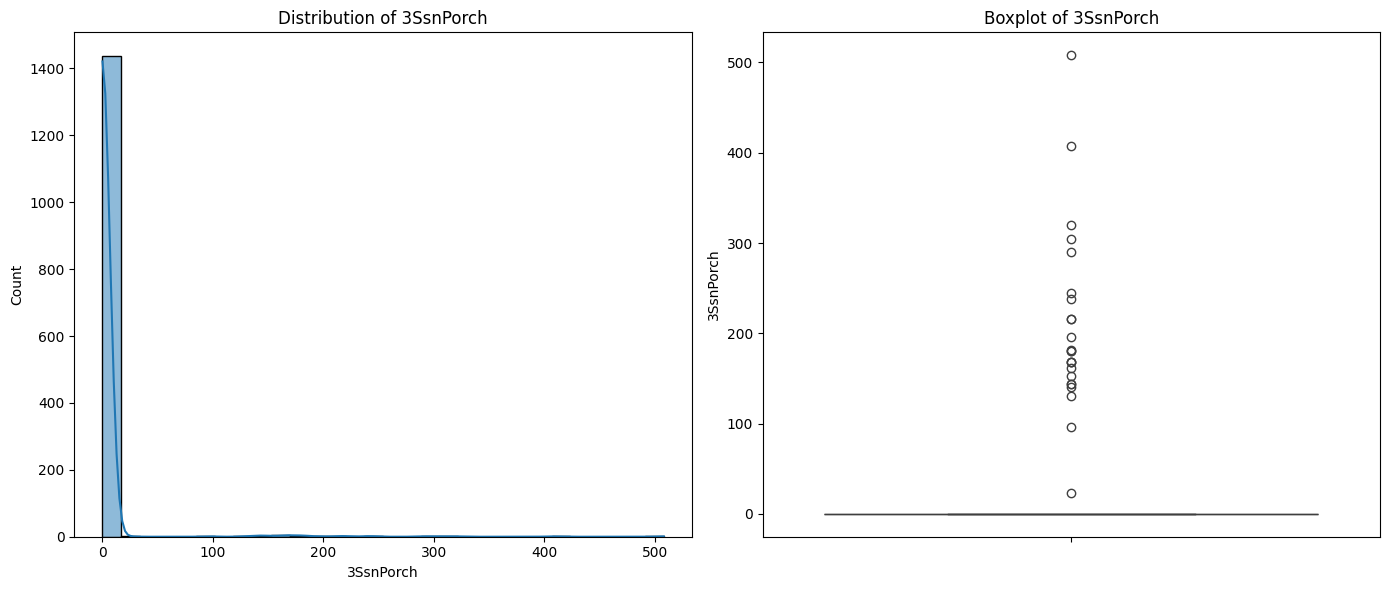

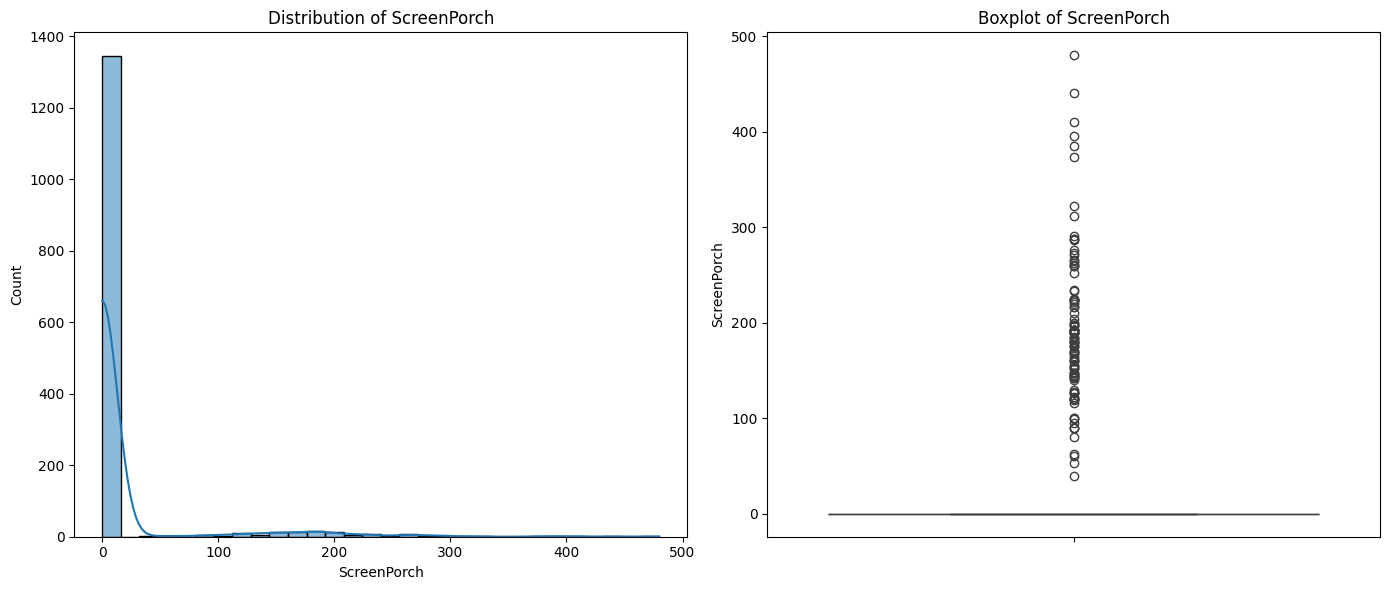

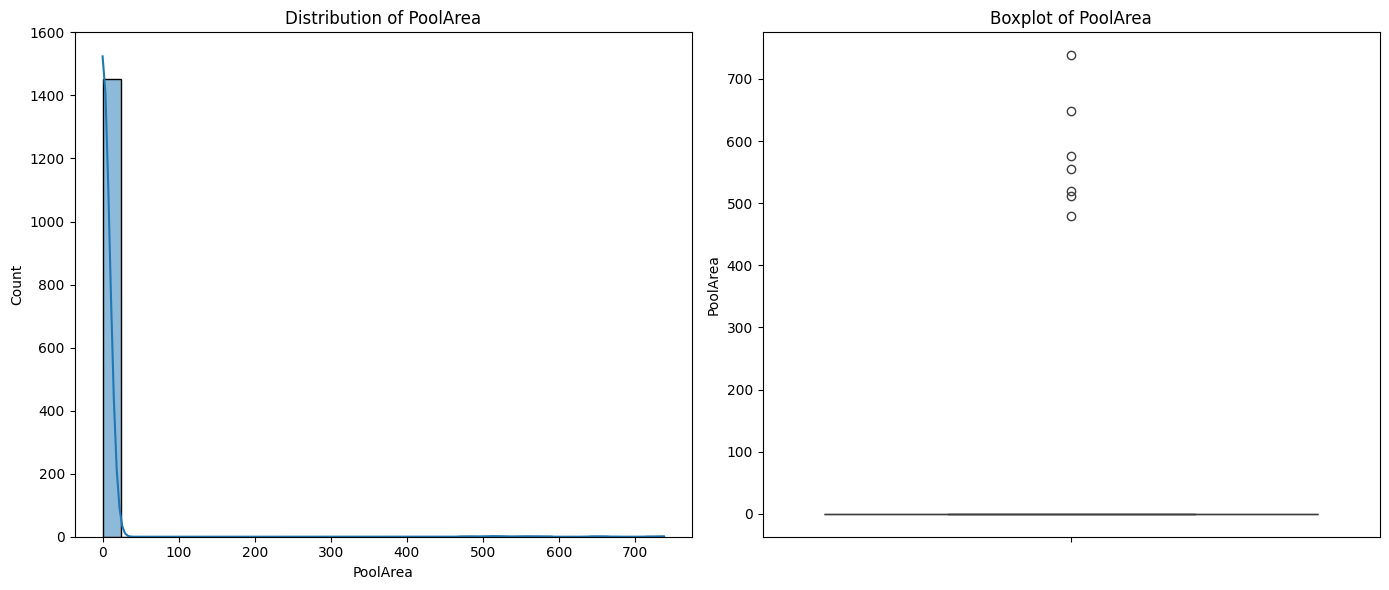

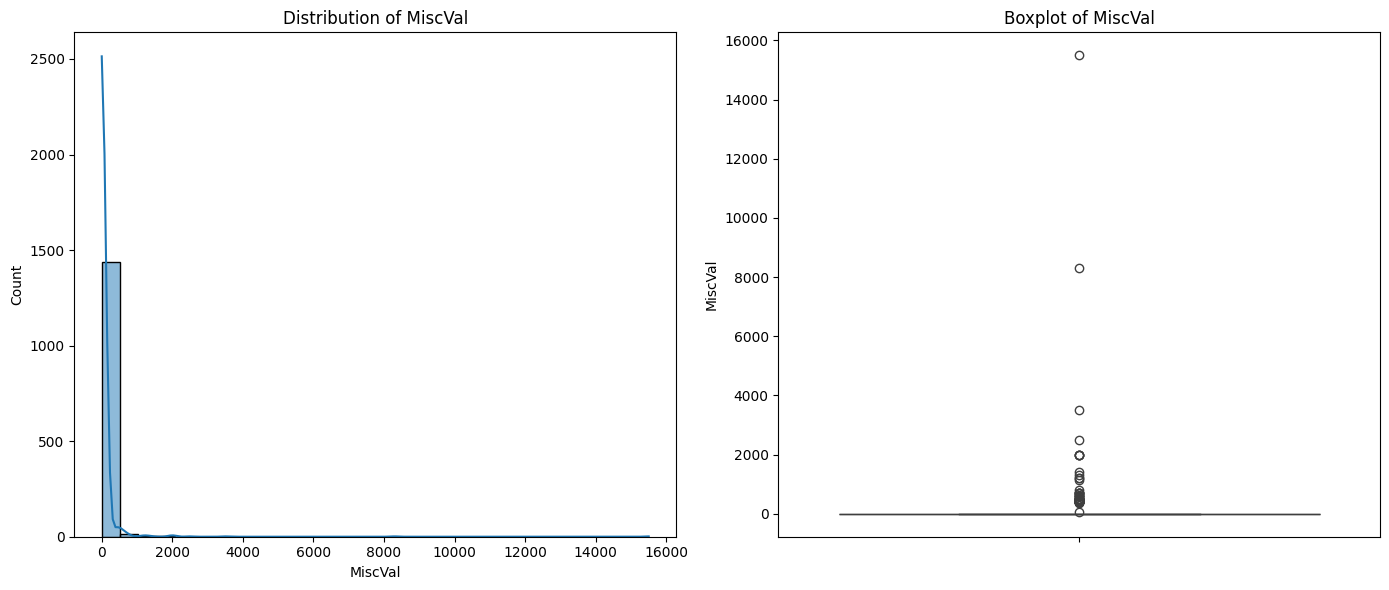

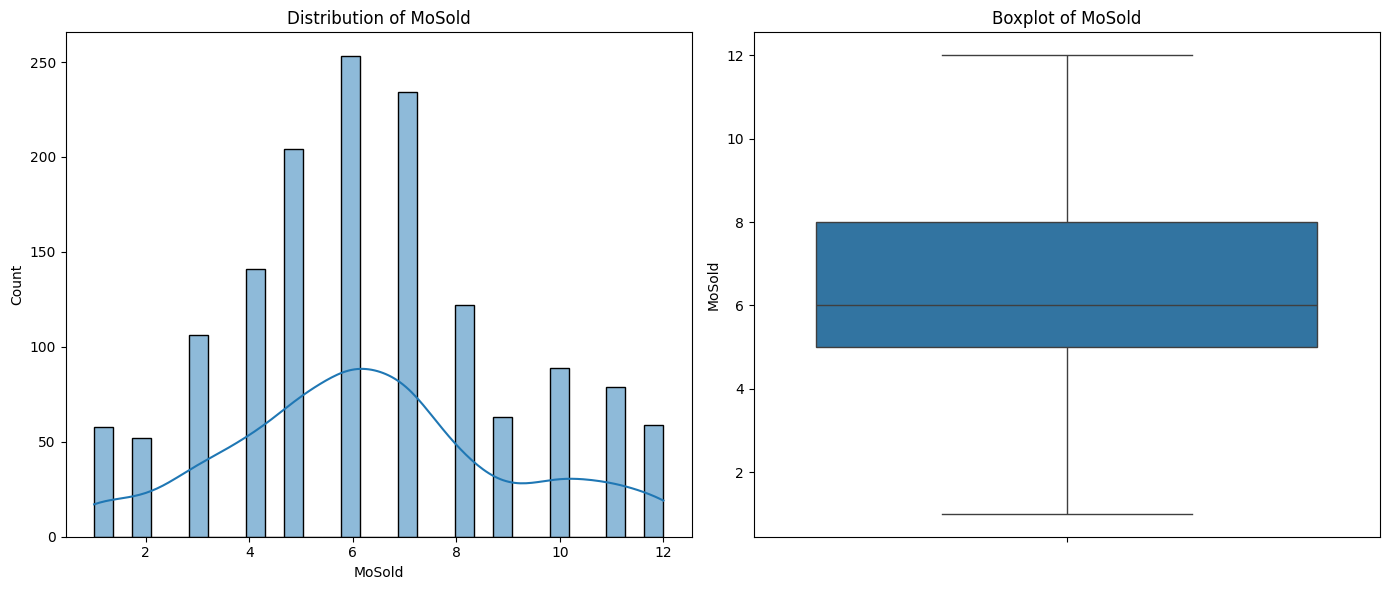

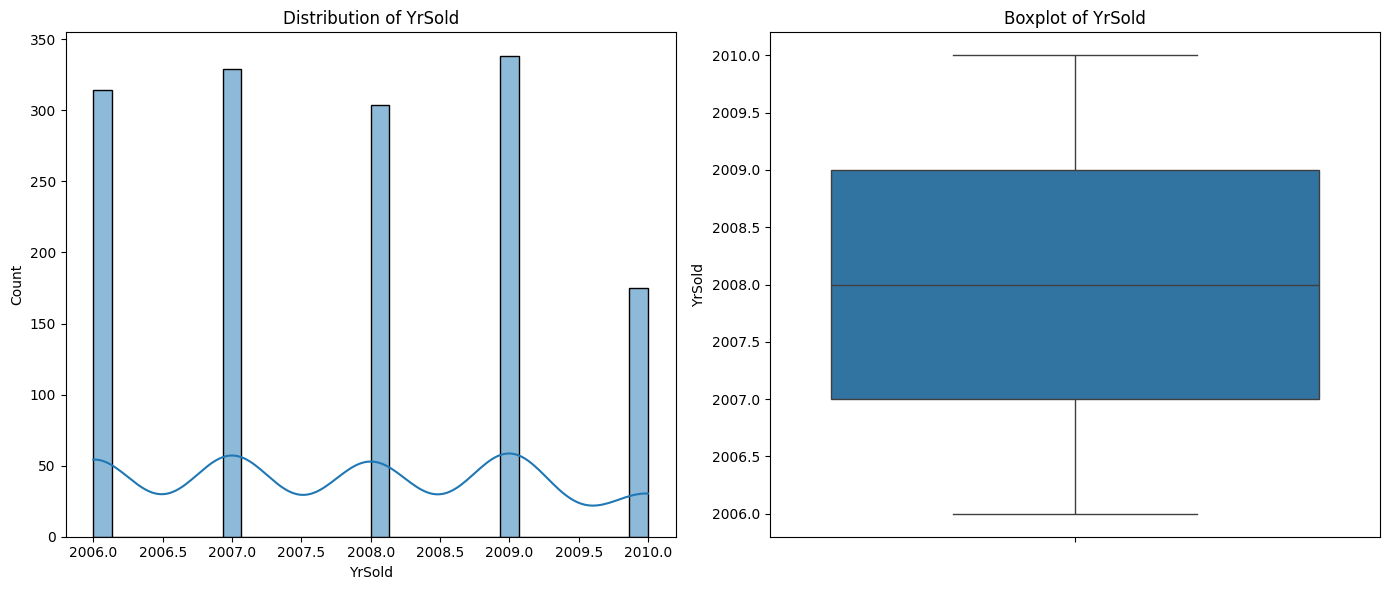

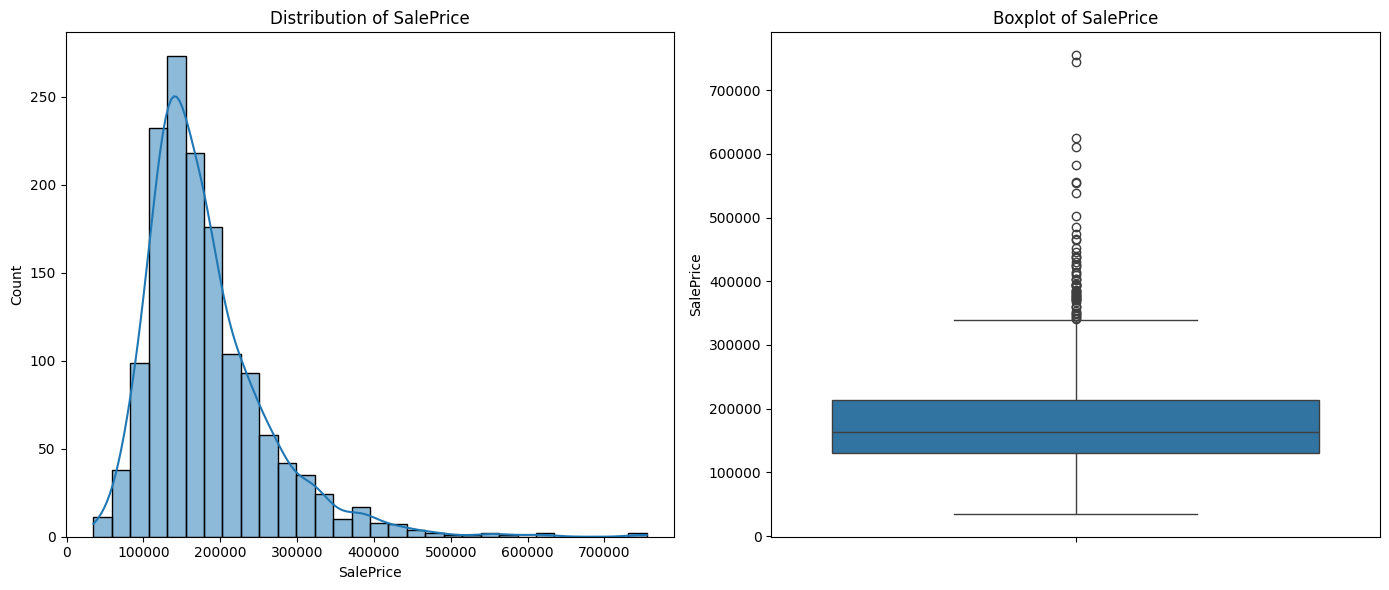

In [116]:
for col in numeric_data.columns:
  plt.figure(figsize=(14,6))
  plt.subplot(1,2,1)
  sns.histplot(numeric_data[col], bins=30, kde=True)
  plt.title(f'Distribution of {col}')

  plt.subplot(1,2,2)
  sns.boxplot(y=numeric_data[col])
  plt.title(f'Boxplot of {col}')

  plt.tight_layout()
  plt.show()


Counts for MSZoning:

MSZoning
RL           1151
RM            218
FV             65
RH             16
'C (all)'      10
Name: count, dtype: int64




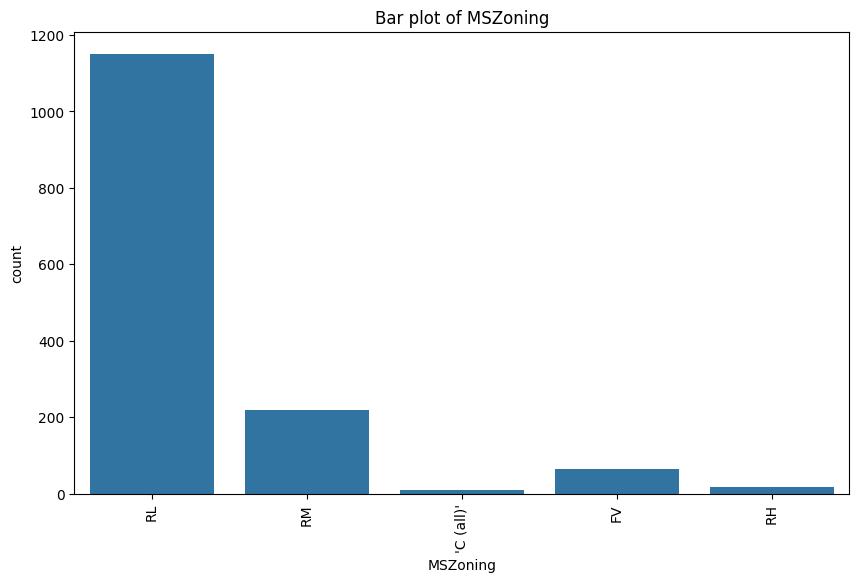


Counts for Street:

Street
Pave    1454
Grvl       6
Name: count, dtype: int64




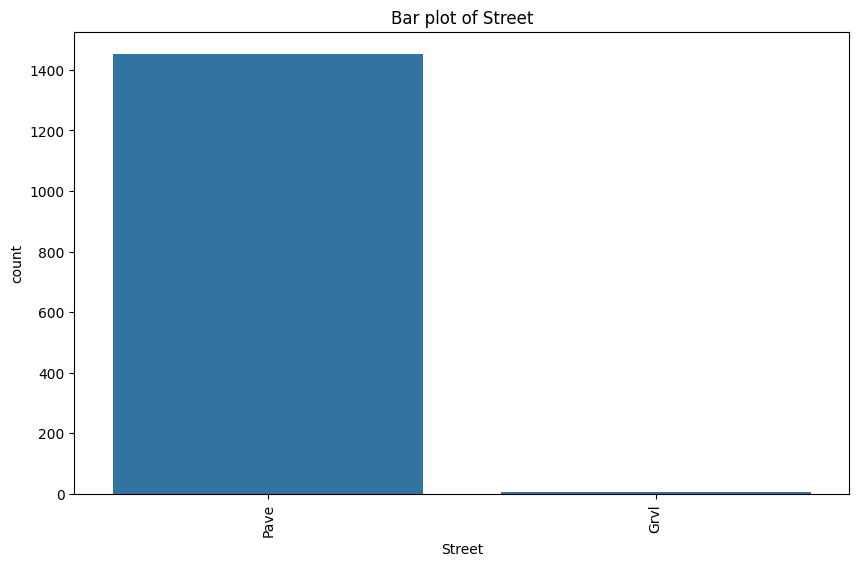


Counts for Alley:

Alley
Grvl    50
Pave    41
Name: count, dtype: int64




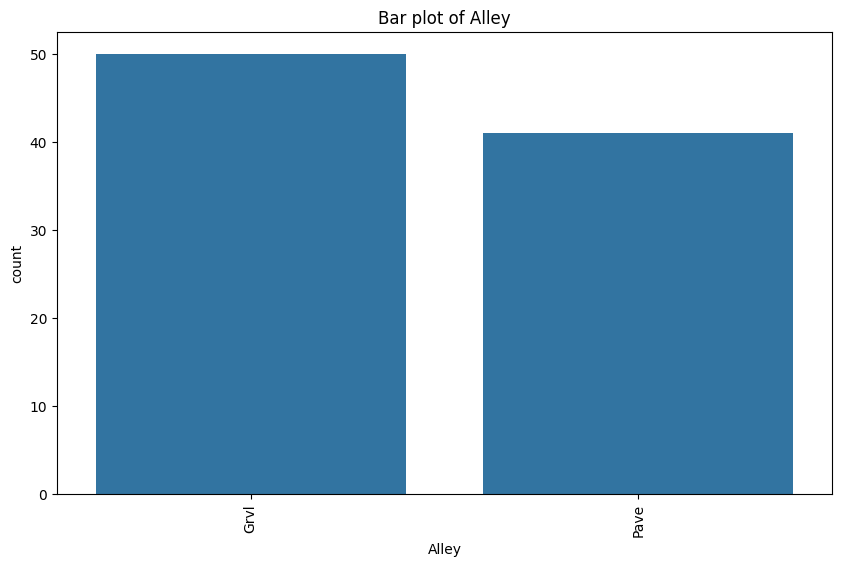


Counts for LotShape:

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64




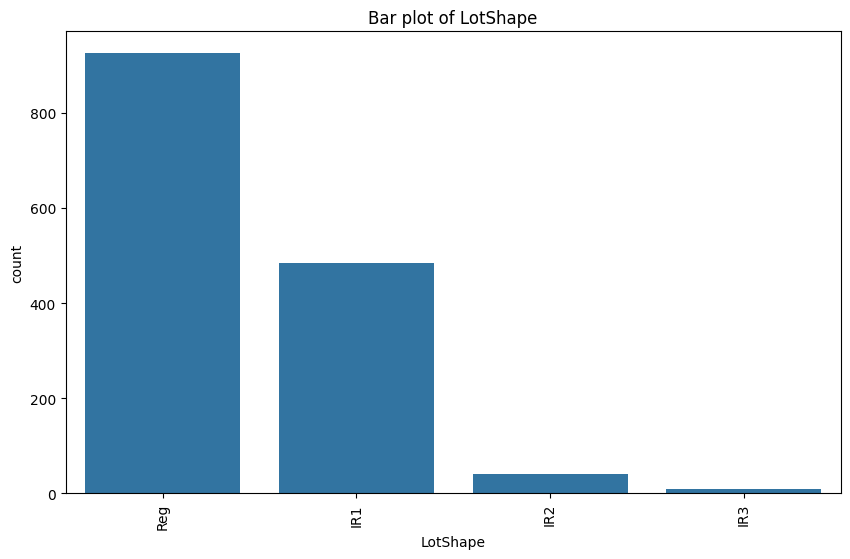


Counts for LandContour:

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64




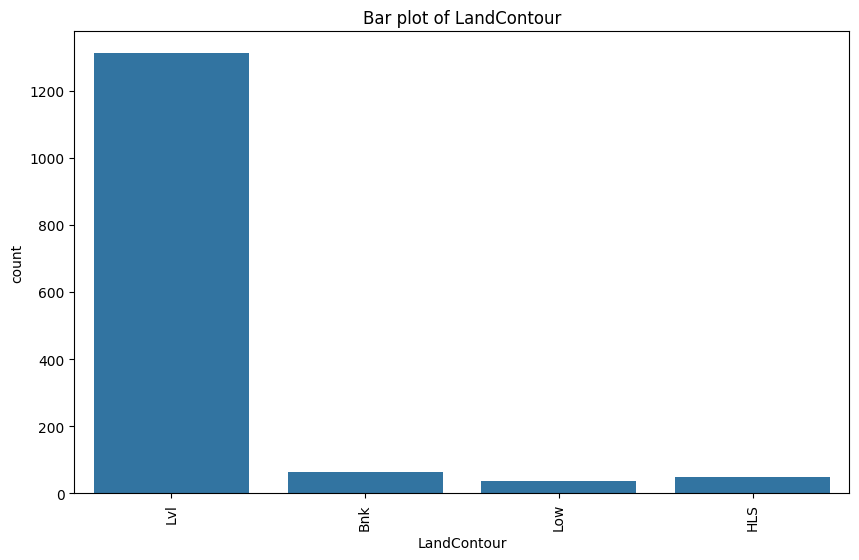


Counts for Utilities:

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64




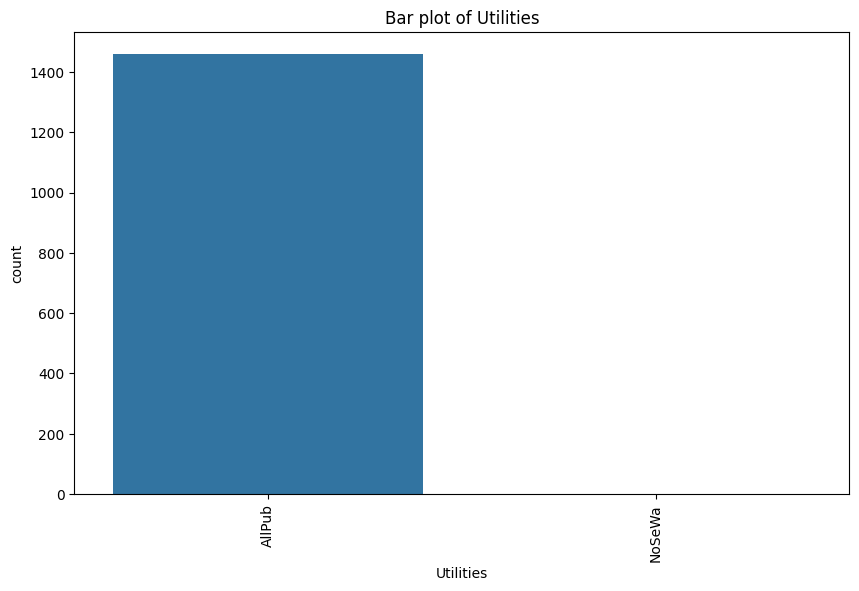


Counts for LotConfig:

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64




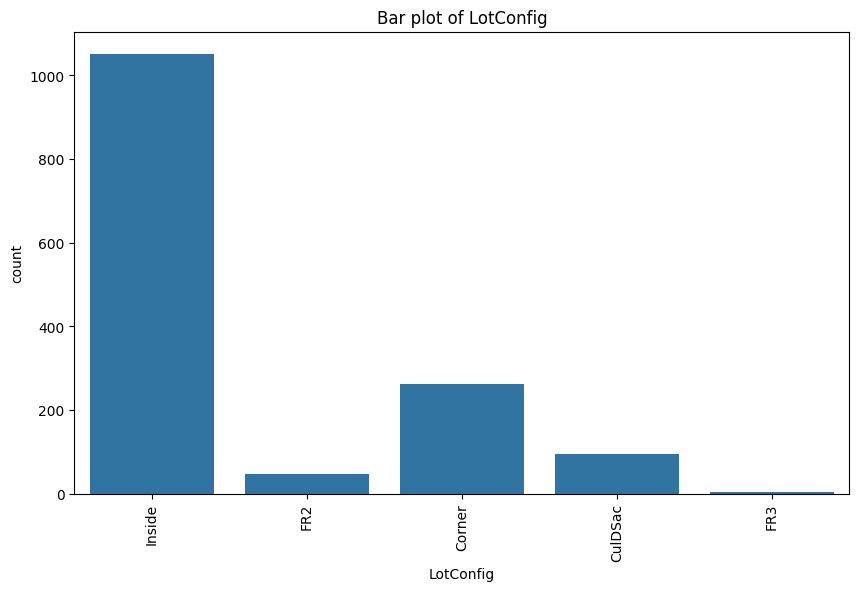


Counts for LandSlope:

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64




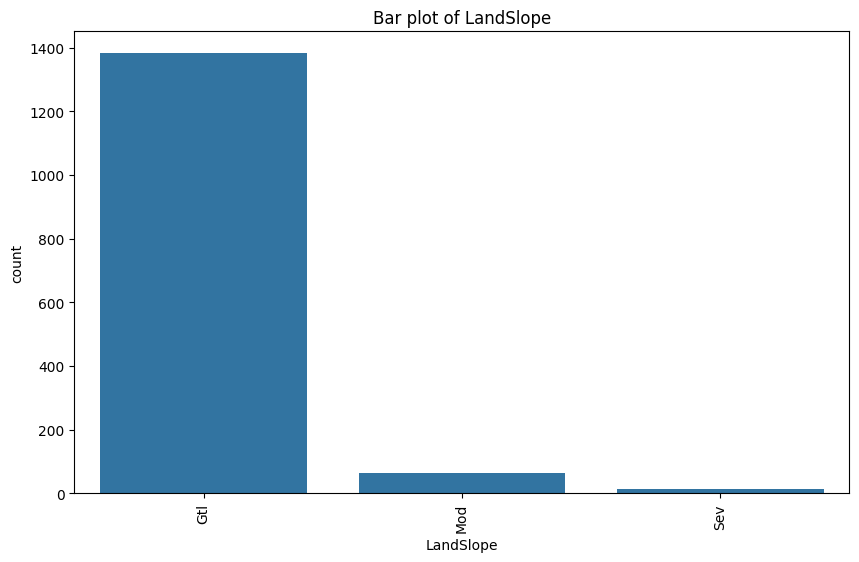


Counts for Neighborhood:

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64




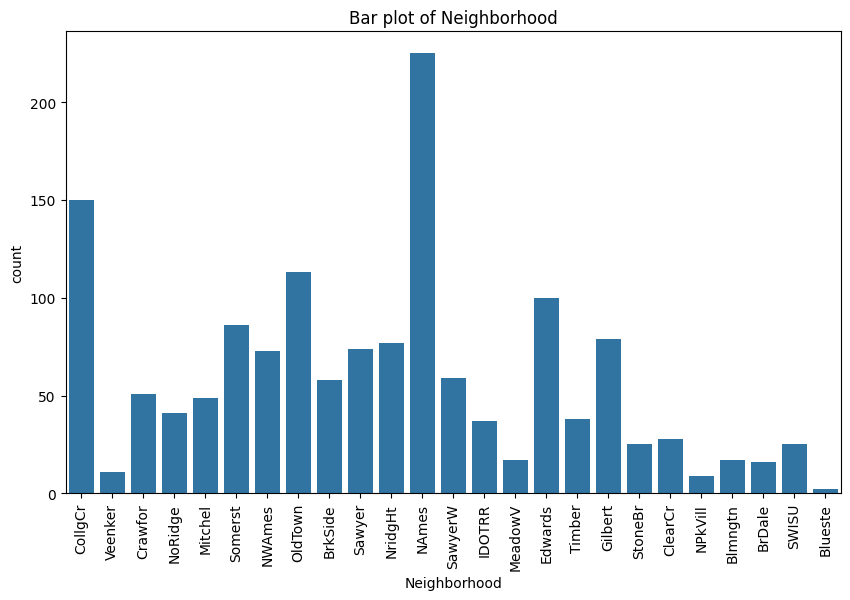


Counts for Condition1:

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64




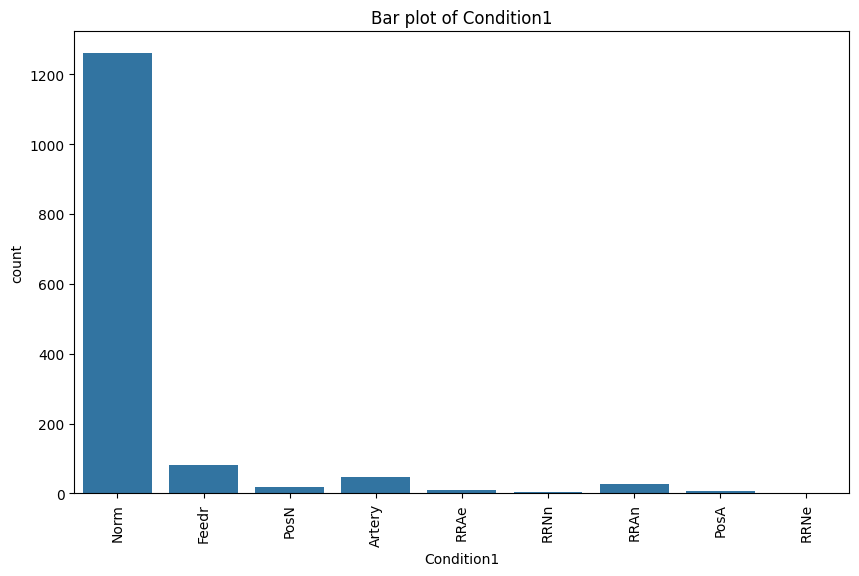


Counts for Condition2:

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64




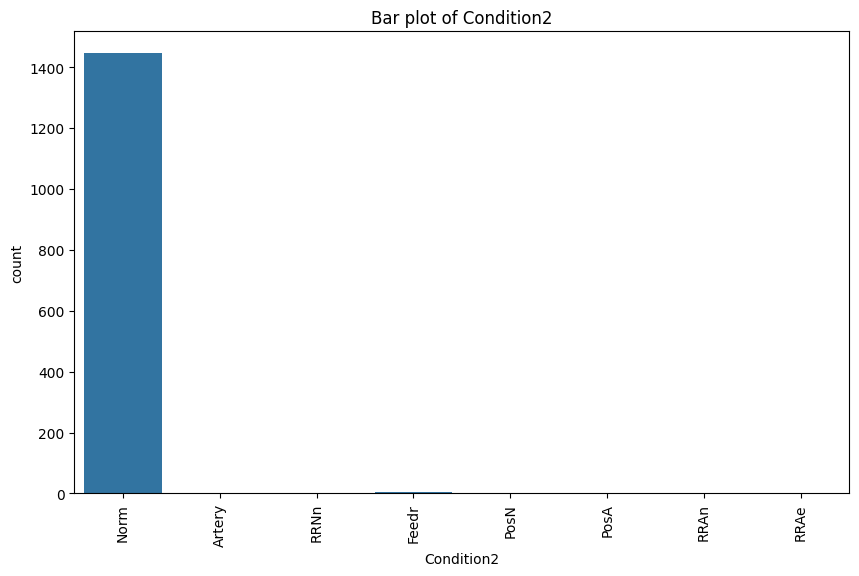


Counts for BldgType:

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64




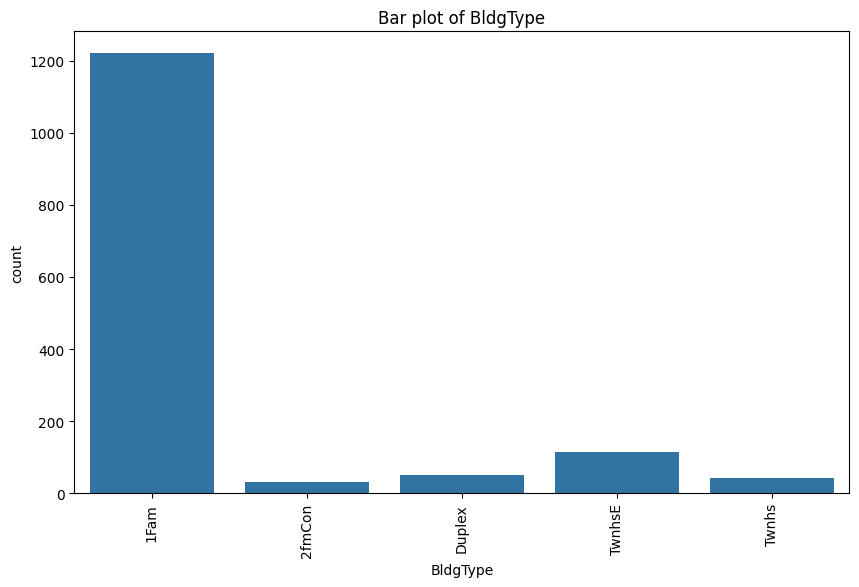


Counts for HouseStyle:

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64




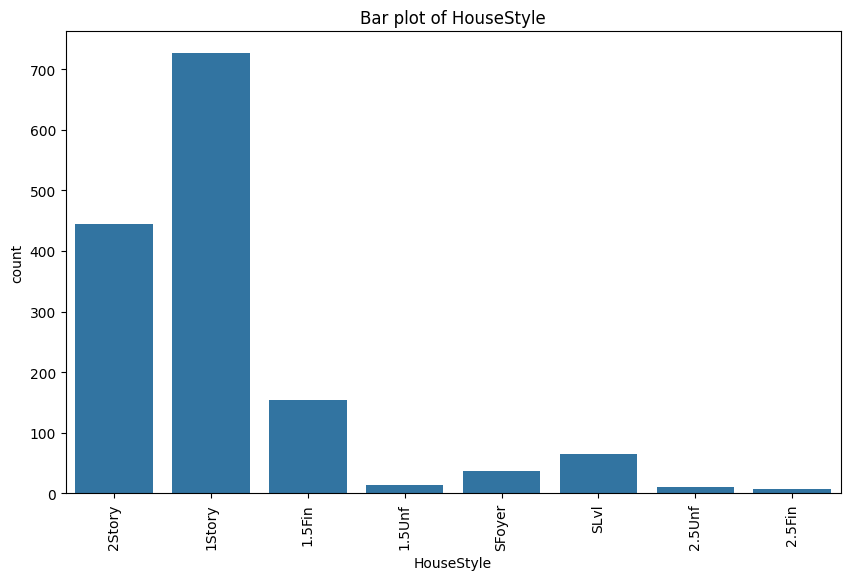


Counts for RoofStyle:

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64




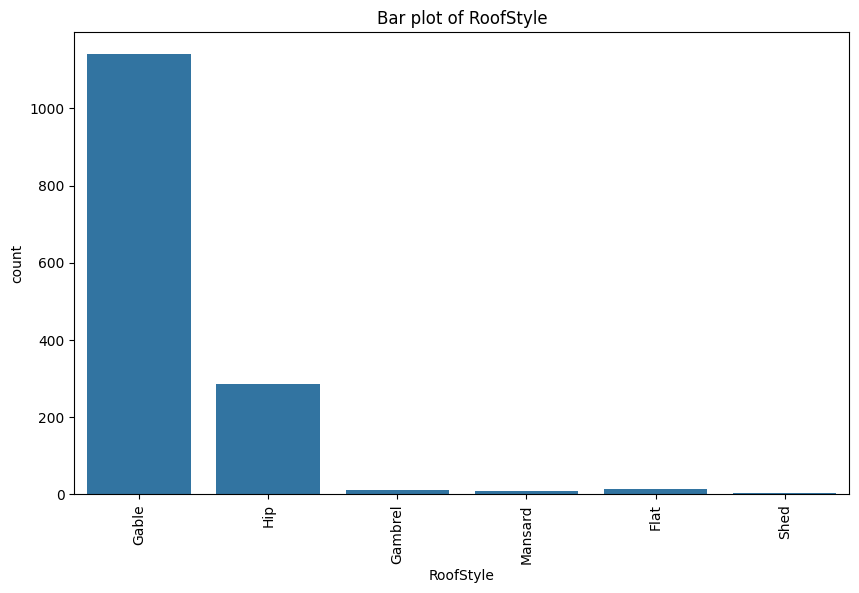


Counts for RoofMatl:

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64




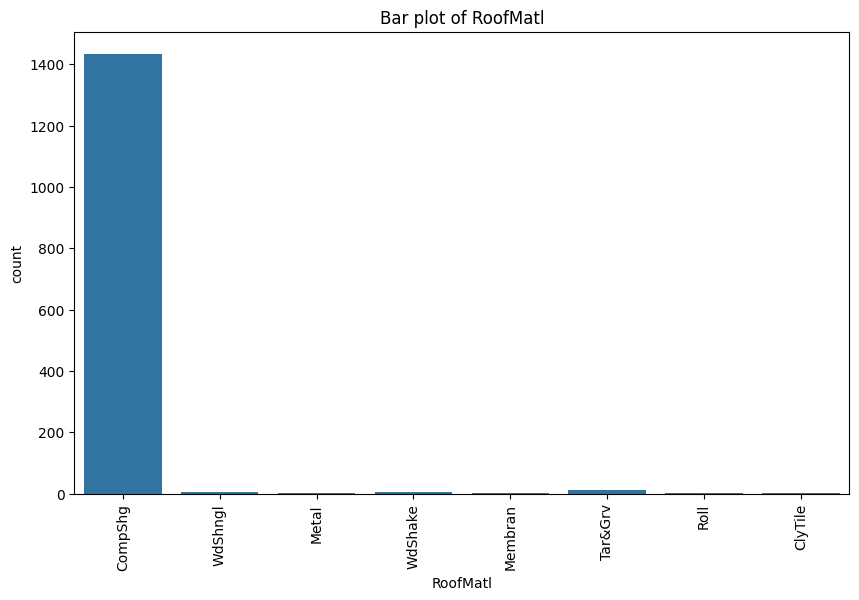


Counts for Exterior1st:

Exterior1st
VinylSd      515
HdBoard      222
MetalSd      220
'Wd Sdng'    206
Plywood      108
CemntBd       61
BrkFace       50
WdShing       26
Stucco        25
AsbShng       20
BrkComm        2
Stone          2
AsphShn        1
ImStucc        1
CBlock         1
Name: count, dtype: int64




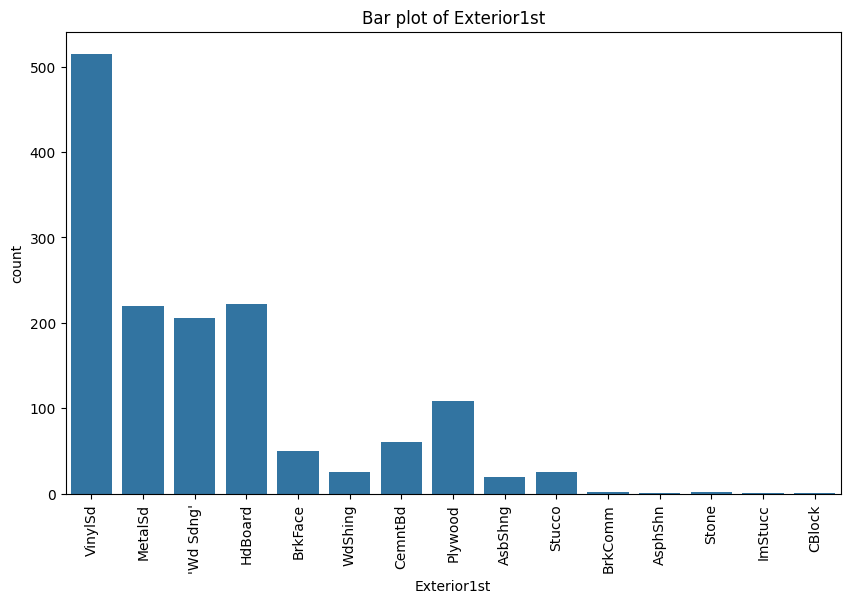


Counts for Exterior2nd:

Exterior2nd
VinylSd      504
MetalSd      214
HdBoard      207
'Wd Sdng'    197
Plywood      142
CmentBd       60
'Wd Shng'     38
Stucco        26
BrkFace       25
AsbShng       20
ImStucc       10
'Brk Cmn'      7
Stone          5
AsphShn        3
Other          1
CBlock         1
Name: count, dtype: int64




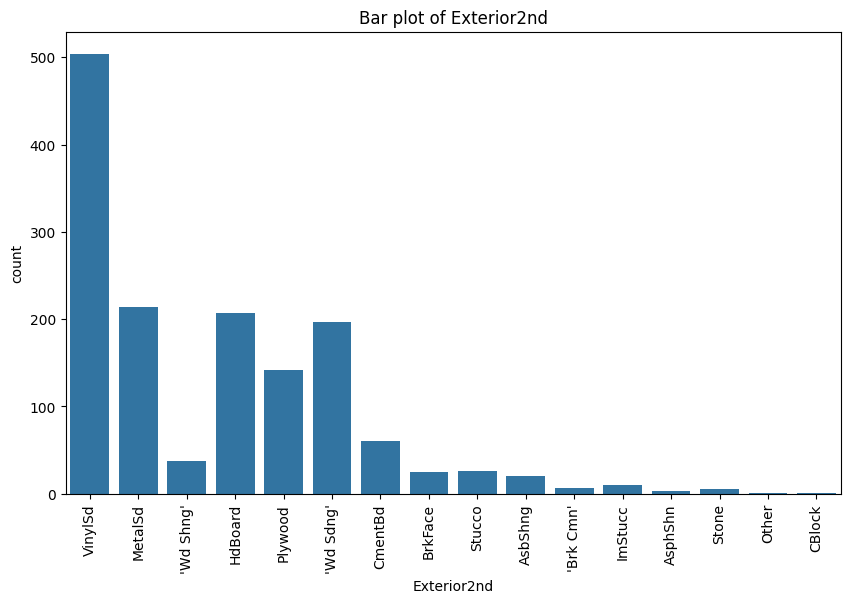


Counts for MasVnrType:

MasVnrType
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64




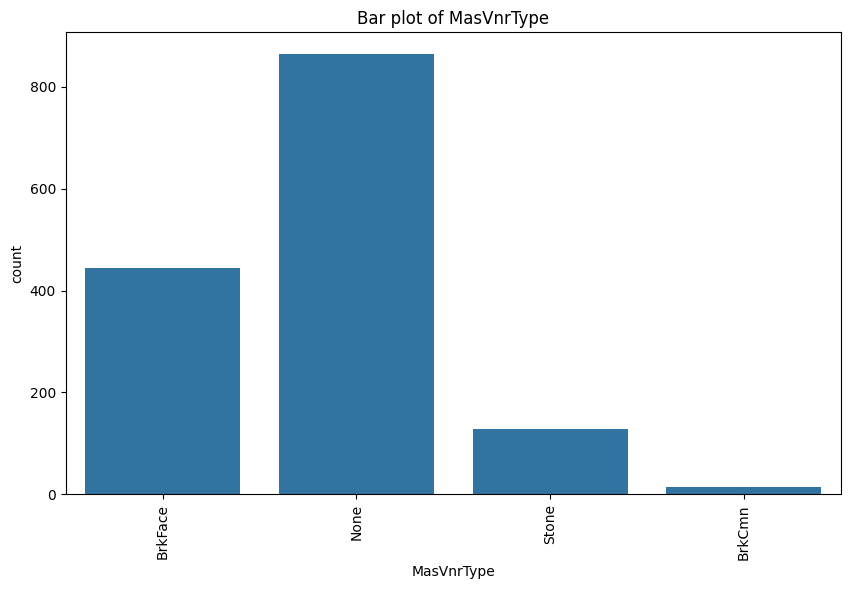


Counts for ExterQual:

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64




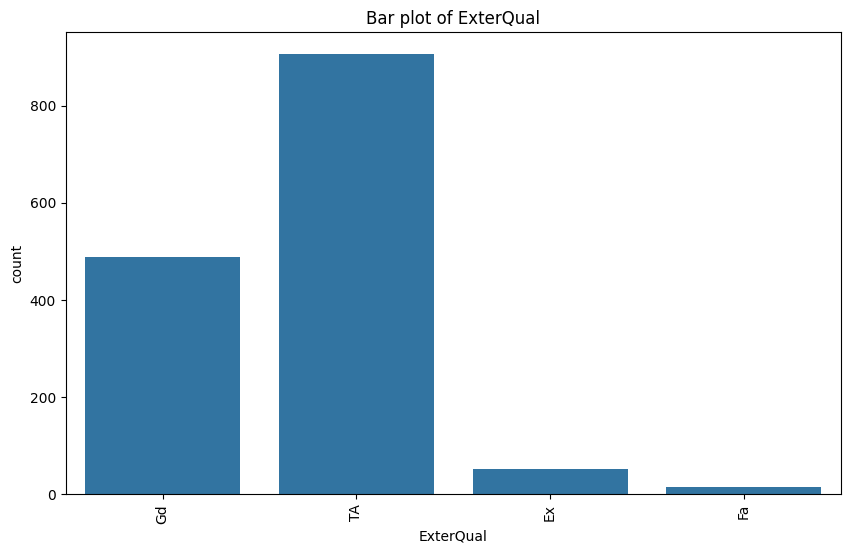


Counts for ExterCond:

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64




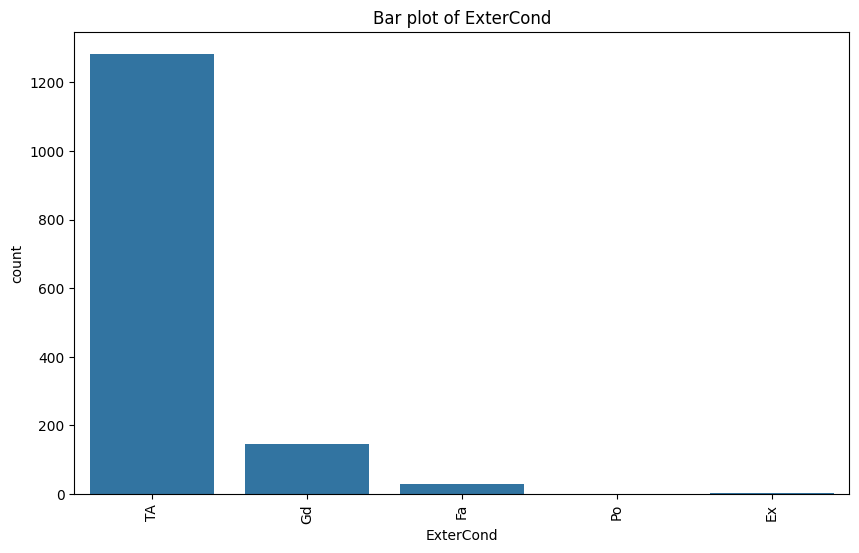


Counts for Foundation:

Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64




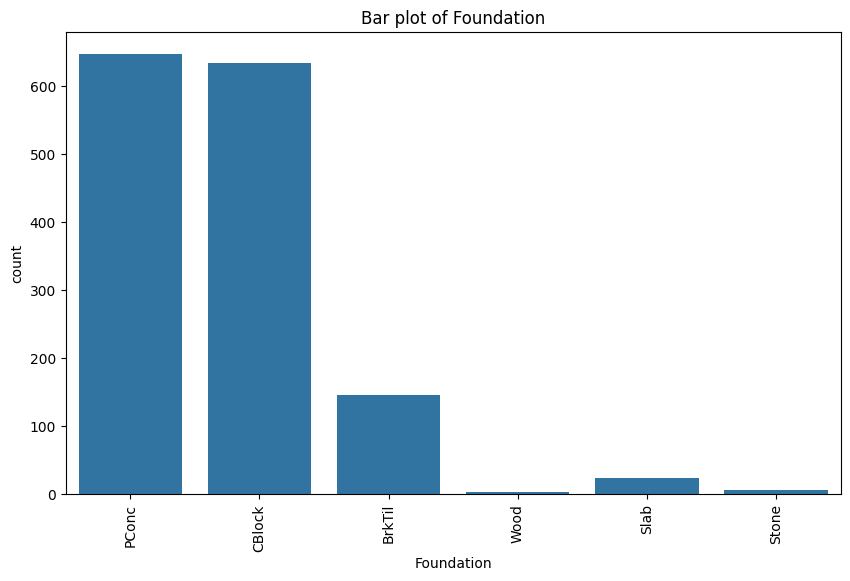


Counts for BsmtQual:

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64




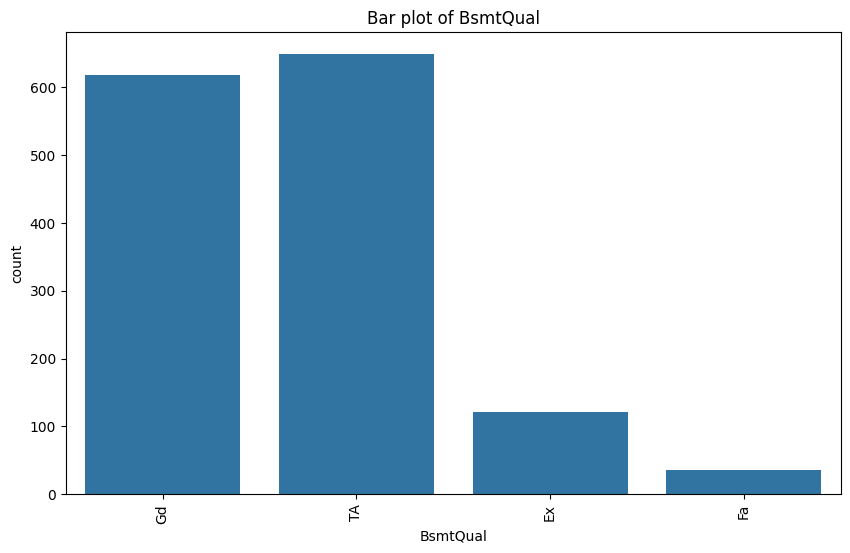


Counts for BsmtCond:

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64




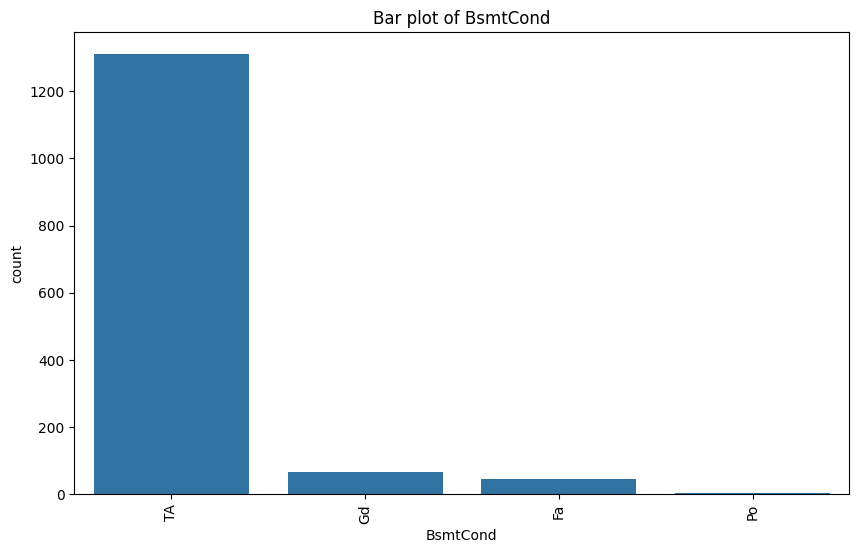


Counts for BsmtExposure:

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64




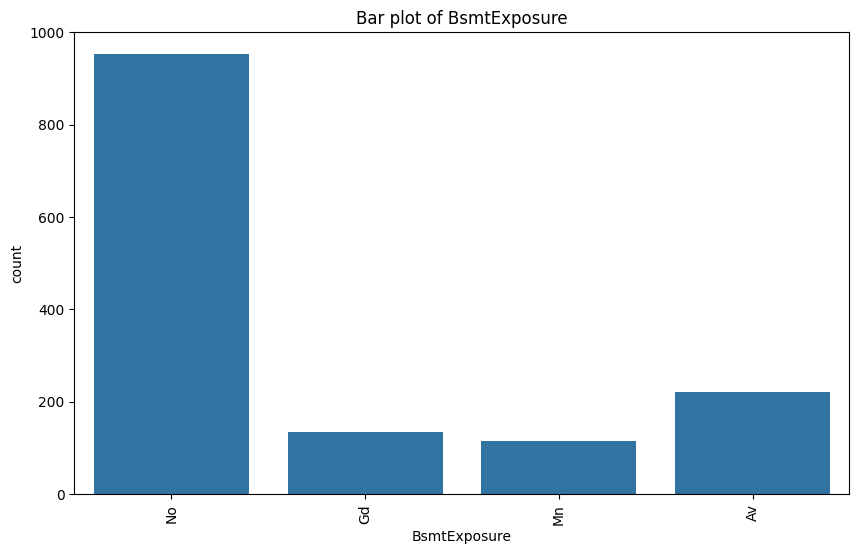


Counts for BsmtFinType1:

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64




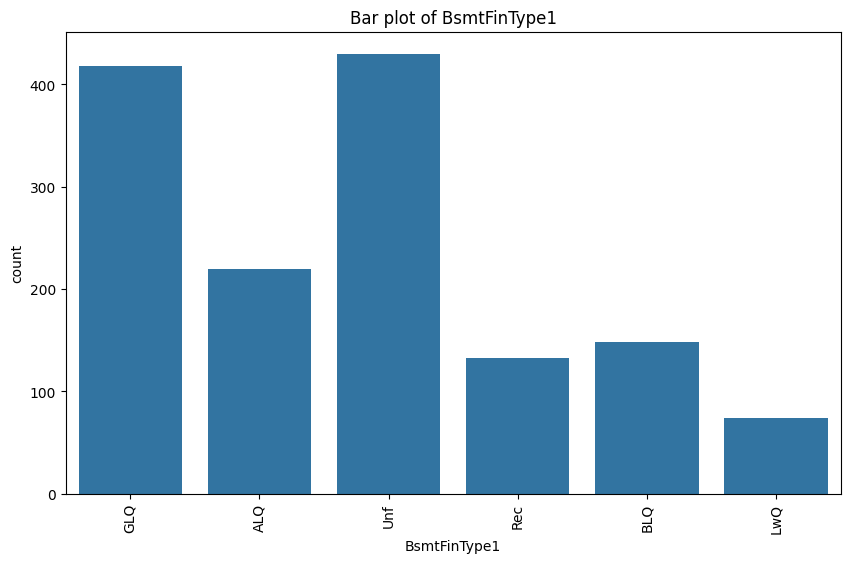


Counts for BsmtFinType2:

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64




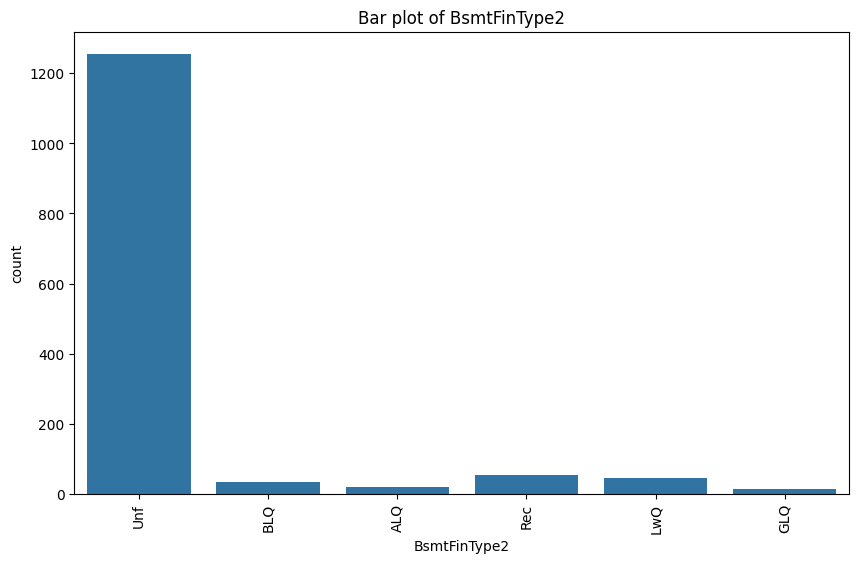


Counts for Heating:

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64




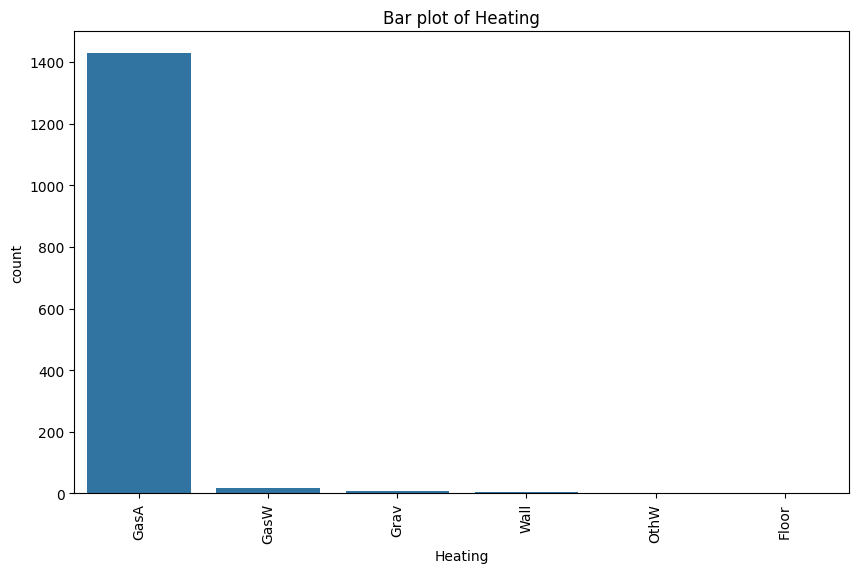


Counts for HeatingQC:

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64




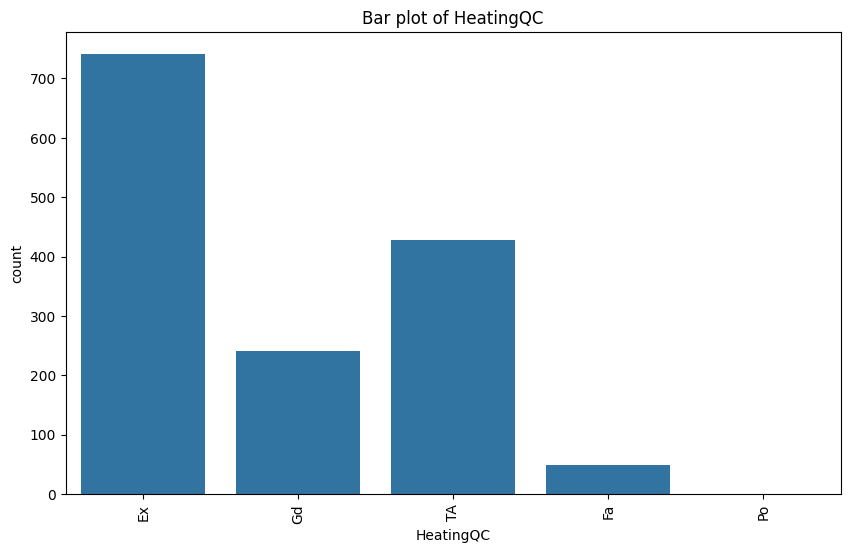


Counts for CentralAir:

CentralAir
Y    1365
N      95
Name: count, dtype: int64




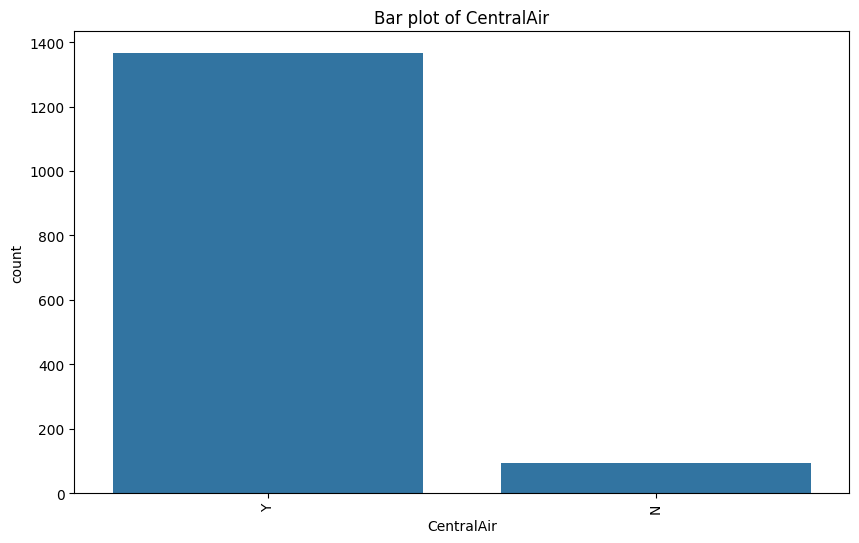


Counts for Electrical:

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64




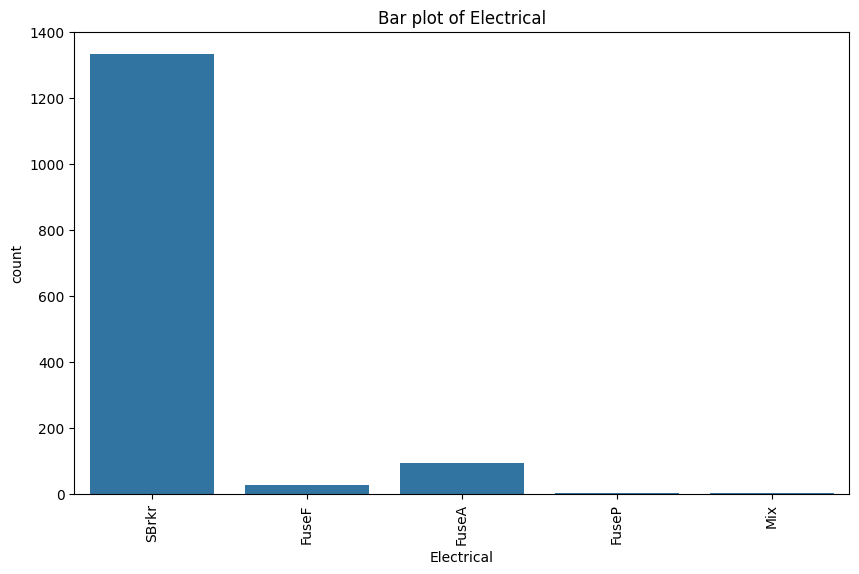


Counts for KitchenQual:

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64




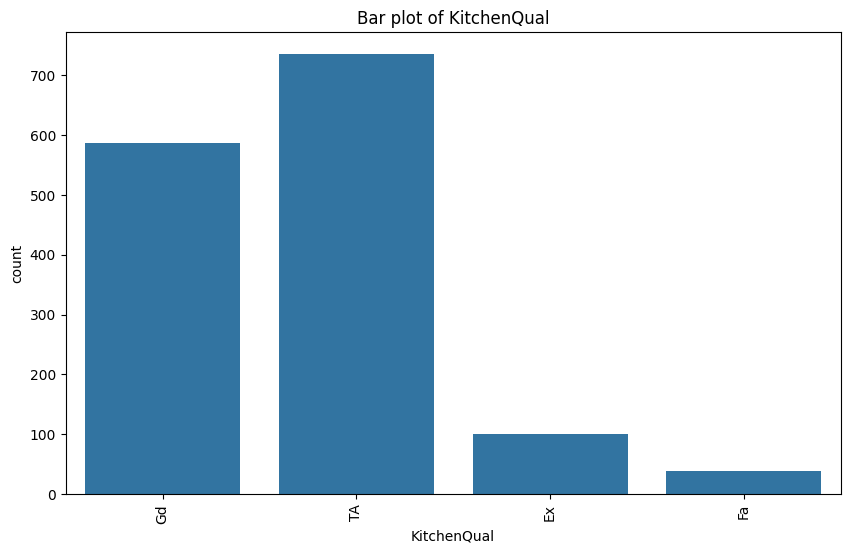


Counts for Functional:

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64




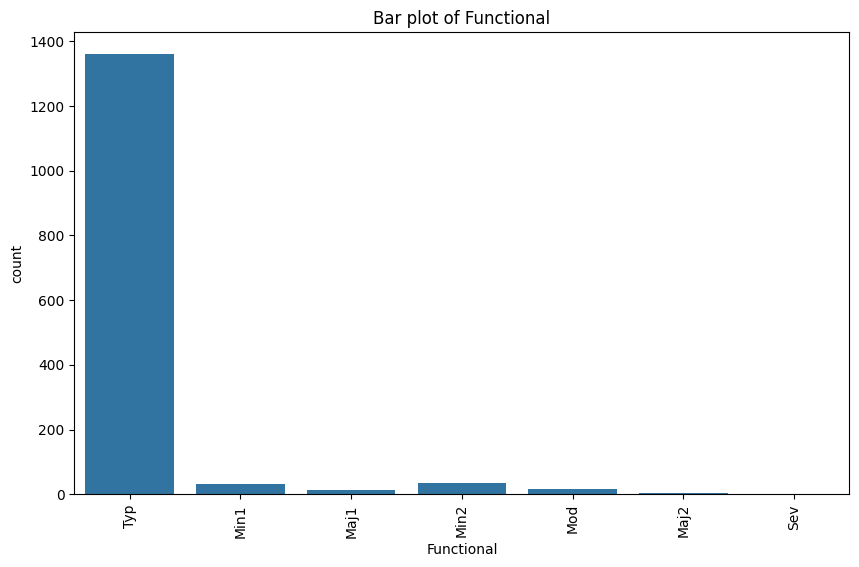


Counts for FireplaceQu:

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64




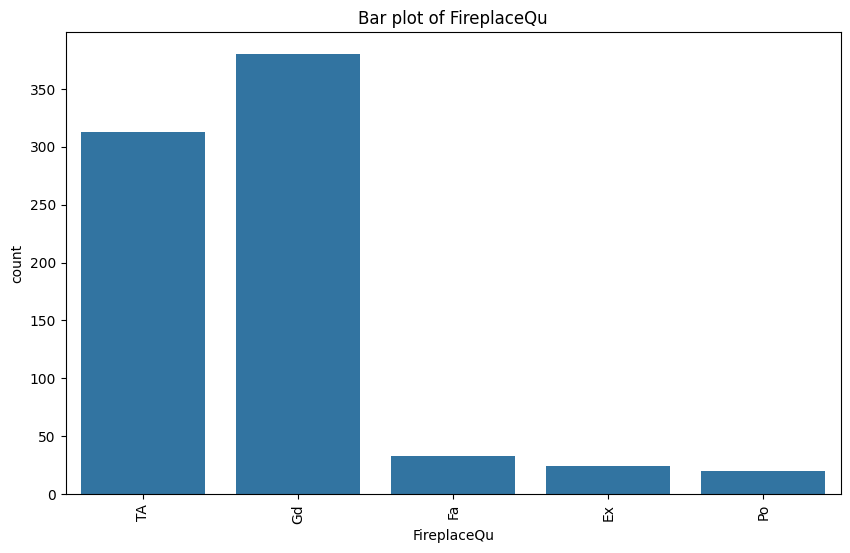


Counts for GarageType:

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64




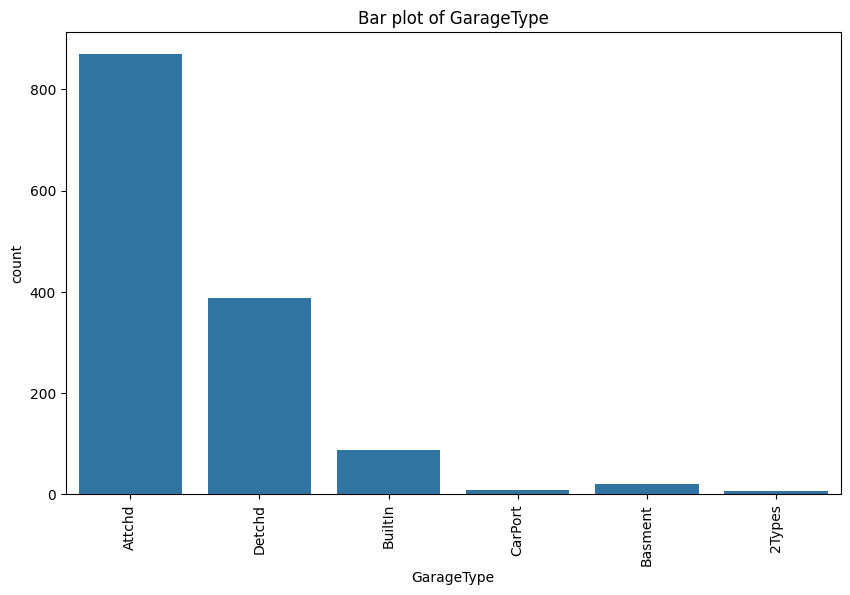


Counts for GarageFinish:

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64




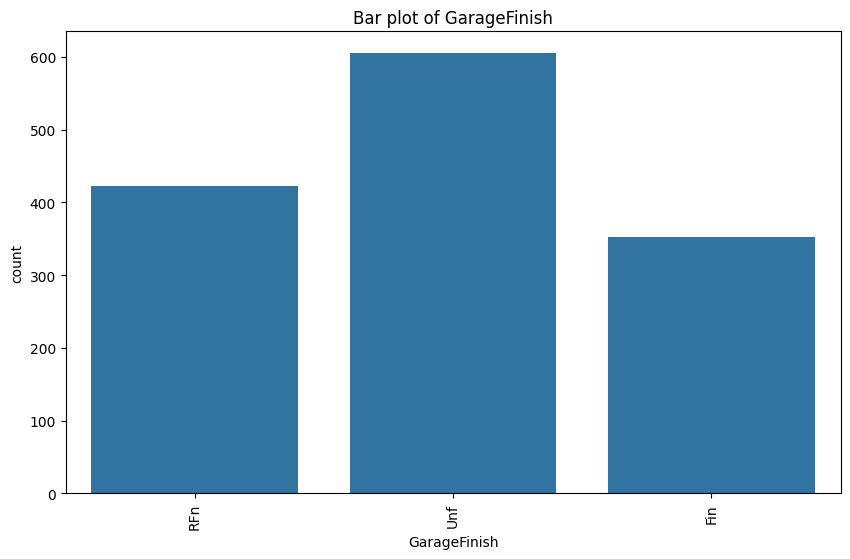


Counts for GarageQual:

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64




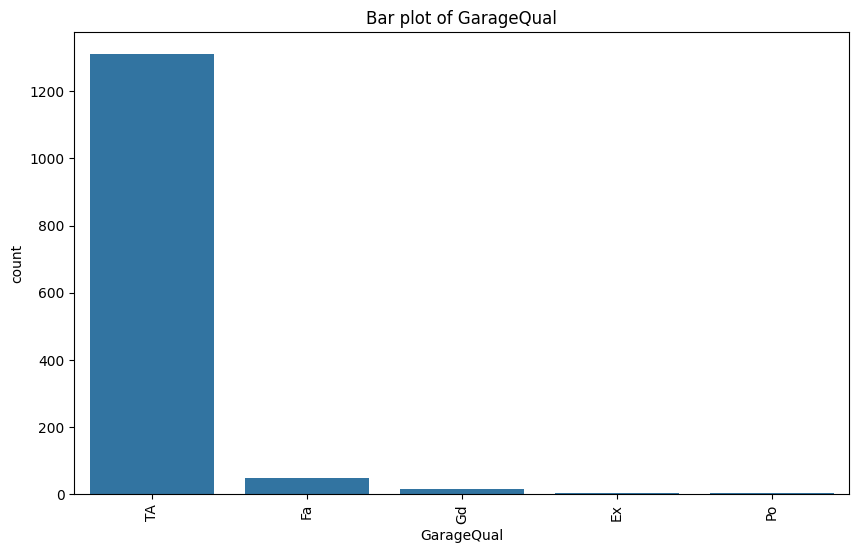


Counts for GarageCond:

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64




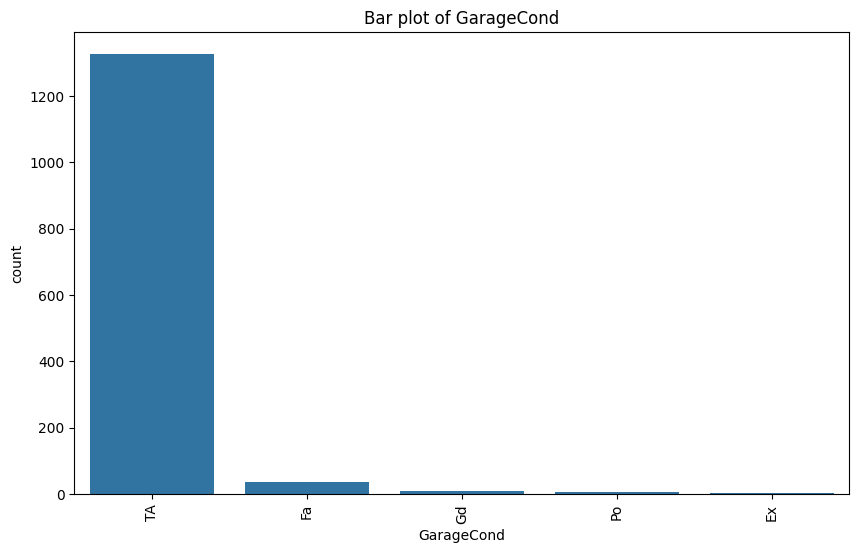


Counts for PavedDrive:

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64




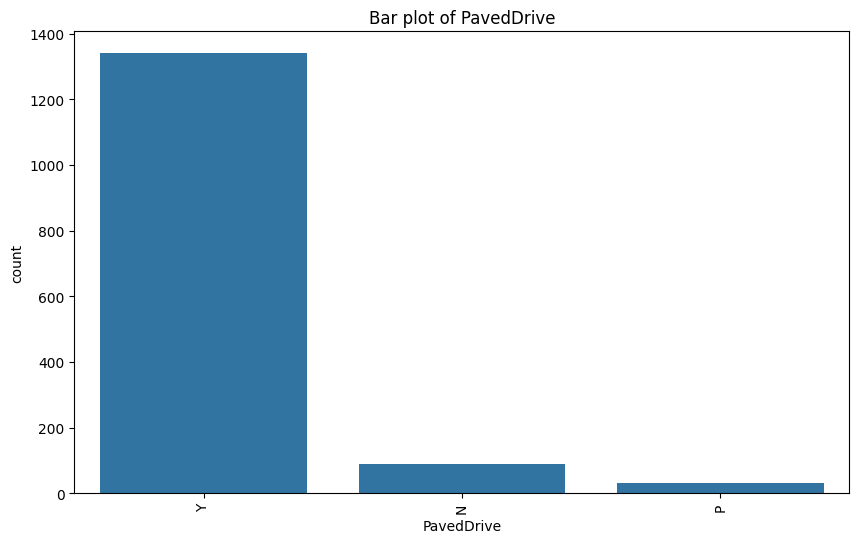


Counts for PoolQC:

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64




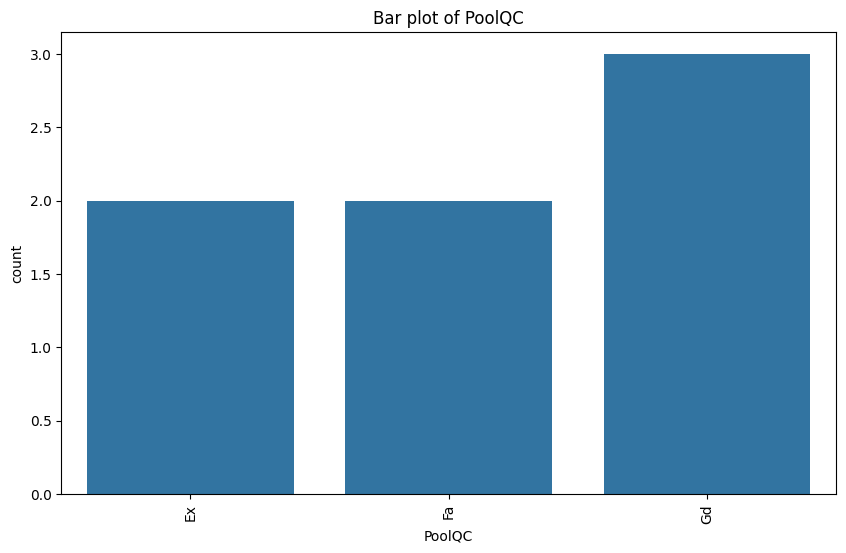


Counts for Fence:

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64




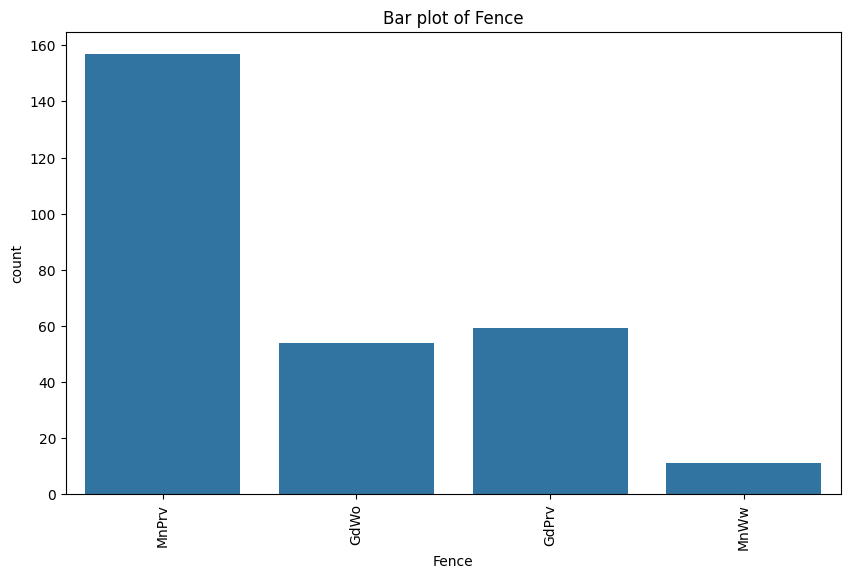


Counts for MiscFeature:

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64




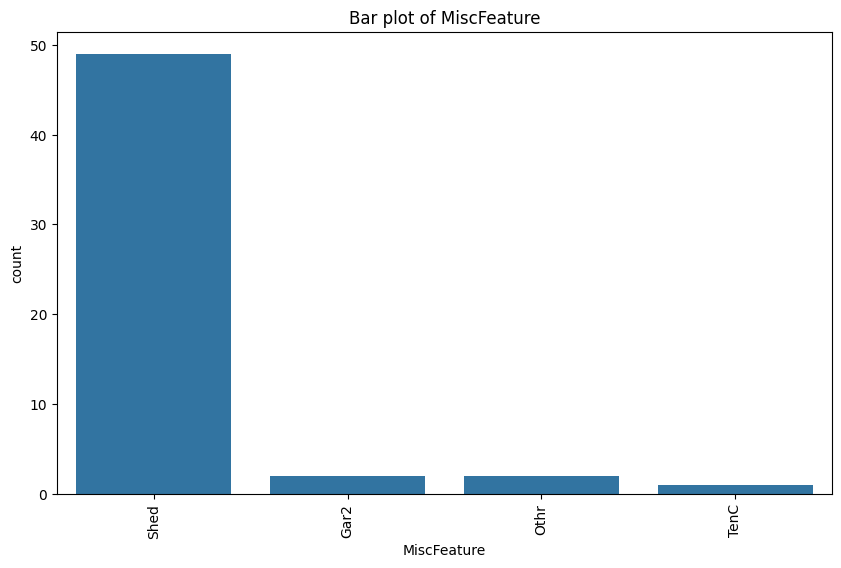


Counts for SaleType:

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64




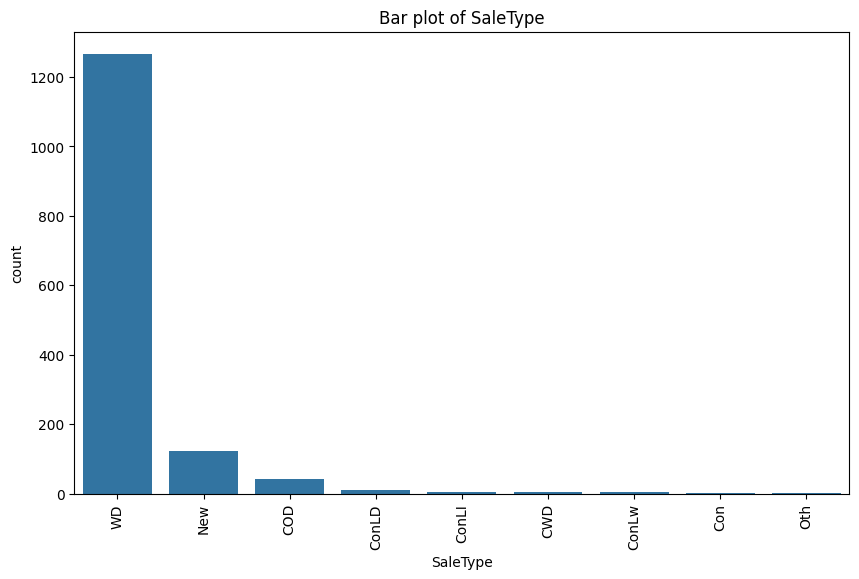


Counts for SaleCondition:

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64




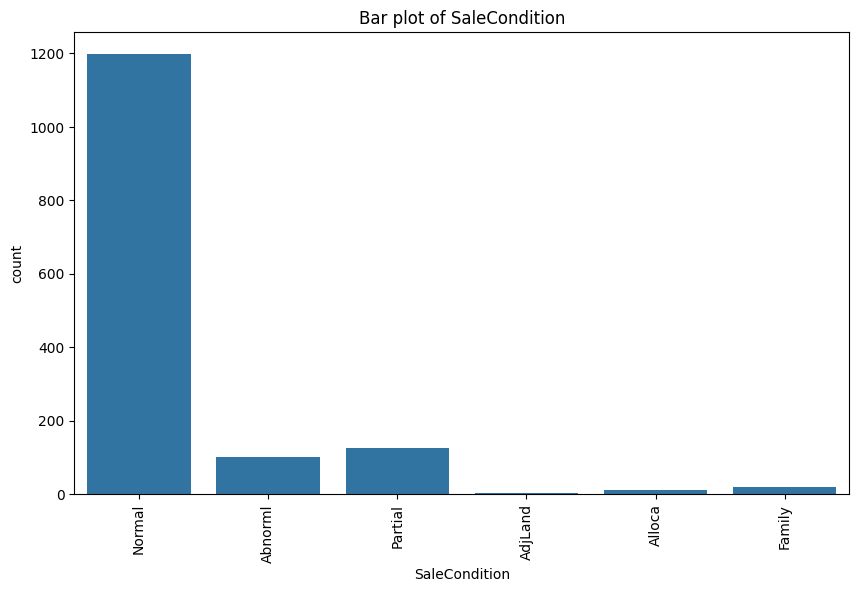

In [117]:
# This counts for each categorical variable and creates a bar plot for each categorica variable

for col in categorical_data.columns:
  print(f"\nCounts for {col}:\n")
  print(categorical_data[col].value_counts())
  print("\n")

  #Bar plot
  plt.figure(figsize=(10,6))
  sns.countplot(x=categorical_data[col])
  plt.title(f'Bar plot of {col}')
  plt.xticks(rotation=90)
  plt.show()


In [118]:
# Identifying outliers
for col in numeric_data.columns:
  q1 = numeric_data[col].quantile(0.25)
  q3 = numeric_data[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = numeric_data[col].loc[(numeric_data[col] < lower_bound) | (numeric_data[col] > upper_bound)]
  print(f"Outliers in {col}:")
  print(outliers)
  print("\n")

Outliers in Id:
Series([], Name: Id, dtype: int64)


Outliers in MSSubClass:
9       190
48      190
56      160
75      180
87      160
       ... 
1378    160
1393    190
1416    190
1449    180
1452    180
Name: MSSubClass, Length: 103, dtype: int64


Outliers in LotFrontage:
36      112.0
41      115.0
56       24.0
75       21.0
85      121.0
        ...  
1339    120.0
1359    129.0
1361    124.0
1378     21.0
1449     21.0
Name: LotFrontage, Length: 88, dtype: float64


Outliers in LotArea:
53      50271
66      19900
113     21000
120     21453
159     19378
        ...  
1396    57200
1409    20544
1423    19690
1430    21930
1446    26142
Name: LotArea, Length: 69, dtype: int64


Outliers in OverallQual:
375    1
533    1
Name: OverallQual, dtype: int64


Outliers in OverallCond:
1       8
15      8
24      8
88      2
91      3
       ..
1385    8
1397    8
1411    8
1435    9
1457    9
Name: OverallCond, Length: 125, dtype: int64


Outliers in YearBuilt:
304     1880
630   

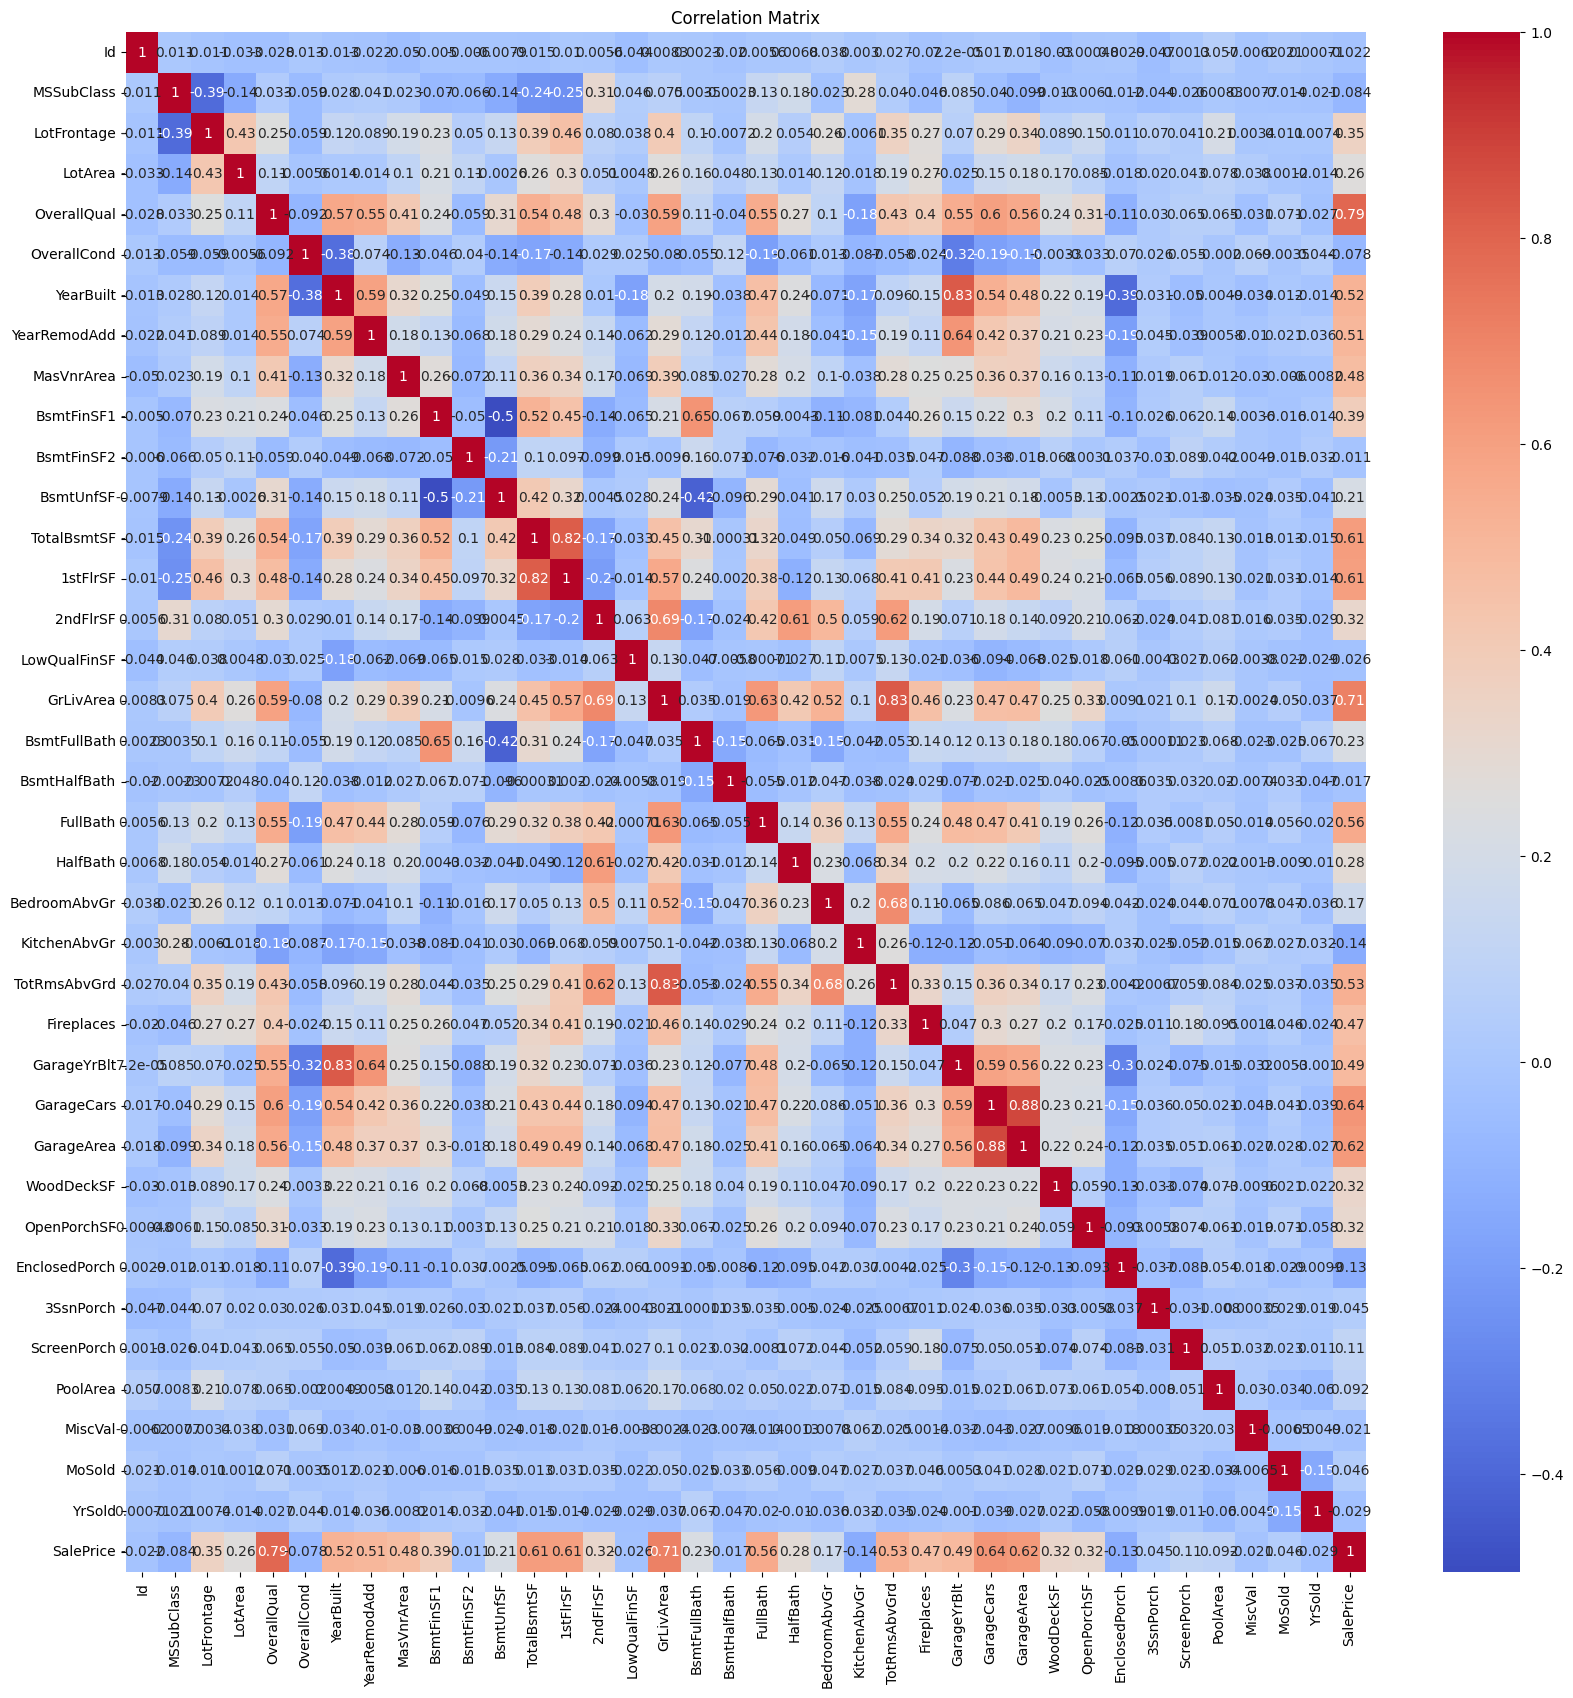

In [122]:
# Correlation matrix and plots it as heatmap

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()


Breaking numeric columns into 7 chunks of size ~6.

Plotting scatter matrix for columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']


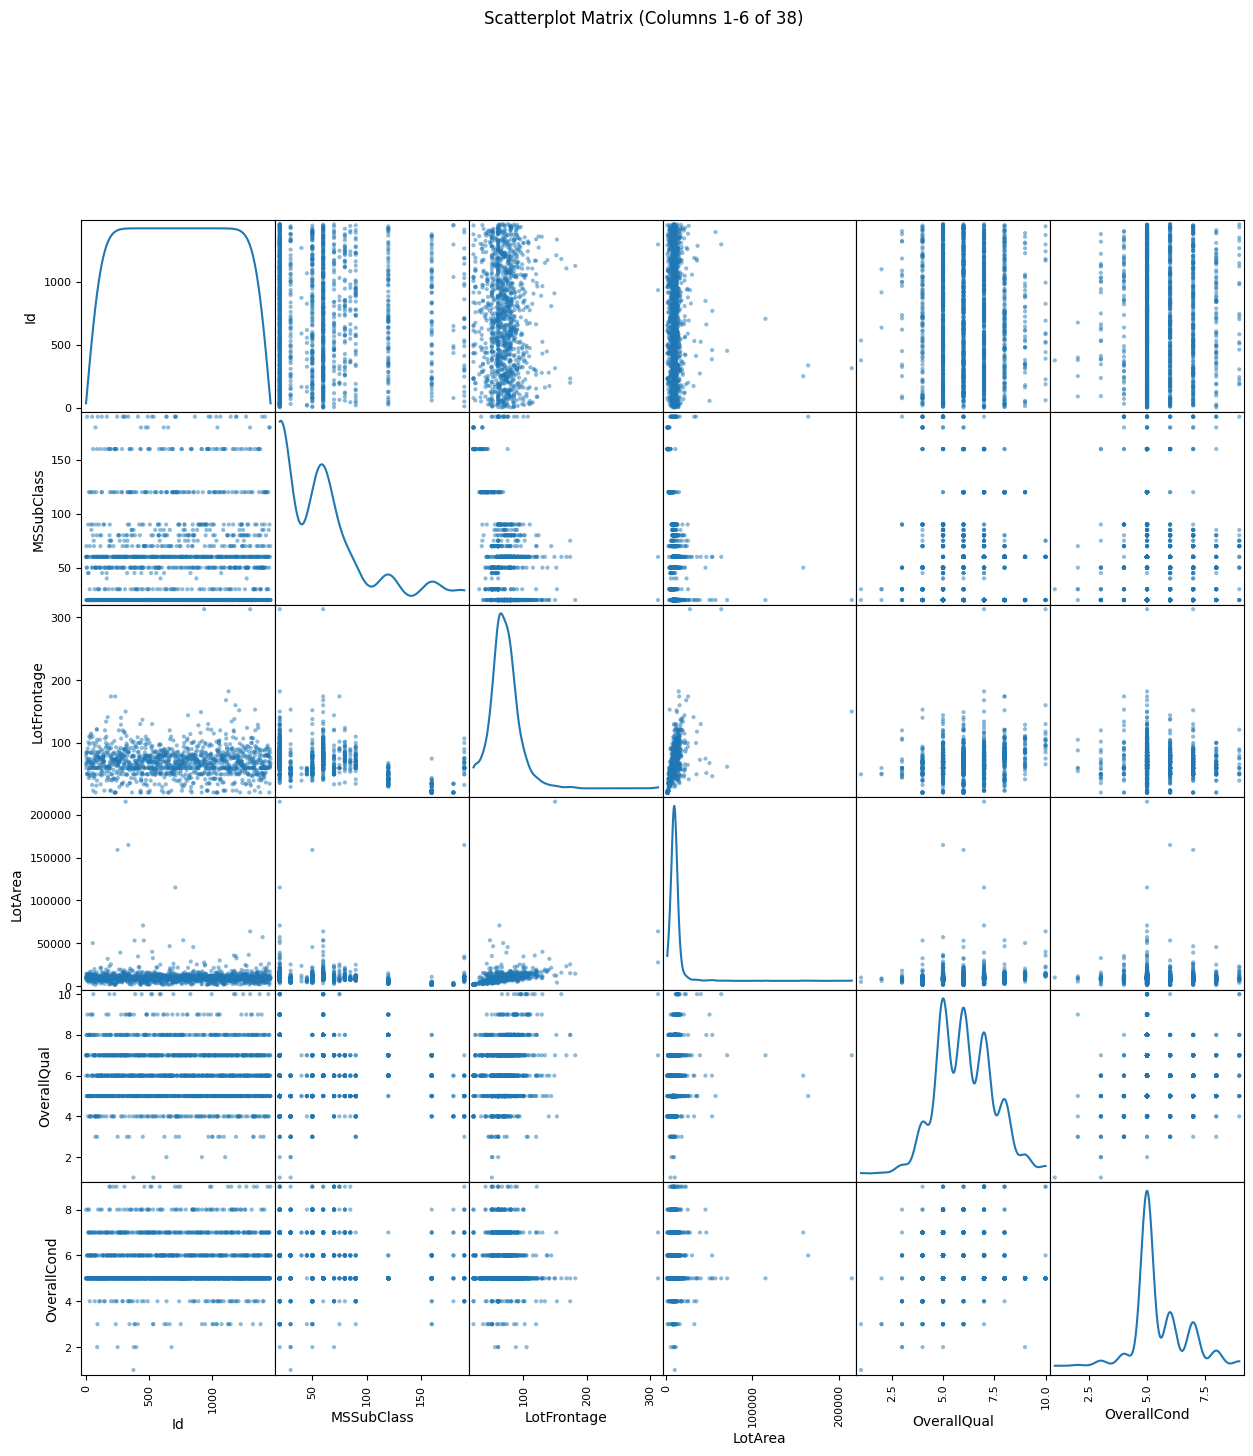


Plotting scatter matrix for columns: ['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']


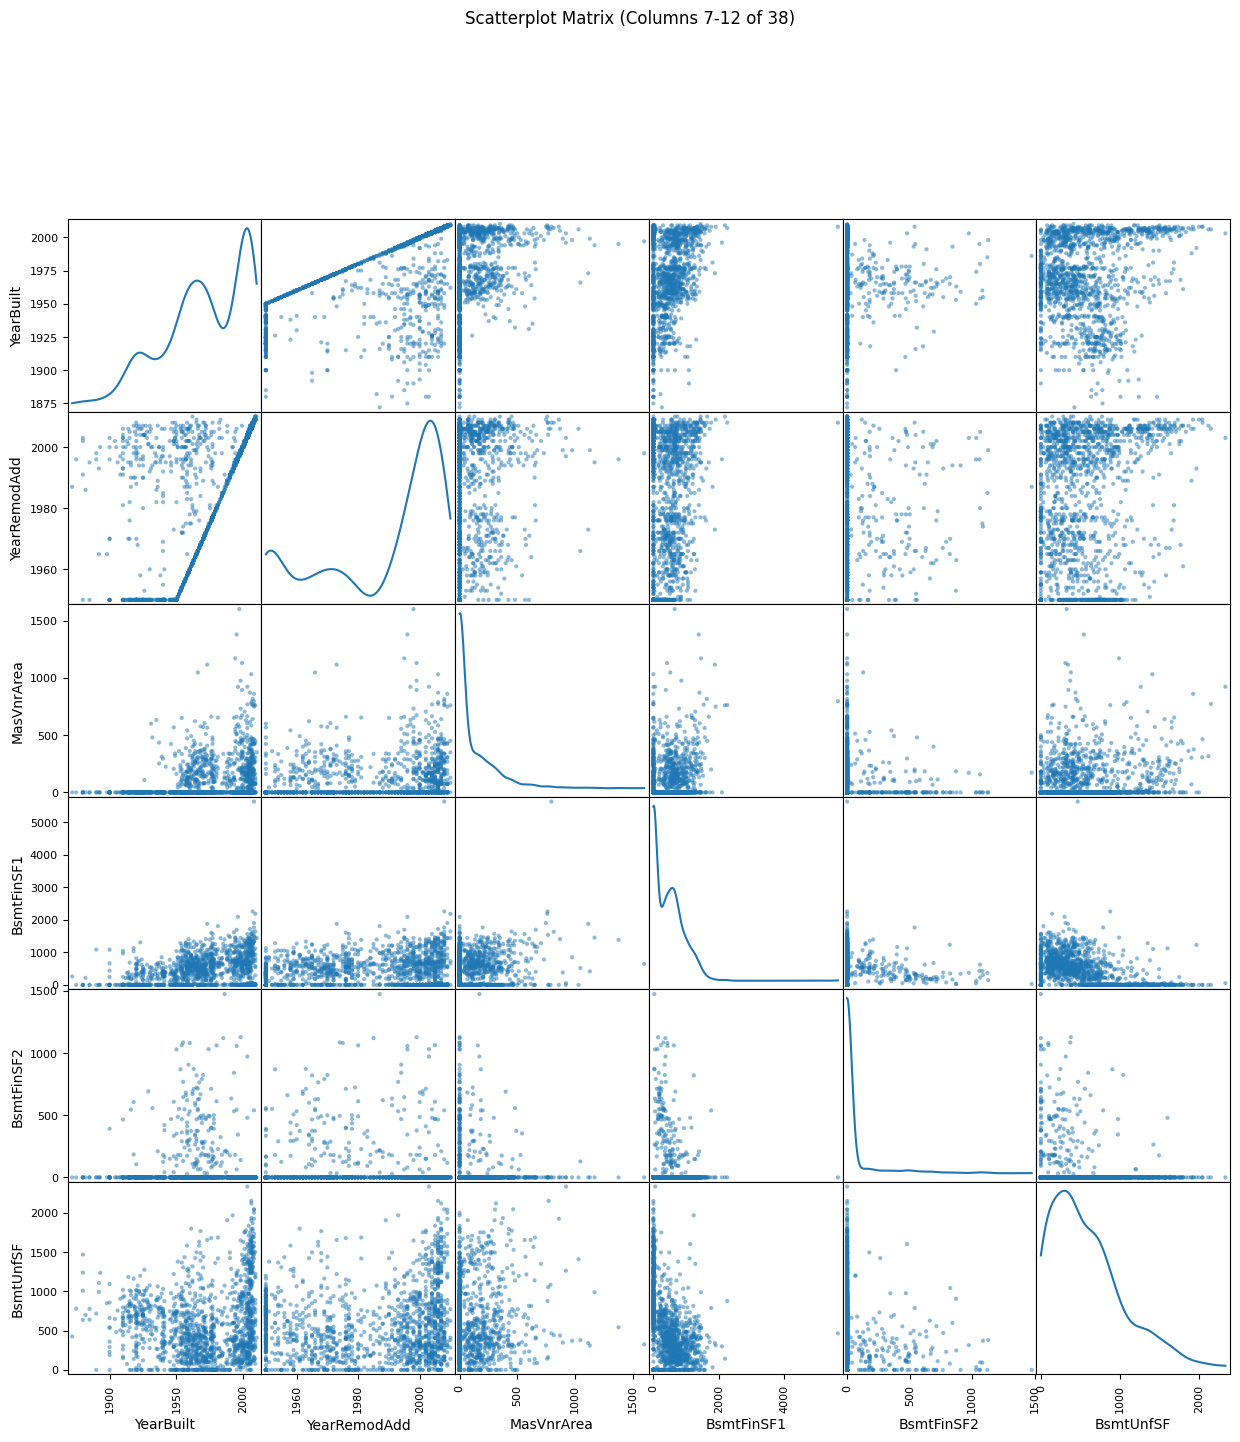


Plotting scatter matrix for columns: ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath']


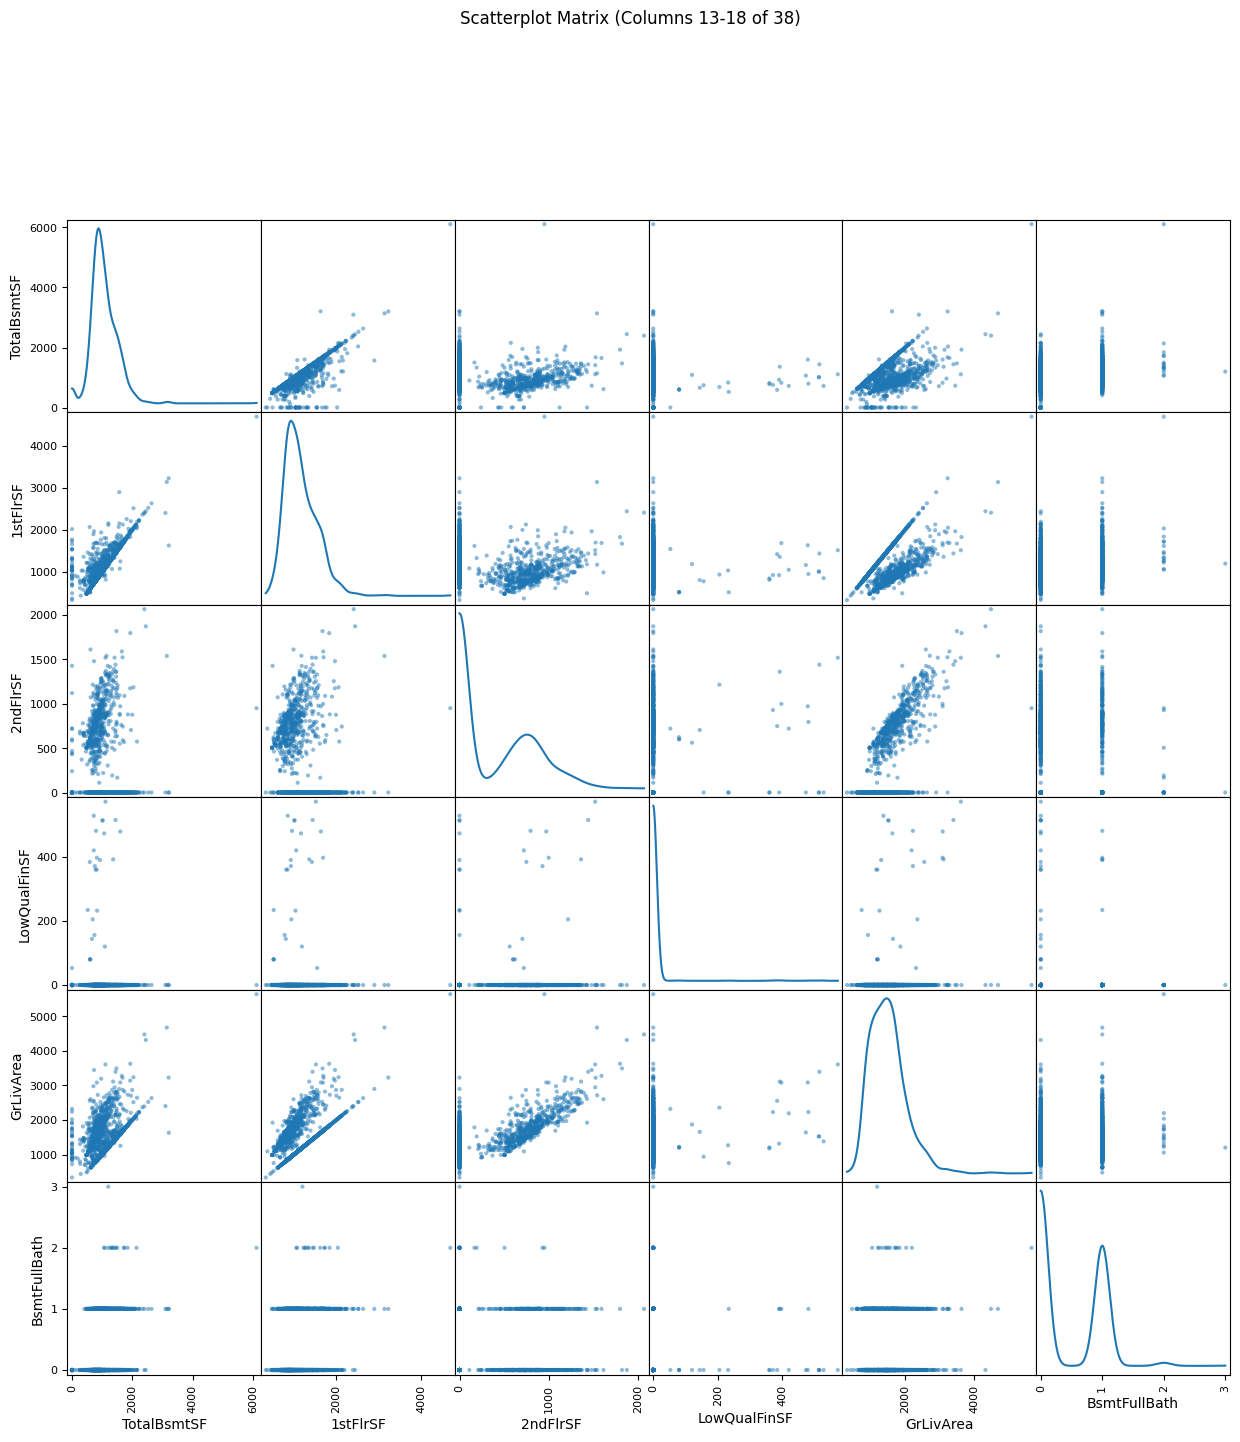


Plotting scatter matrix for columns: ['BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd']


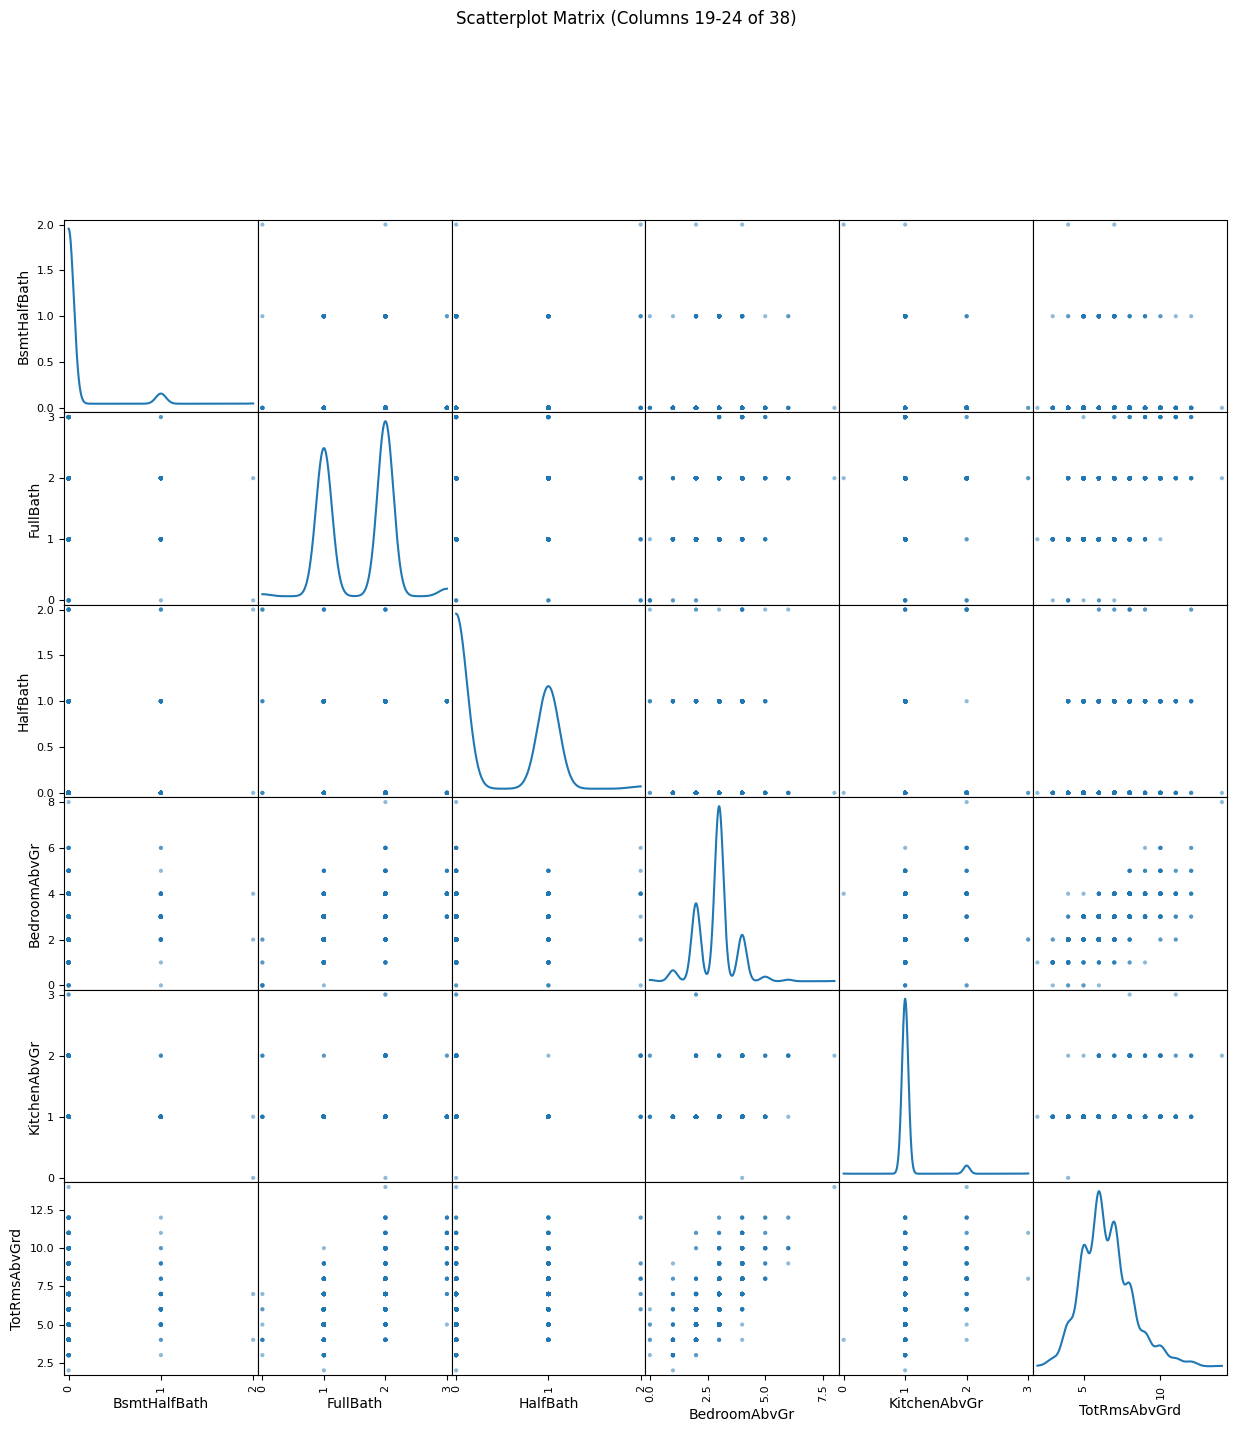


Plotting scatter matrix for columns: ['Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


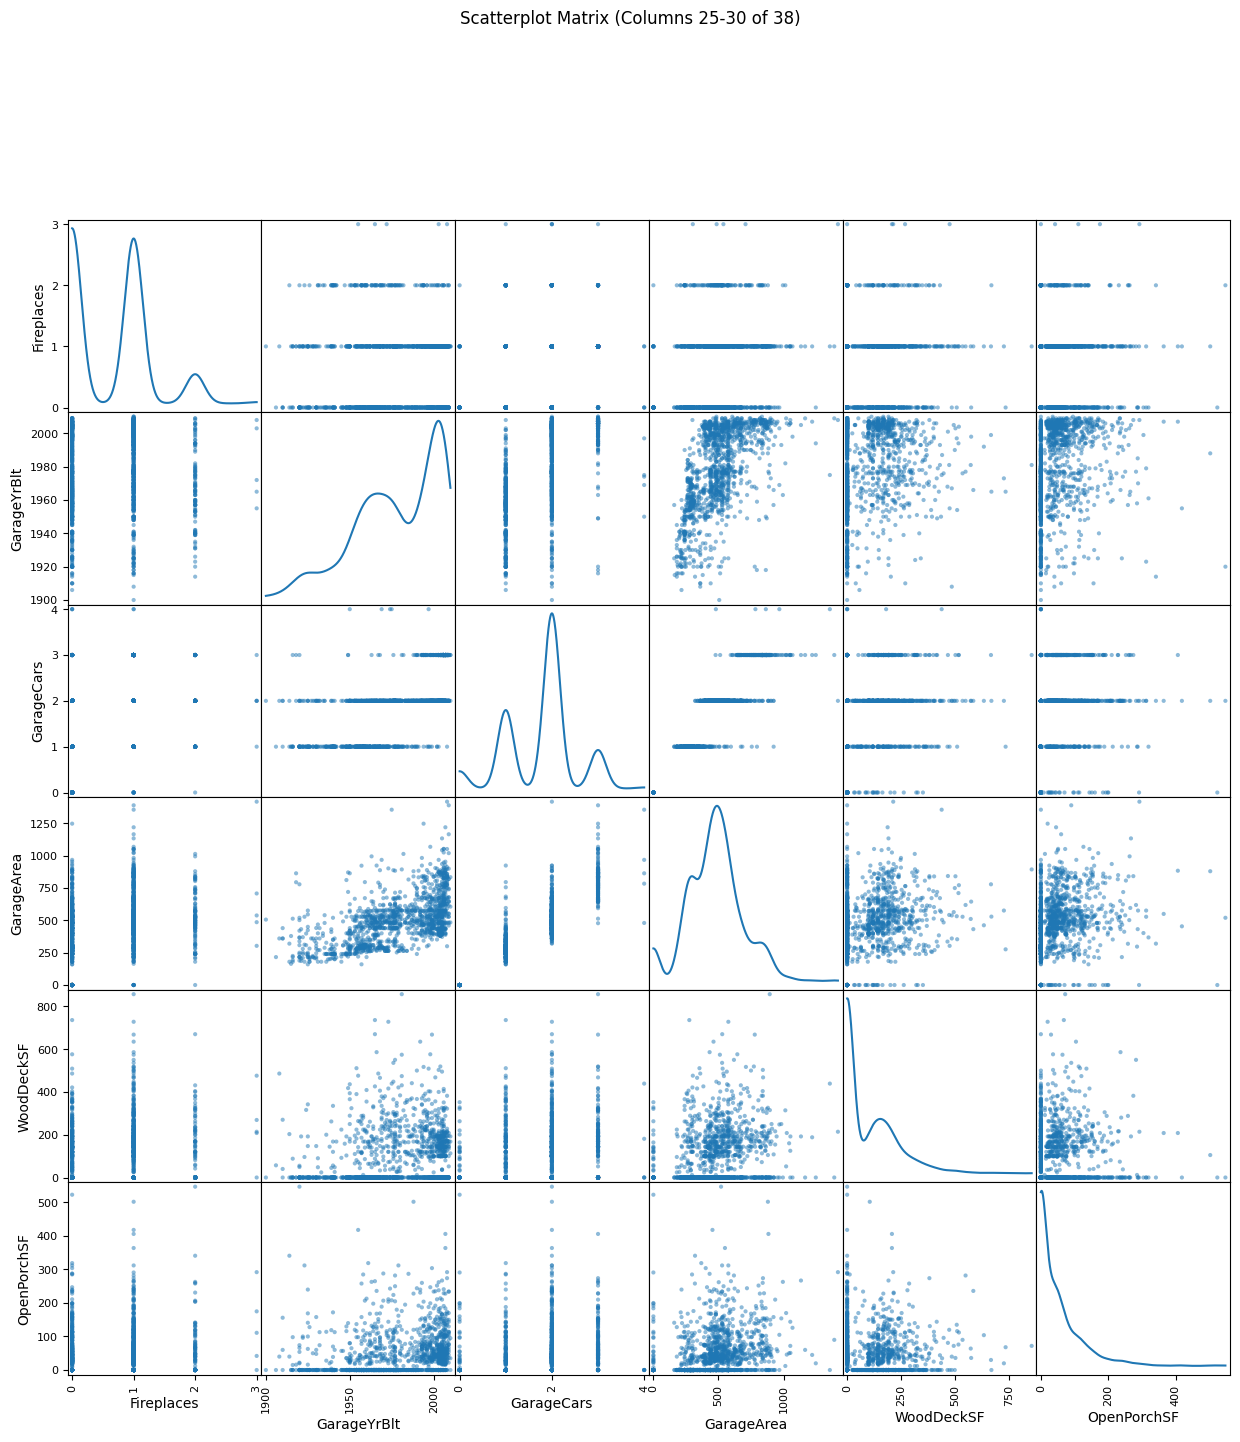


Plotting scatter matrix for columns: ['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']


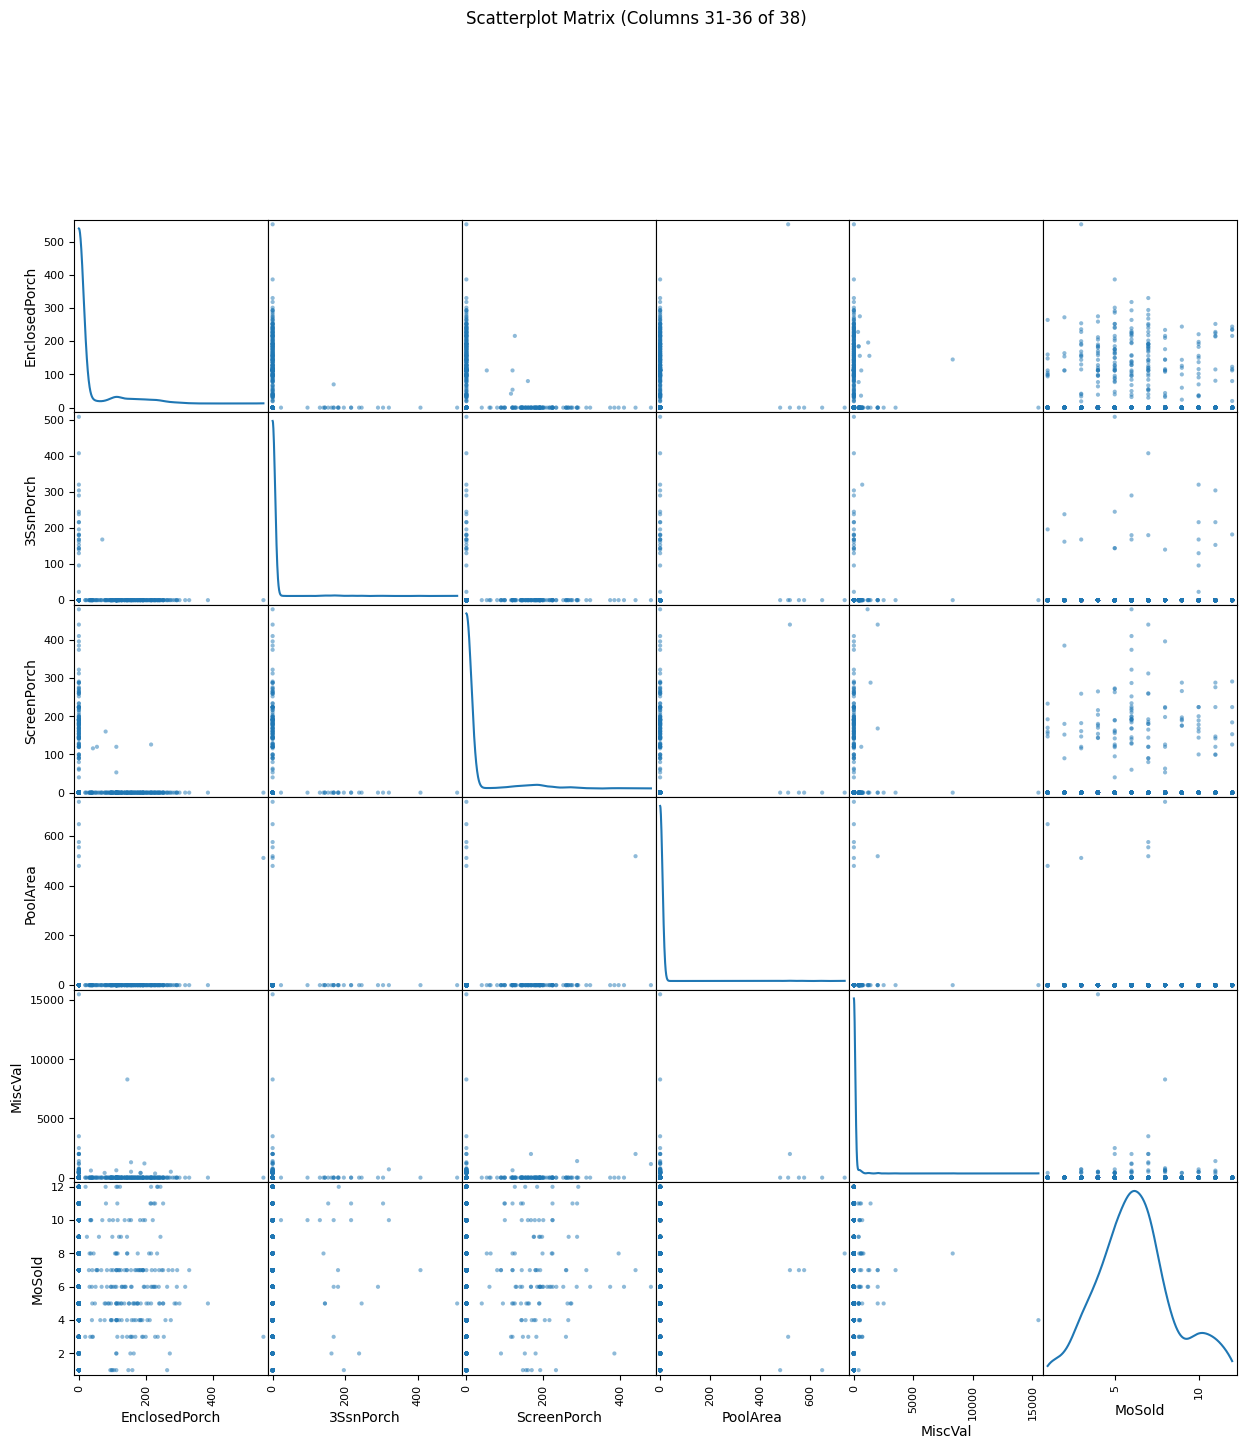


Plotting scatter matrix for columns: ['YrSold', 'SalePrice']


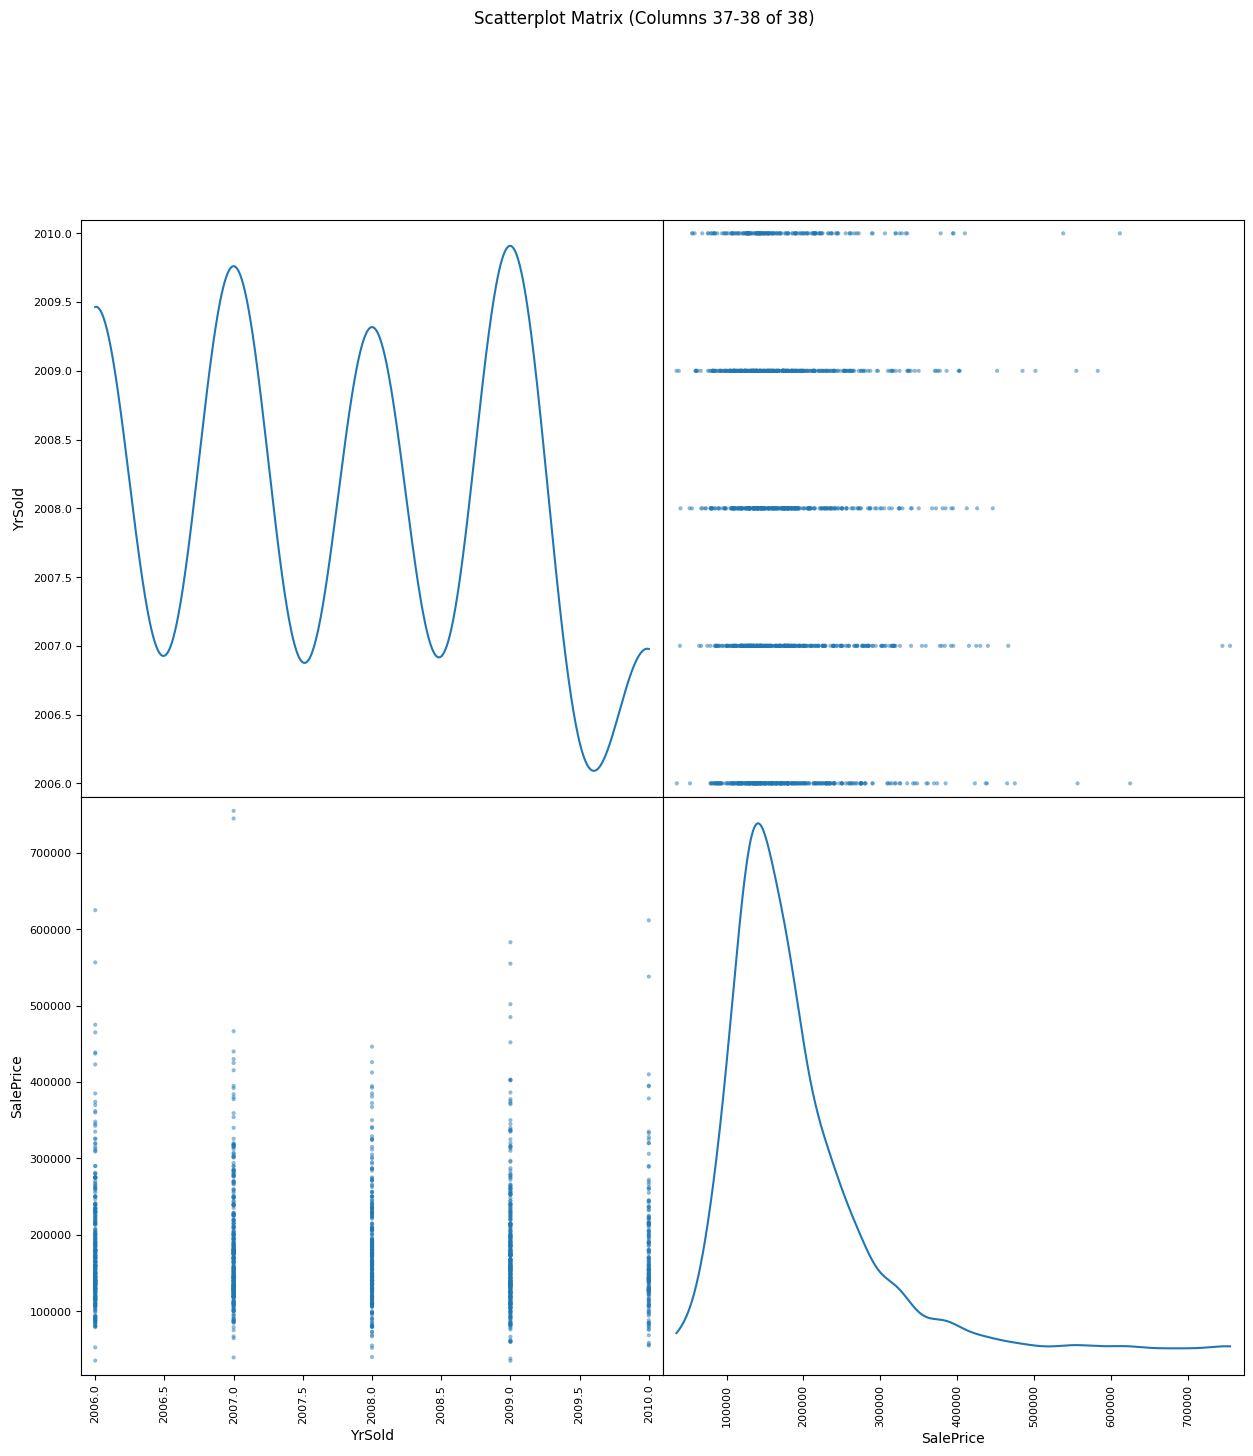


Finished plotting all scatterplot matrix chunks.


In [125]:
# --- Break up the Scatterplot Matrix ---

# Get the list of numeric column names
numeric_cols = numeric_data.columns.tolist()

# Define how many columns you want in each scatterplot matrix chunk
# A 5x5, 6x6, or 7x7 matrix is usually manageable on a screen.
# Let's use 6 columns per chunk as an example.
chunk_size = 6

# Calculate the number of chunks needed
num_chunks = (len(numeric_cols) + chunk_size - 1) // chunk_size

print(f"\nBreaking numeric columns into {num_chunks} chunks of size ~{chunk_size}.")

# Loop through the columns in chunks
for i in range(num_chunks):
    # Get the start and end index for the current chunk
    start_index = i * chunk_size
    end_index = min((i + 1) * chunk_size, len(numeric_cols))

    # Get the list of column names for the current chunk
    current_chunk_cols = numeric_cols[start_index:end_index]

    # Select the subset of the DataFrame for this chunk of columns
    df_chunk = numeric_data[current_chunk_cols]

    print(f"\nPlotting scatter matrix for columns: {current_chunk_cols}")

    # Create the scatterplot matrix for the current chunk
    # Add a suptitle (super title) for the figure
    scatterplot_matrix = pd.plotting.scatter_matrix(df_chunk, figsize=(15, 15), diagonal='kde') # Adjusted figsize
    plt.suptitle(f"Scatterplot Matrix (Columns {start_index+1}-{end_index} of {len(numeric_cols)})", y=1.02) # Add title slightly above plots

    # Display the plot for the current chunk
    plt.show()

print("\nFinished plotting all scatterplot matrix chunks.")

## Comprehensive Data Preprecssing

In [126]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Load dataset
df = df_full.copy()

In [127]:
y = df['SalePrice']
df = df.drop(columns = 'SalePrice')

In [142]:
#Seperate numerical and categorical coumns
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"\nIdentified {len(num_cols)} numeric columns and {len(cat_cols)} categorical columns.")


Identified 37 numeric columns and 43 categorical columns.


In [143]:
# Define Preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # Corrected: ('name', instance) tuple
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [144]:
# --- Combine Processing Steps using ColumnTransformer ---
# This applies the correct transformer pipeline to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols), # Apply numeric_transformer to num_cols
        ('cat', categorical_transformer, cat_cols) # Apply categorical_transformer to cat_cols
    ],
    remainder='passthrough' # Keep columns not specified in num_cols or cat_cols (if any)
)


In [138]:
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Split the data in to training and test
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)


In [145]:
# --- Create preprocessing and training pipeline (Optional - you can fit/transform the preprocessor directly) ---
# If you wanted to add a model *after* preprocessing, you'd add it here.
# pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
# print("\nFull pipeline defined (preprocessor only).")

# --- Split the data into training and test sets ---
# Split the features (df) and the target (y)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

print(f"\nData split into train ({len(X_train)} samples) and test ({len(X_test)} samples).")



Data split into train (1168 samples) and test (292 samples).


In [146]:
# Fit the preprocessor ONLY on the training data
# This learns imputation values, scaling parameters, and one-hot encoding categories from X_train
print("Fitting preprocessor on training data...")
X_train_processed = preprocessor.fit_transform(X_train)
print("Preprocessor fitted.")

Fitting preprocessor on training data...
Preprocessor fitted.


In [147]:
# Transform both training and test data using the fitted preprocessor
# Use the SAME parameters learned from X_train for both sets
print("Transforming training data...")
X_test_processed = preprocessor.transform(X_test)
print("Training and test data transformed.")

Transforming training data...
Training and test data transformed.


In [148]:
print(f"\nShape of processed training data: {X_train_processed.shape}")
print(f"Shape of processed test data: {X_test_processed.shape}")

# Display the first 5 rows of the processed training data (will be a NumPy array)
print("\nFirst 5 rows of processed training data:")
print(X_train_processed[:5])


Shape of processed training data: (1168, 303)
Shape of processed test data: (292, 303)

First 5 rows of processed training data:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 400 stored elements and shape (5, 303)>
  Coords	Values
  (0, 0)	-1.1192840216867437
  (0, 1)	-0.8667643047469886
  (0, 2)	-0.012468363176367587
  (0, 3)	-0.21289571021689285
  (0, 4)	-0.8204445578548297
  (0, 5)	0.37221730085603477
  (0, 6)	-0.4554689634533773
  (0, 7)	-1.3460630279925625
  (0, 8)	-0.59788870008087
  (0, 9)	1.0372686113776926
  (0, 10)	-0.28550406121847727
  (0, 11)	-0.40028164505613256
  (0, 12)	0.5726121928947197
  (0, 13)	0.3742352301895073
  (0, 14)	-0.8019229244046748
  (0, 15)	-0.11899866377895676
  (0, 16)	-0.40709314807972335
  (0, 17)	1.1053195824048596
  (0, 18)	-0.24287002311294137
  (0, 19)	-1.0555657250367967
  (0, 20)	-0.7640975231923183
  (0, 21)	0.13621832007914325
  (0, 22)	-0.2127571124887476
  (0, 23)	-0.9645659090752412
  (0, 24)	-0.9585921495629545
  :	:
  (4

## Feature Importance and Feature Selection

The RandomForestRegressor model is fit for the training data. This means that the model learns the relationship between the features and the target variable based on the training data.
The feature importances are then calculated.

This is done by measuring how much each feature contributes to the model's predictions. The features with the highest importance scores are the most important for predicting the target variable.

In [152]:
# Fit RandomForestRegressor to out dataset
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

In [153]:
# Get feature importances from RandomForestRegressor
importances = rf.feature_importances_

In [155]:
# --- Get the list of features after preprocessing ---
# The ColumnTransformer has a method to get the output feature names
# after all transformations (imputation, scaling, one-hot encoding)
processed_feature_names = preprocessor.get_feature_names_out()
processed_feature_names

array(['num__Id', 'num__MSSubClass', 'num__LotFrontage', 'num__LotArea',
       'num__OverallQual', 'num__OverallCond', 'num__YearBuilt',
       'num__YearRemodAdd', 'num__MasVnrArea', 'num__BsmtFinSF1',
       'num__BsmtFinSF2', 'num__BsmtUnfSF', 'num__TotalBsmtSF',
       'num__1stFlrSF', 'num__2ndFlrSF', 'num__LowQualFinSF',
       'num__GrLivArea', 'num__BsmtFullBath', 'num__BsmtHalfBath',
       'num__FullBath', 'num__HalfBath', 'num__BedroomAbvGr',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageYrBlt', 'num__GarageCars', 'num__GarageArea',
       'num__WoodDeckSF', 'num__OpenPorchSF', 'num__EnclosedPorch',
       'num__3SsnPorch', 'num__ScreenPorch', 'num__PoolArea',
       'num__MiscVal', 'num__MoSold', 'num__YrSold',
       "cat__MSZoning_'C (all)'", 'cat__MSZoning_FV', 'cat__MSZoning_RH',
       'cat__MSZoning_RL', 'cat__MSZoning_RM', 'cat__Street_Grvl',
       'cat__Street_Pave', 'cat__Alley_Grvl', 'cat__Alley_Pave',
       'cat__Alley_

In [158]:
# --- Link importances to feature names and Plot ---

# Get the indices of features sorted by importance (descending)
indices = np.argsort(importances)[::-1]
# Get the feature names in the order of their importance
sorted_feature_names = processed_feature_names[indices]
sorted_feature_names

array(['num__OverallQual', 'num__GrLivArea', 'num__TotalBsmtSF',
       'num__2ndFlrSF', 'num__BsmtFinSF1', 'num__1stFlrSF',
       'num__LotArea', 'num__GarageArea', 'num__YearBuilt',
       'num__GarageCars', 'num__LotFrontage', 'num__TotRmsAbvGrd',
       'num__YearRemodAdd', 'num__OpenPorchSF', 'num__FullBath',
       'num__GarageYrBlt', 'cat__BsmtQual_Ex', 'num__BsmtUnfSF',
       'num__Id', 'num__WoodDeckSF', 'cat__KitchenQual_Gd',
       'num__OverallCond', 'num__MasVnrArea', 'num__ScreenPorch',
       'num__MoSold', 'cat__BsmtQual_Gd', 'cat__CentralAir_Y',
       'num__MSSubClass', 'cat__GarageType_Detchd', 'num__Fireplaces',
       'cat__GarageType_Attchd', 'cat__LotShape_Reg',
       'cat__FireplaceQu_missing', 'cat__KitchenQual_Ex',
       'cat__CentralAir_N', 'num__BedroomAbvGr', 'cat__BsmtExposure_Gd',
       'cat__ExterQual_Gd', 'num__YrSold', 'cat__Fence_MnPrv',
       'cat__KitchenQual_TA', 'cat__BsmtExposure_No', 'cat__MSZoning_RM',
       'cat__ExterQual_TA', 'cat__Sa

Feature ranking:
1. feature num__OverallQual (0.557654)
2. feature num__GrLivArea (0.121215)
3. feature num__TotalBsmtSF (0.034099)
4. feature num__2ndFlrSF (0.033764)
5. feature num__BsmtFinSF1 (0.029558)
6. feature num__1stFlrSF (0.025872)
7. feature num__LotArea (0.016716)
8. feature num__GarageArea (0.015211)
9. feature num__YearBuilt (0.012290)
10. feature num__GarageCars (0.011973)
11. feature num__LotFrontage (0.007969)
12. feature num__TotRmsAbvGrd (0.006741)
13. feature num__YearRemodAdd (0.006298)
14. feature num__OpenPorchSF (0.005954)
15. feature num__FullBath (0.005758)
16. feature num__GarageYrBlt (0.005469)
17. feature cat__BsmtQual_Ex (0.005191)
18. feature num__BsmtUnfSF (0.004984)
19. feature num__Id (0.003978)
20. feature num__WoodDeckSF (0.003958)


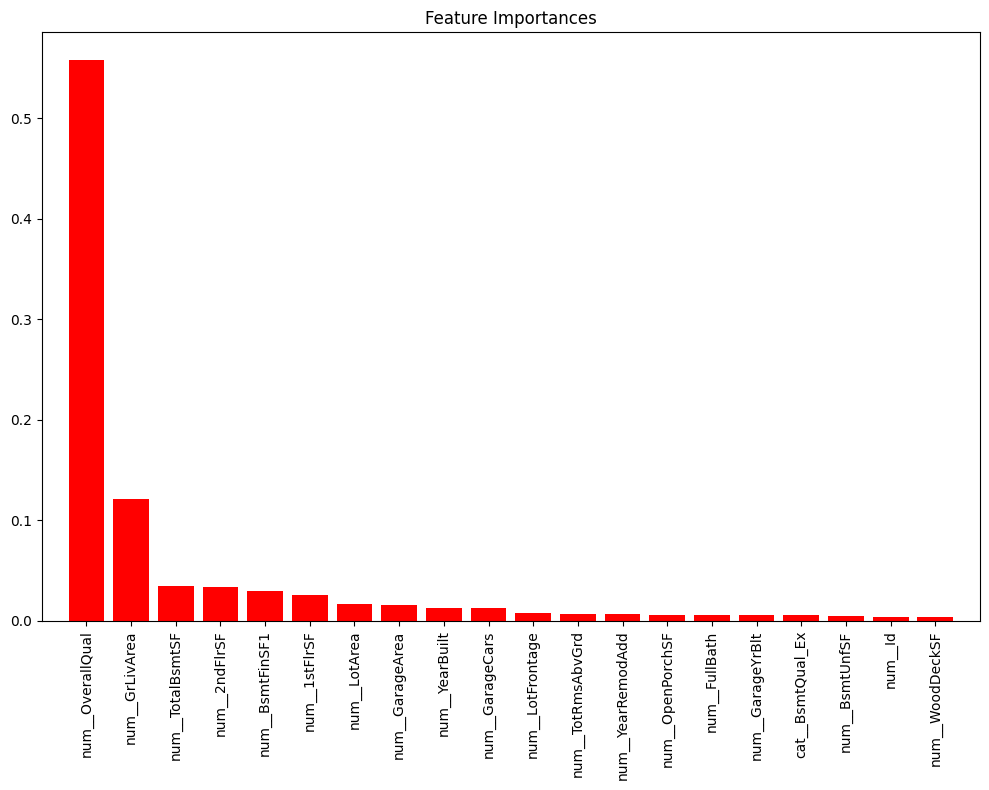

In [160]:
# Select the top N features for a more readable plot (optional)
n_features_to_plot = 20 # You can adjust this number
if len(sorted_feature_names) > n_features_to_plot:
    top_indices = indices[:n_features_to_plot]
    top_importances = importances[top_indices]
    top_feature_names = processed_feature_names[top_indices]
    plot_indices = np.arange(n_features_to_plot)
else:
    top_importances = importances[indices]
    top_feature_names = sorted_feature_names
    plot_indices = np.arange(len(importances))
# Print the feature ranking (using processed feature names)
print("Feature ranking:")
for i, idx in enumerate(indices[:n_features_to_plot]): # Print only top N if subsetting plot
    # Use the processed feature name directly
    print(f"{i + 1}. feature {processed_feature_names[idx]} ({importances[idx]:.6f})")

# Plot the impurity-based feature importances
plt.figure(figsize=(max(10, len(top_feature_names)*0.5), 8)) # Adjust figsize based on number of bars
plt.title("Feature Importances")

# Use the sorted (or top N) feature names on the x-axis
plt.bar(plot_indices, top_importances, color="r", align="center")
plt.xticks(plot_indices, top_feature_names, rotation=90) # Use the names as labels, rotate for readability
plt.xlim([-1, len(top_feature_names)]) # Adjust x-axis limits

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

In [162]:
# --- Feature Selection using SelectFromModel ---
# Define a model to use for feature selection (RandomForestRegressor is used here)
# The threshold for selection is often mean, median, or a specific value
model_for_selection = RandomForestRegressor(n_estimators=100, random_state=42)

In [163]:
# Create the feature selector
# sfm will select features whose importance is greater than the threshold
# Default threshold is 'mean' importance
sfm = SelectFromModel(model_for_selection)


In [164]:
# Fit the selector to the PREPROCESSED training data
# This trains the internal model_for_selection and calculates importances
# Then it determines which features meet the threshold
print("\nFitting SelectFromModel on processed training data...")
sfm.fit(X_train_processed, y_train)
print("SelectFromModel fitted.")


Fitting SelectFromModel on processed training data...
SelectFromModel fitted.


In [165]:
# Transform the PREPROCESSED train and test datasets
# This keeps only the selected features in the processed data
print("Transforming processed train and test data...")
X_train_selected = sfm.transform(X_train_processed)
X_test_selected = sfm.transform(X_test_processed)
print("Data selected.")

Transforming processed train and test data...
Data selected.


In [166]:
# Get the names of the selected features (using the processed feature names)
processed_feature_names = preprocessor.get_feature_names_out() # Get names again if needed
selected_feature_names = processed_feature_names[sfm.get_support()] # Get names where sfm is True

print("\nSelected features:")
for feature_name in selected_feature_names:
    print(feature_name)

print(f"\nShape before selection: {X_train_processed.shape}")
print(f"Shape after selection: {X_train_selected.shape}")



Selected features:
num__Id
num__LotFrontage
num__LotArea
num__OverallQual
num__OverallCond
num__YearBuilt
num__YearRemodAdd
num__BsmtFinSF1
num__BsmtUnfSF
num__TotalBsmtSF
num__1stFlrSF
num__2ndFlrSF
num__GrLivArea
num__FullBath
num__TotRmsAbvGrd
num__GarageYrBlt
num__GarageCars
num__GarageArea
num__WoodDeckSF
num__OpenPorchSF
cat__BsmtQual_Ex
cat__KitchenQual_Gd

Shape before selection: (1168, 303)
Shape after selection: (1168, 22)


In [167]:
# --- Fit a NEW RandomForestRegressor to the selected dataset ---
# This is your final model trained only on the features deemed important by sfm
final_model = RandomForestRegressor(n_estimators=100, random_state=42)

print("\nFitting final RandomForestRegressor on selected data...")
final_model.fit(X_train_selected, y_train)
print("Final model fitted.")


Fitting final RandomForestRegressor on selected data...
Final model fitted.


In [168]:
# --- Make predictions ---
y_pred_train = final_model.predict(X_train_selected)
y_pred_test = final_model.predict(X_test_selected)

In [170]:
# --- Calculate and Print Metrics ---
print("\n--- Model Evaluation Metrics ---")
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_test) # Changed y_pred_test to y_test to avoid error
print(f'Training Mean Squared Error: {mse_train:.4f}')
print(f'Test Mean Squared Error: {mse_test:.4f}')
print(f'Training Mean Absolute Error: {mae_train:.4f}')
print(f'Test Mean Absolute Error: {mae_test:.4f}')
print(f'Training R^2 Score: {r2_train:.4f}')
# Corrected the r2_test calculation, should be y_test vs y_pred_test
r2_test = r2_score(y_test, y_pred_test)
print(f'Test R^2 Score: {r2_test:.4f}')


--- Model Evaluation Metrics ---
Training Mean Squared Error: 124277535.3155
Test Mean Squared Error: 829828441.8541
Training Mean Absolute Error: 6664.7702
Test Mean Absolute Error: 17877.0470
Training R^2 Score: 0.9792
Test R^2 Score: 0.8918


In [171]:
# --- Save and Load the Trained Model ---
# Make sure the 'trained_model.pkl' file name is appropriate
model_filename = 'final_trained_model.pkl'
print(f"\nSaving model to {model_filename}...")
joblib.dump(final_model, model_filename)
print("Model saved.")


Saving model to final_trained_model.pkl...
Model saved.


In [ ]:
# Load the saved model
#print(f"Loading model from {model_filename}...")
#loaded_model = joblib.load(model_filename)
#print("Model loaded.")

In [ ]:
# Make predictions using the loaded model (should match y_pred_test)
#y_pred_loaded = loaded_model.predict(X_test_selected)
#print("\nPredictions made using loaded model.")
# Optional: Check if predictions match
# print("Do loaded model predictions match:", np.array_equal(y_pred_test, y_pred_loaded))